# Mask Convolutional Neural Network for Multi-level Hierarchical Classification

In [ ]:
# To be run on Google Colab!
# !mkdir -p deakin/edu/au/
# !wget --directory-prefix=deakin/edu/au/  https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/data.py   > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/metrics.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/models.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/utils.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/au/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/__init__.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/edu/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/__init__.py  > /dev/null 2> /dev/null 
# !wget --directory-prefix=deakin/ https://raw.githubusercontent.com/rbouadjenek/Masked-CNN/main/deakin/edu/au/__init__.py  > /dev/null 2> /dev/null 
# !pip install treelib > /dev/null 2> /dev/null 
# !pip install --upgrade scikit-learn > /dev/null 2> /dev/null 
# !mkdir models
# from google.colab import drive
# drive.mount('/content/drive')


In [1]:
from deakin.edu.au import data
from deakin.edu.au import models
from deakin.edu.au import utils
import deakin.edu.au.metrics as metrics
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext tensorboard



# Loading data

## CIFAR100

In [ ]:
#Load dataset
dataset = data.Cifar100()


## Stanford Cars

In [2]:
#Load dataset
# dataset = Stanford_Cars(image_size=(64,64))
dataset = data.get_Stanford_Cars(image_size=(64, 64), batch_size=128)


2021-10-10 19:45:25.084880: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-10 19:45:25.621322: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-10-10 19:45:25.621364: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6582 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


## CU_Birds_200_2011

In [12]:
#Load dataset
dataset = data.get_CU_Birds_200_2011(image_size=(64, 64), batch_size=128)


In [7]:
# plot the tree
tree = dataset.get_tree()
tree.show()
# Set variables
epochs = 150
# VGG-19
conv_base = 'vgg19'
learning_rate = 1e-5
# NIN
# conv_base = 'nin'
# learning_rate=1e-3

# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
performance_callback_val = models.performance_callback(dataset.val_dataset,
                                                       dataset.get_tree(),
                                                       conv_base,
                                                       name=dataset.name,
                                                       save_model=True,
                                                       title='Validation set')

performance_callback_train = models.performance_callback(dataset.train_dataset,
                                                         dataset.get_tree(),
                                                         conv_base,
                                                         name=dataset.name,
                                                         title='Training set')


Root
├── Convertible -> (L0_0)
│   ├── Aston Convertible -> (L1_4)
│   │   ├── Aston Martin V8 Vantage Convertible 2012 -> (L2_7)
│   │   └── Aston Martin Virage Convertible 2012 -> (L2_9)
│   ├── Audi Convertible -> (L1_6)
│   │   ├── Audi RS 4 Convertible 2008 -> (L2_11)
│   │   └── Audi S5 Convertible 2012 -> (L2_20)
│   ├── BMW Convertible -> (L1_14)
│   │   ├── BMW 1 Series Convertible 2012 -> (L2_26)
│   │   ├── BMW 6 Series Convertible 2007 -> (L2_30)
│   │   ├── BMW M6 Convertible 2010 -> (L2_35)
│   │   └── BMW Z4 Convertible 2012 -> (L2_37)
│   ├── Bentley Convertible -> (L1_11)
│   │   └── Bentley Continental Supersports Conv. Convertible 2012 -> (L2_38)
│   ├── Bugatti Convertible -> (L1_19)
│   │   └── Bugatti Veyron 16.4 Convertible 2009 -> (L2_44)
│   ├── Chevrolet Convertible -> (L1_26)
│   │   ├── Chevrolet Camaro Convertible 2012 -> (L2_58)
│   │   └── Chevrolet Corvette Convertible 2012 -> (L2_54)
│   ├── Chrysler Convertible -> (L1_37)
│   │   ├── Chrysler Crossfire

# Visualization

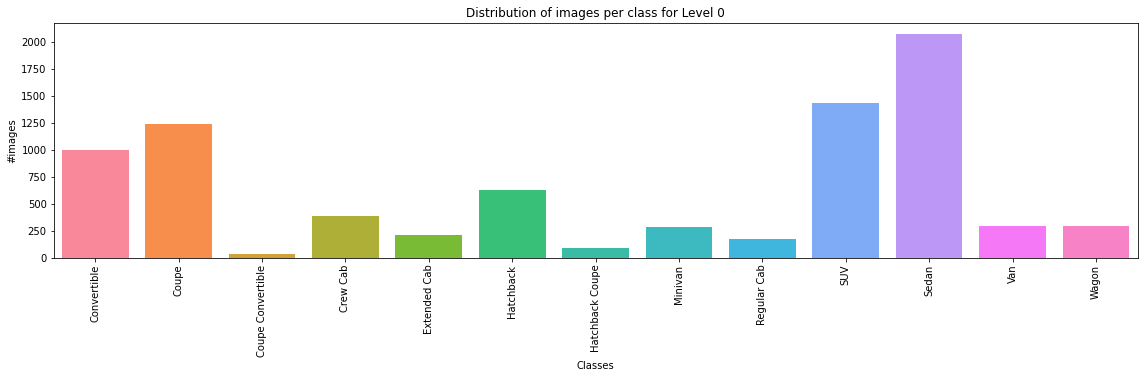

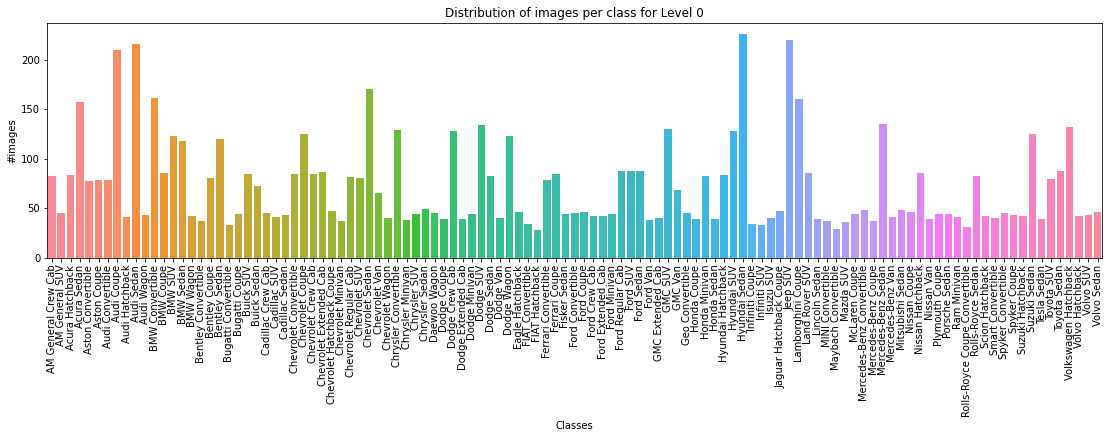

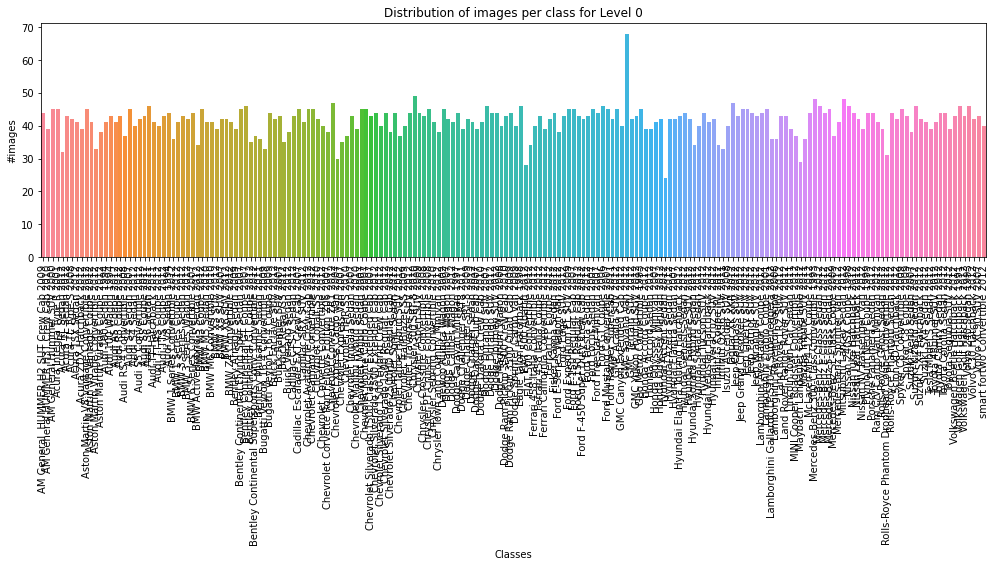

2021-10-09 18:49:50.782948: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


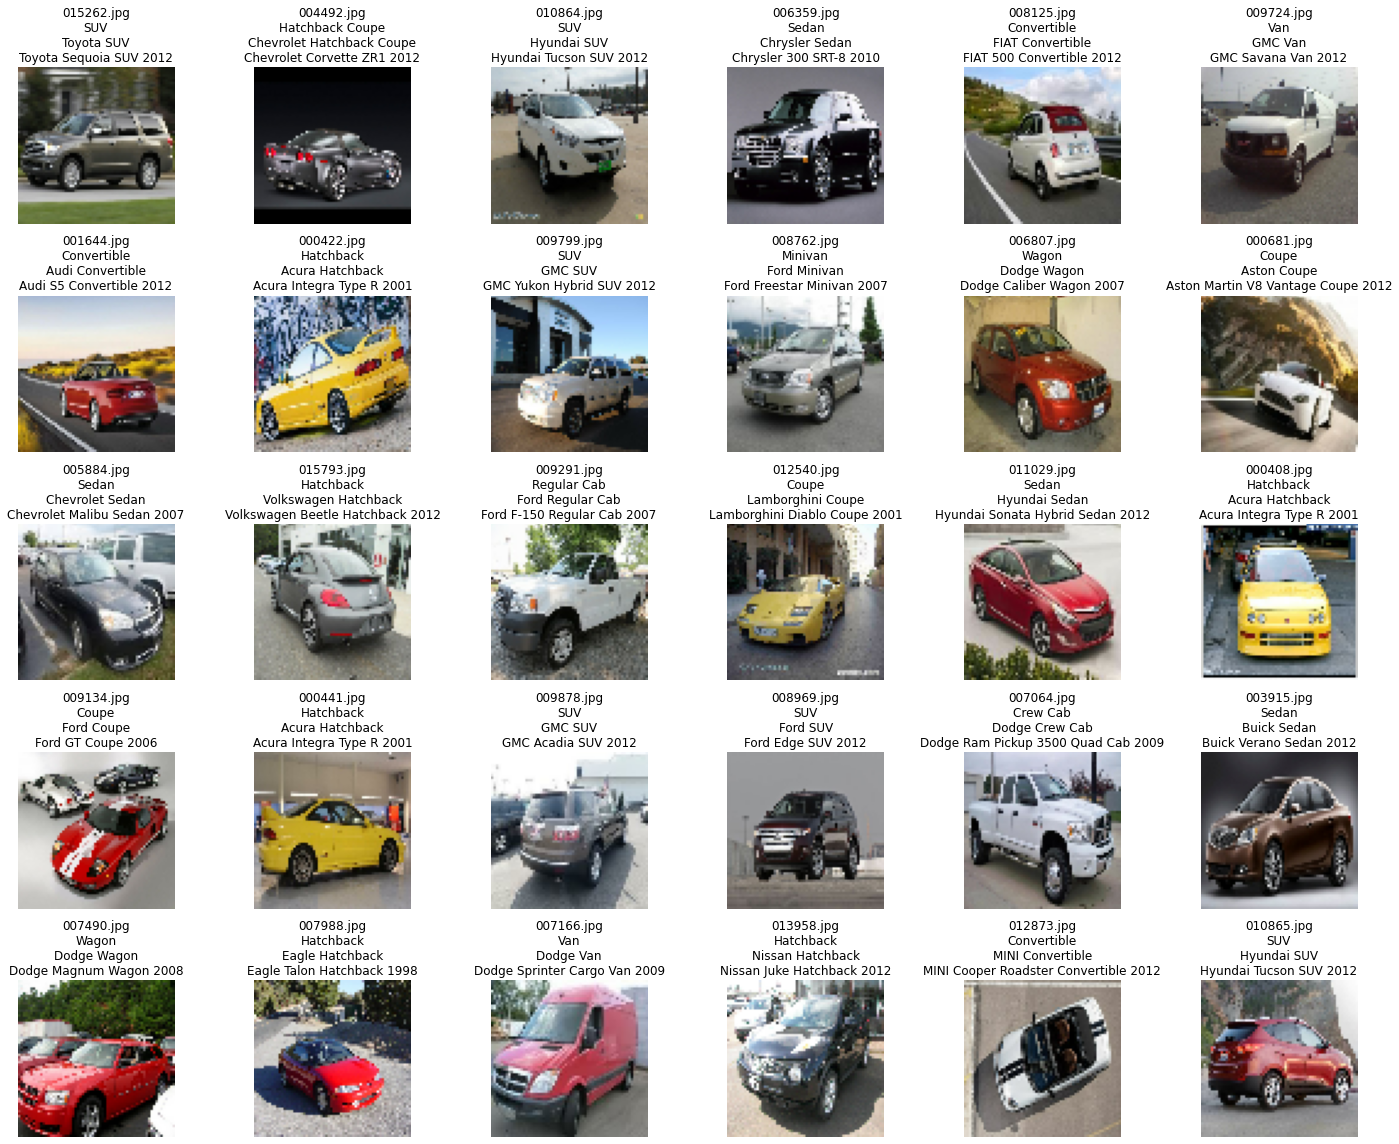

In [4]:
###############################################
#### Show distribution of images per class.
###############################################
df = dataset.train_labels_df
df = df[['label_level_0']].groupby(['label_level_0']).size().reset_index()
df = df.rename(columns={0: 'count'})
g = sns.catplot(x='label_level_0', y='count', data=df, kind='bar',
                legend=False, height=4, aspect=4, saturation=1)
(g.despine(top=False, right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class for Level 0")
plt.xticks(rotation='vertical')
plt.show()
###############################################
#### Show distribution of images per class.
###############################################
df = dataset.train_labels_df
df = df[['label_level_1']].groupby(['label_level_1']).size().reset_index()
df = df.rename(columns={0: 'count'})
g = sns.catplot(x='label_level_1', y='count', data=df, kind='bar',
                legend=False, height=4, aspect=4, saturation=1)
(g.despine(top=False, right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class for Level 0")
plt.xticks(rotation='vertical')
plt.show()
###############################################
#### Show distribution of images per class.
###############################################
df = dataset.train_labels_df
df = df[['label_level_2']].groupby(['label_level_2']).size().reset_index()
df = df.rename(columns={0: 'count'})
g = sns.catplot(x='label_level_2', y='count', data=df, kind='bar',
                legend=False, height=4, aspect=4, saturation=1)
(g.despine(top=False, right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class for Level 0")
plt.xticks(rotation='vertical')
plt.show()
###############################################
#### Examples of images.
###############################################
plt.figure(figsize=(20, 16))
for x, y in dataset.get_pipeline(dataset.train_labels_df, 'all'):
    for i in range(30):
        file_name = y[3].numpy()[i].decode("utf-8")
        y_l0 = dataset.labels[0][y[0].numpy()[i]]
        y_l1 = dataset.labels[1][y[1].numpy()[i]]
        y_l2 = dataset.labels[2][y[2].numpy()[i]]
        ax = plt.subplot(5, 6, i + 1)
        plt.imshow(x.numpy()[i])
        plt.title(file_name + "\n" + y_l0 + "\n" + y_l1 + "\n" + y_l2)
        plt.axis("off")
    break
plt.tight_layout()
plt.show()


# Training all models

Model: "mnets_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_base0 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
conv_base1 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
conv_base2 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
________________________________________________________________________________________

2021-10-04 06:49:06.919179: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2021-10-04 06:49:11.247200: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-04 06:49:11.248076: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


64/64 [==============================] - 37s 473ms/step - loss: 4.1306 - out_level_0_loss: 2.1823 - out_level_1_loss: 4.7630 - out_level_2_loss: 5.4465 - out_level_0_accuracy: 0.2559 - out_level_1_accuracy: 0.0239 - out_level_2_accuracy: 0.0038 - val_loss: 4.0057 - val_out_level_0_loss: 2.0555 - val_out_level_1_loss: 4.5885 - val_out_level_2_loss: 5.3732 - val_out_level_0_accuracy: 0.3097 - val_out_level_1_accuracy: 0.0366 - val_out_level_2_accuracy: 0.0060
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

2021-10-04 06:50:31.140232: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/mnets_model_stanford_cars_vgg19/assets
Epoch 3/150
64/64 [==============================] - 27s 420ms/step - loss: 3.7552 - out_level_0_loss: 1.7873 - out_level_1_loss: 4.3080 - out_level_2_loss: 5.1702 - out_level_0_accuracy: 0.3897 - out_level_1_accuracy: 0.0728 - out_level_2_accuracy: 0.0188 - val_loss: 3.7599 - val_out_level_0_loss: 1.7691 - val_out_level_1_loss: 4.3441 - val_out_level_2_loss: 5.1664 - val_out_level_0_accuracy: 0.3784 - val_out_level_1_accuracy: 0.0637 - val_out_level_2_accuracy: 0.0172
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+----

64/64 [==============================] - 27s 415ms/step - loss: 2.4837 - out_level_0_loss: 1.0202 - out_level_1_loss: 2.6734 - out_level_2_loss: 3.7574 - out_level_0_accuracy: 0.6562 - out_level_1_accuracy: 0.3415 - out_level_2_accuracy: 0.1892 - val_loss: 3.6449 - val_out_level_0_loss: 1.7063 - val_out_level_1_loss: 4.2315 - val_out_level_2_loss: 4.9971 - val_out_level_0_accuracy: 0.4010 - val_out_level_1_accuracy: 0.1157 - val_out_level_2_accuracy: 0.0473
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 418ms/step - loss: 1.6351 - out_level_0_loss: 0.6249 - out_level_1_loss: 1.7023 - out_level_2_loss: 2.5781 - out_level_0_accuracy: 0.7926 - out_level_1_accuracy: 0.5621 - out_level_2_accuracy: 0.4034 - val_loss: 3.8148 - val_out_level_0_loss: 1.8234 - val_out_level_1_loss: 4.5602 - val_out_level_2_loss: 5.0608 - val_out_level_0_accuracy: 0.4254 - val_out_level_1_accuracy: 0.1249 - val_out_level_2_accuracy: 0.0687
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 416ms/step - loss: 1.0627 - out_level_0_loss: 0.4259 - out_level_1_loss: 1.1078 - out_level_2_loss: 1.6544 - out_level_0_accuracy: 0.8617 - out_level_1_accuracy: 0.7094 - out_level_2_accuracy: 0.5942 - val_loss: 4.3480 - val_out_level_0_loss: 2.2411 - val_out_level_1_loss: 5.0797 - val_out_level_2_loss: 5.7232 - val_out_level_0_accuracy: 0.3754 - val_out_level_1_accuracy: 0.1470 - val_out_level_2_accuracy: 0.0672
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.6019 - out_level_0_loss: 0.2802 - out_level_1_loss: 0.4000 - out_level_2_loss: 1.1254 - out_level_0_accuracy: 0.9086 - out_level_1_accuracy: 0.9008 - out_level_2_accuracy: 0.7124 - val_loss: 5.1701 - val_out_level_0_loss: 2.5578 - val_out_level_1_loss: 6.2054 - val_out_level_2_loss: 6.7471 - val_out_level_0_accuracy: 0.4400 - val_out_level_1_accuracy: 0.1445 - val_out_level_2_accuracy: 0.0682
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.2311 - out_level_0_loss: 0.1082 - out_level_1_loss: 0.1794 - out_level_2_loss: 0.4058 - out_level_0_accuracy: 0.9724 - out_level_1_accuracy: 0.9570 - out_level_2_accuracy: 0.9030 - val_loss: 6.0931 - val_out_level_0_loss: 3.0351 - val_out_level_1_loss: 6.8981 - val_out_level_2_loss: 8.3460 - val_out_level_0_accuracy: 0.4565 - val_out_level_1_accuracy: 0.1510 - val_out_level_2_accuracy: 0.0697
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0910 - out_level_0_loss: 0.0282 - out_level_1_loss: 0.0562 - out_level_2_loss: 0.1886 - out_level_0_accuracy: 0.9967 - out_level_1_accuracy: 0.9917 - out_level_2_accuracy: 0.9571 - val_loss: 6.5163 - val_out_level_0_loss: 3.1343 - val_out_level_1_loss: 7.9197 - val_out_level_2_loss: 8.4948 - val_out_level_0_accuracy: 0.4764 - val_out_level_1_accuracy: 0.1602 - val_out_level_2_accuracy: 0.0816
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0335 - out_level_0_loss: 0.0071 - out_level_1_loss: 0.0220 - out_level_2_loss: 0.0714 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9969 - out_level_2_accuracy: 0.9877 - val_loss: 7.1961 - val_out_level_0_loss: 3.4211 - val_out_level_1_loss: 8.1856 - val_out_level_2_loss: 9.9815 - val_out_level_0_accuracy: 0.4883 - val_out_level_1_accuracy: 0.1716 - val_out_level_2_accuracy: 0.0846
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 418ms/step - loss: 0.0121 - out_level_0_loss: 0.0020 - out_level_1_loss: 0.0030 - out_level_2_loss: 0.0314 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9962 - val_loss: 7.5630 - val_out_level_0_loss: 3.5826 - val_out_level_1_loss: 8.5055 - val_out_level_2_loss: 10.6009 - val_out_level_0_accuracy: 0.4856 - val_out_level_1_accuracy: 0.1816 - val_out_level_2_accuracy: 0.0930
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0120 - out_level_0_loss: 0.0017 - out_level_1_loss: 0.0032 - out_level_2_loss: 0.0313 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9969 - val_loss: 7.8409 - val_out_level_0_loss: 3.7384 - val_out_level_1_loss: 8.6531 - val_out_level_2_loss: 11.1313 - val_out_level_0_accuracy: 0.4861 - val_out_level_1_accuracy: 0.1813 - val_out_level_2_accuracy: 0.0784
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

INFO:tensorflow:Assets written to: models/mnets_model_stanford_cars_vgg19/assets
Epoch 53/150
64/64 [==============================] - 27s 413ms/step - loss: 0.0107 - out_level_0_loss: 0.0016 - out_level_1_loss: 0.0020 - out_level_2_loss: 0.0285 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 7.6969 - val_out_level_0_loss: 3.8219 - val_out_level_1_loss: 8.8439 - val_out_level_2_loss: 10.4247 - val_out_level_0_accuracy: 0.4856 - val_out_level_1_accuracy: 0.1808 - val_out_level_2_accuracy: 0.0988
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--

64/64 [==============================] - 26s 411ms/step - loss: 0.0089 - out_level_0_loss: 0.0016 - out_level_1_loss: 0.0030 - out_level_2_loss: 0.0220 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9977 - val_loss: 7.8685 - val_out_level_0_loss: 3.8672 - val_out_level_1_loss: 8.8213 - val_out_level_2_loss: 10.9170 - val_out_level_0_accuracy: 0.4856 - val_out_level_1_accuracy: 0.1828 - val_out_level_2_accuracy: 0.0958
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

INFO:tensorflow:Assets written to: models/mnets_model_stanford_cars_vgg19/assets
Epoch 63/150
64/64 [==============================] - 27s 412ms/step - loss: 0.0090 - out_level_0_loss: 0.0015 - out_level_1_loss: 0.0020 - out_level_2_loss: 0.0234 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9972 - val_loss: 7.7285 - val_out_level_0_loss: 3.9170 - val_out_level_1_loss: 8.9695 - val_out_level_2_loss: 10.2989 - val_out_level_0_accuracy: 0.4853 - val_out_level_1_accuracy: 0.1806 - val_out_level_2_accuracy: 0.1037
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--

64/64 [==============================] - 26s 411ms/step - loss: 0.0073 - out_level_0_loss: 0.0015 - out_level_1_loss: 0.0028 - out_level_2_loss: 0.0174 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9974 - val_loss: 7.6955 - val_out_level_0_loss: 3.9301 - val_out_level_1_loss: 8.8807 - val_out_level_2_loss: 10.2759 - val_out_level_0_accuracy: 0.4846 - val_out_level_1_accuracy: 0.1811 - val_out_level_2_accuracy: 0.1067
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0082 - out_level_0_loss: 0.0015 - out_level_1_loss: 0.0018 - out_level_2_loss: 0.0212 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9971 - val_loss: 7.7422 - val_out_level_0_loss: 3.9285 - val_out_level_1_loss: 9.0378 - val_out_level_2_loss: 10.2602 - val_out_level_0_accuracy: 0.4873 - val_out_level_1_accuracy: 0.1801 - val_out_level_2_accuracy: 0.1012
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 408ms/step - loss: 0.0078 - out_level_0_loss: 0.0014 - out_level_1_loss: 0.0025 - out_level_2_loss: 0.0195 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 7.8845 - val_out_level_0_loss: 3.9247 - val_out_level_1_loss: 8.9110 - val_out_level_2_loss: 10.8180 - val_out_level_0_accuracy: 0.4863 - val_out_level_1_accuracy: 0.1806 - val_out_level_2_accuracy: 0.0886
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0087 - out_level_0_loss: 0.0014 - out_level_1_loss: 0.0017 - out_level_2_loss: 0.0230 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9961 - val_loss: 7.9730 - val_out_level_0_loss: 3.9548 - val_out_level_1_loss: 9.1296 - val_out_level_2_loss: 10.8345 - val_out_level_0_accuracy: 0.4858 - val_out_level_1_accuracy: 0.1816 - val_out_level_2_accuracy: 0.0900
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0105 - out_level_0_loss: 0.0012 - out_level_1_loss: 0.0025 - out_level_2_loss: 0.0276 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9946 - val_loss: 7.8262 - val_out_level_0_loss: 3.9831 - val_out_level_1_loss: 9.1710 - val_out_level_2_loss: 10.3246 - val_out_level_0_accuracy: 0.4853 - val_out_level_1_accuracy: 0.1821 - val_out_level_2_accuracy: 0.0928
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 412ms/step - loss: 0.0064 - out_level_0_loss: 0.0012 - out_level_1_loss: 0.0010 - out_level_2_loss: 0.0169 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 7.9763 - val_out_level_0_loss: 3.9609 - val_out_level_1_loss: 9.3505 - val_out_level_2_loss: 10.6176 - val_out_level_0_accuracy: 0.4863 - val_out_level_1_accuracy: 0.1833 - val_out_level_2_accuracy: 0.0933
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0057 - out_level_0_loss: 0.0013 - out_level_1_loss: 0.0015 - out_level_2_loss: 0.0143 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9978 - val_loss: 8.0677 - val_out_level_0_loss: 3.9941 - val_out_level_1_loss: 9.2362 - val_out_level_2_loss: 10.9728 - val_out_level_0_accuracy: 0.4896 - val_out_level_1_accuracy: 0.1818 - val_out_level_2_accuracy: 0.0950
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 403ms/step - loss: 0.0066 - out_level_0_loss: 0.0012 - out_level_1_loss: 9.9257e-04 - out_level_2_loss: 0.0177 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9964 - val_loss: 8.0396 - val_out_level_0_loss: 4.0703 - val_out_level_1_loss: 9.4924 - val_out_level_2_loss: 10.5562 - val_out_level_0_accuracy: 0.4896 - val_out_level_1_accuracy: 0.1821 - val_out_level_2_accuracy: 0.0990
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0089 - out_level_0_loss: 9.0713e-04 - out_level_1_loss: 0.0012 - out_level_2_loss: 0.0246 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9936 - val_loss: 8.0835 - val_out_level_0_loss: 4.1734 - val_out_level_1_loss: 9.4249 - val_out_level_2_loss: 10.6522 - val_out_level_0_accuracy: 0.4891 - val_out_level_1_accuracy: 0.1841 - val_out_level_2_accuracy: 0.0978
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------

64/64 [==============================] - 27s 416ms/step - loss: 0.0076 - out_level_0_loss: 7.4786e-04 - out_level_1_loss: 6.8088e-04 - out_level_2_loss: 0.0213 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9956 - val_loss: 8.1891 - val_out_level_0_loss: 4.2285 - val_out_level_1_loss: 9.8490 - val_out_level_2_loss: 10.4898 - val_out_level_0_accuracy: 0.4828 - val_out_level_1_accuracy: 0.1801 - val_out_level_2_accuracy: 0.1002
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------

64/64 [==============================] - 26s 411ms/step - loss: 0.0065 - out_level_0_loss: 7.5815e-04 - out_level_1_loss: 0.0010 - out_level_2_loss: 0.0177 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9959 - val_loss: 8.2028 - val_out_level_0_loss: 4.2484 - val_out_level_1_loss: 9.7931 - val_out_level_2_loss: 10.5668 - val_out_level_0_accuracy: 0.4818 - val_out_level_1_accuracy: 0.1751 - val_out_level_2_accuracy: 0.0985
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------

64/64 [==============================] - 27s 419ms/step - loss: 0.0069 - out_level_0_loss: 5.7991e-04 - out_level_1_loss: 4.9201e-04 - out_level_2_loss: 0.0196 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9950 - val_loss: 8.2874 - val_out_level_0_loss: 4.2642 - val_out_level_1_loss: 10.2022 - val_out_level_2_loss: 10.3960 - val_out_level_0_accuracy: 0.4891 - val_out_level_1_accuracy: 0.1831 - val_out_level_2_accuracy: 0.0973
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------

64/64 [==============================] - 27s 417ms/step - loss: 0.0061 - out_level_0_loss: 6.7580e-04 - out_level_1_loss: 7.0481e-04 - out_level_2_loss: 0.0169 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9968 - val_loss: 8.4437 - val_out_level_0_loss: 4.3665 - val_out_level_1_loss: 10.2930 - val_out_level_2_loss: 10.6717 - val_out_level_0_accuracy: 0.4789 - val_out_level_1_accuracy: 0.1833 - val_out_level_2_accuracy: 0.1070
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0410 - out_level_0_loss: 0.1087 - out_level_1_loss: 3.5359e-04 - out_level_2_loss: 0.0139 - out_level_0_accuracy: 0.9686 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9966 - val_loss: 7.9182 - val_out_level_0_loss: 2.7642 - val_out_level_1_loss: 10.6155 - val_out_level_2_loss: 10.3750 - val_out_level_0_accuracy: 0.4672 - val_out_level_1_accuracy: 0.1818 - val_out_level_2_accuracy: 0.0970
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

64/64 [==============================] - 27s 414ms/step - loss: 0.0060 - out_level_0_loss: 9.6178e-04 - out_level_1_loss: 4.8583e-04 - out_level_2_loss: 0.0166 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9959 - val_loss: 8.2764 - val_out_level_0_loss: 3.5537 - val_out_level_1_loss: 10.7967 - val_out_level_2_loss: 10.4787 - val_out_level_0_accuracy: 0.4918 - val_out_level_1_accuracy: 0.1746 - val_out_level_2_accuracy: 0.0953
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------

64/64 [==============================] - 27s 418ms/step - loss: 0.0066 - out_level_0_loss: 4.5923e-04 - out_level_1_loss: 3.0050e-04 - out_level_2_loss: 0.0191 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9959 - val_loss: 8.4152 - val_out_level_0_loss: 3.8174 - val_out_level_1_loss: 10.8810 - val_out_level_2_loss: 10.5473 - val_out_level_0_accuracy: 0.4945 - val_out_level_1_accuracy: 0.1786 - val_out_level_2_accuracy: 0.0928
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------

64/64 [==============================] - 26s 411ms/step - loss: 0.0039 - out_level_0_loss: 4.3366e-04 - out_level_1_loss: 3.7653e-04 - out_level_2_loss: 0.0109 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9974 - val_loss: 8.3361 - val_out_level_0_loss: 3.9654 - val_out_level_1_loss: 10.9160 - val_out_level_2_loss: 10.1269 - val_out_level_0_accuracy: 0.4955 - val_out_level_1_accuracy: 0.1831 - val_out_level_2_accuracy: 0.1037
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------

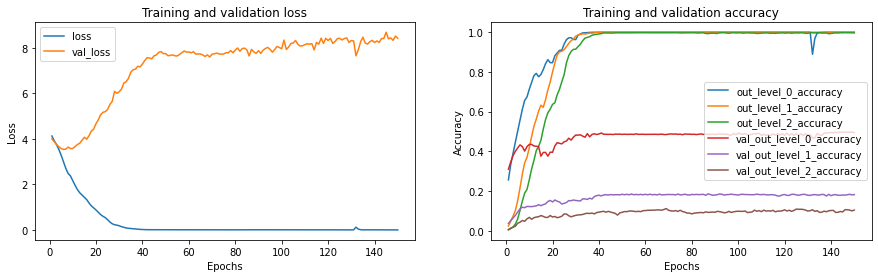

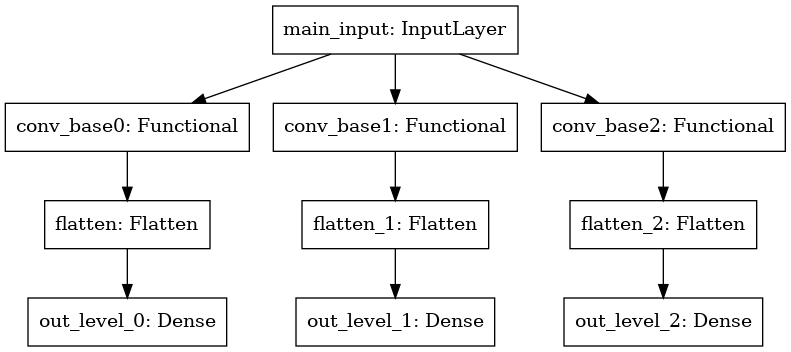

In [7]:
# Create the model
mnets_model = models.get_mnets(dataset.num_classes,
                               dataset.image_size,
                               conv_base=conv_base,
                               learning_rate=learning_rate)
mnets_model.summary()
#train model
history_mnets_model = mnets_model.fit(dataset.train_dataset,
                                      validation_data=dataset.val_dataset,
                                      epochs=epochs,
                                      callbacks=[performance_callback_val])
utils.learning_plots(history_mnets_model)
plot_model(mnets_model)


In [ ]:
# Create the model
mnets_model_pred = mnets_model.predict(dataset.X_test)
mnets_model_accuracy = metrics.get_top_k_taxonomical_accuracy(dataset.y_test, mnets_model_pred)
mnets_model_accuracy = [x * 100 for x in mnets_model_accuracy]
oracle_accuracy = utils.get_potential_improvement(dataset.y_test,
                                                  mnets_model_pred,
                                                  dataset.taxonomy)
plt = utils.plot_potential_improvement(oracle_accuracy, mnets_model_accuracy)
ax = plt.gca()
ax.set_ylim(0, 41)
plt.savefig('plots/oracle_' + dataset.name + '_' + conv_base + '.eps', bbox_inches='tight')
plt.show()


Model: "mout_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten (Flatten)               (None, 2048)         0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_level_0 (Dense)             (None, 13)           26637       flatten[0][0]                    
_________________________________________________________________________________________

2021-10-10 19:46:02.328466: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-10 19:46:04.398617: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


64/64 [==============================] - 34s 462ms/step - loss: 4.1931 - out_level_0_loss: 2.2453 - out_level_1_loss: 4.8497 - out_level_2_loss: 5.4843 - out_level_0_accuracy: 0.2313 - out_level_1_accuracy: 0.0156 - out_level_2_accuracy: 0.0043 - val_loss: 4.0519 - val_out_level_0_loss: 2.0892 - val_out_level_1_loss: 4.6733 - val_out_level_2_loss: 5.3932 - val_out_level_0_accuracy: 0.2918 - val_out_level_1_accuracy: 0.0221 - val_out_level_2_accuracy: 0.0072
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 3.1551 - out_level_0_loss: 1.3932 - out_level_1_loss: 3.6387 - out_level_2_loss: 4.4333 - out_level_0_accuracy: 0.5241 - out_level_1_accuracy: 0.1503 - out_level_2_accuracy: 0.0810 - val_loss: 3.4268 - val_out_level_0_loss: 1.6559 - val_out_level_1_loss: 3.9070 - val_out_level_2_loss: 4.7177 - val_out_level_0_accuracy: 0.4206 - val_out_level_1_accuracy: 0.1082 - val_out_level_2_accuracy: 0.0532
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 405ms/step - loss: 2.2274 - out_level_0_loss: 0.9945 - out_level_1_loss: 2.5399 - out_level_2_loss: 3.1480 - out_level_0_accuracy: 0.6524 - out_level_1_accuracy: 0.3469 - out_level_2_accuracy: 0.2681 - val_loss: 3.3606 - val_out_level_0_loss: 1.7853 - val_out_level_1_loss: 3.7915 - val_out_level_2_loss: 4.5050 - val_out_level_0_accuracy: 0.4052 - val_out_level_1_accuracy: 0.1473 - val_out_level_2_accuracy: 0.0861
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 407ms/step - loss: 1.6240 - out_level_0_loss: 0.7554 - out_level_1_loss: 1.8271 - out_level_2_loss: 2.2894 - out_level_0_accuracy: 0.7338 - out_level_1_accuracy: 0.5096 - out_level_2_accuracy: 0.4347 - val_loss: 3.4517 - val_out_level_0_loss: 1.8651 - val_out_level_1_loss: 3.8817 - val_out_level_2_loss: 4.6083 - val_out_level_0_accuracy: 0.4520 - val_out_level_1_accuracy: 0.1677 - val_out_level_2_accuracy: 0.1035
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 404ms/step - loss: 1.1466 - out_level_0_loss: 0.5538 - out_level_1_loss: 1.2858 - out_level_2_loss: 1.6002 - out_level_0_accuracy: 0.8048 - out_level_1_accuracy: 0.6499 - out_level_2_accuracy: 0.5981 - val_loss: 3.8017 - val_out_level_0_loss: 2.1339 - val_out_level_1_loss: 4.2841 - val_out_level_2_loss: 4.9871 - val_out_level_0_accuracy: 0.4535 - val_out_level_1_accuracy: 0.1828 - val_out_level_2_accuracy: 0.1182
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 408ms/step - loss: 0.8173 - out_level_0_loss: 0.4769 - out_level_1_loss: 0.8814 - out_level_2_loss: 1.0935 - out_level_0_accuracy: 0.8282 - out_level_1_accuracy: 0.7626 - out_level_2_accuracy: 0.7209 - val_loss: 4.0720 - val_out_level_0_loss: 2.4090 - val_out_level_1_loss: 4.5366 - val_out_level_2_loss: 5.2703 - val_out_level_0_accuracy: 0.3878 - val_out_level_1_accuracy: 0.1597 - val_out_level_2_accuracy: 0.1085
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 405ms/step - loss: 0.3864 - out_level_0_loss: 0.2420 - out_level_1_loss: 0.4162 - out_level_2_loss: 0.5009 - out_level_0_accuracy: 0.9147 - out_level_1_accuracy: 0.8911 - out_level_2_accuracy: 0.8816 - val_loss: 4.8775 - val_out_level_0_loss: 2.9518 - val_out_level_1_loss: 5.4995 - val_out_level_2_loss: 6.1814 - val_out_level_0_accuracy: 0.4729 - val_out_level_1_accuracy: 0.1716 - val_out_level_2_accuracy: 0.1241
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 402ms/step - loss: 0.2403 - out_level_0_loss: 0.1856 - out_level_1_loss: 0.2463 - out_level_2_loss: 0.2890 - out_level_0_accuracy: 0.9294 - out_level_1_accuracy: 0.9407 - out_level_2_accuracy: 0.9343 - val_loss: 5.5251 - val_out_level_0_loss: 3.3461 - val_out_level_1_loss: 6.2259 - val_out_level_2_loss: 7.0033 - val_out_level_0_accuracy: 0.4803 - val_out_level_1_accuracy: 0.1756 - val_out_level_2_accuracy: 0.1264
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.1582 - out_level_0_loss: 0.1403 - out_level_1_loss: 0.1552 - out_level_2_loss: 0.1790 - out_level_0_accuracy: 0.9484 - out_level_1_accuracy: 0.9664 - out_level_2_accuracy: 0.9637 - val_loss: 5.7715 - val_out_level_0_loss: 3.5082 - val_out_level_1_loss: 6.4886 - val_out_level_2_loss: 7.3177 - val_out_level_0_accuracy: 0.4570 - val_out_level_1_accuracy: 0.1938 - val_out_level_2_accuracy: 0.1301
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0662 - out_level_0_loss: 0.0679 - out_level_1_loss: 0.0598 - out_level_2_loss: 0.0709 - out_level_0_accuracy: 0.9779 - out_level_1_accuracy: 0.9904 - out_level_2_accuracy: 0.9886 - val_loss: 6.0295 - val_out_level_0_loss: 3.5910 - val_out_level_1_loss: 6.8096 - val_out_level_2_loss: 7.6880 - val_out_level_0_accuracy: 0.4438 - val_out_level_1_accuracy: 0.1900 - val_out_level_2_accuracy: 0.1328
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0365 - out_level_0_loss: 0.0449 - out_level_1_loss: 0.0296 - out_level_2_loss: 0.0350 - out_level_0_accuracy: 0.9870 - out_level_1_accuracy: 0.9974 - out_level_2_accuracy: 0.9964 - val_loss: 6.6377 - val_out_level_0_loss: 4.0294 - val_out_level_1_loss: 7.4473 - val_out_level_2_loss: 8.4365 - val_out_level_0_accuracy: 0.4891 - val_out_level_1_accuracy: 0.2045 - val_out_level_2_accuracy: 0.1453
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0111 - out_level_0_loss: 0.0052 - out_level_1_loss: 0.0075 - out_level_2_loss: 0.0206 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9972 - val_loss: 7.1223 - val_out_level_0_loss: 4.1111 - val_out_level_1_loss: 8.0987 - val_out_level_2_loss: 9.1571 - val_out_level_0_accuracy: 0.4873 - val_out_level_1_accuracy: 0.2107 - val_out_level_2_accuracy: 0.1435
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0093 - out_level_0_loss: 0.0034 - out_level_1_loss: 0.0056 - out_level_2_loss: 0.0188 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9972 - val_loss: 7.2493 - val_out_level_0_loss: 4.2069 - val_out_level_1_loss: 8.2355 - val_out_level_2_loss: 9.3054 - val_out_level_0_accuracy: 0.4898 - val_out_level_1_accuracy: 0.2065 - val_out_level_2_accuracy: 0.1440
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0097 - out_level_0_loss: 0.0030 - out_level_1_loss: 0.0049 - out_level_2_loss: 0.0213 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9969 - val_loss: 7.2861 - val_out_level_0_loss: 4.2557 - val_out_level_1_loss: 8.2540 - val_out_level_2_loss: 9.3486 - val_out_level_0_accuracy: 0.4930 - val_out_level_1_accuracy: 0.2022 - val_out_level_2_accuracy: 0.1438
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0093 - out_level_0_loss: 0.0032 - out_level_1_loss: 0.0048 - out_level_2_loss: 0.0198 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9972 - val_loss: 7.3627 - val_out_level_0_loss: 4.2997 - val_out_level_1_loss: 8.3418 - val_out_level_2_loss: 9.4466 - val_out_level_0_accuracy: 0.4935 - val_out_level_1_accuracy: 0.2040 - val_out_level_2_accuracy: 0.1430
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 408ms/step - loss: 0.0090 - out_level_0_loss: 0.0030 - out_level_1_loss: 0.0043 - out_level_2_loss: 0.0197 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9972 - val_loss: 7.4194 - val_out_level_0_loss: 4.3808 - val_out_level_1_loss: 8.3965 - val_out_level_2_loss: 9.4810 - val_out_level_0_accuracy: 0.5020 - val_out_level_1_accuracy: 0.2060 - val_out_level_2_accuracy: 0.1438
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0086 - out_level_0_loss: 0.0029 - out_level_1_loss: 0.0041 - out_level_2_loss: 0.0189 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9972 - val_loss: 7.6396 - val_out_level_0_loss: 4.6526 - val_out_level_1_loss: 8.5983 - val_out_level_2_loss: 9.6679 - val_out_level_0_accuracy: 0.5040 - val_out_level_1_accuracy: 0.2042 - val_out_level_2_accuracy: 0.1458
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0086 - out_level_0_loss: 0.0029 - out_level_1_loss: 0.0041 - out_level_2_loss: 0.0188 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9974 - val_loss: 7.7880 - val_out_level_0_loss: 4.8744 - val_out_level_1_loss: 8.7149 - val_out_level_2_loss: 9.7746 - val_out_level_0_accuracy: 0.5045 - val_out_level_1_accuracy: 0.2025 - val_out_level_2_accuracy: 0.1420
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 403ms/step - loss: 0.0089 - out_level_0_loss: 0.0024 - out_level_1_loss: 0.0042 - out_level_2_loss: 0.0199 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9972 - val_loss: 7.6872 - val_out_level_0_loss: 4.6923 - val_out_level_1_loss: 8.6409 - val_out_level_2_loss: 9.7284 - val_out_level_0_accuracy: 0.5060 - val_out_level_1_accuracy: 0.2047 - val_out_level_2_accuracy: 0.1455
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0086 - out_level_0_loss: 0.0030 - out_level_1_loss: 0.0047 - out_level_2_loss: 0.0181 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9977 - val_loss: 7.7725 - val_out_level_0_loss: 4.6605 - val_out_level_1_loss: 8.7211 - val_out_level_2_loss: 9.9360 - val_out_level_0_accuracy: 0.4995 - val_out_level_1_accuracy: 0.2012 - val_out_level_2_accuracy: 0.1435
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0148 - out_level_0_loss: 0.0095 - out_level_1_loss: 0.0132 - out_level_2_loss: 0.0216 - out_level_0_accuracy: 0.9971 - out_level_1_accuracy: 0.9978 - out_level_2_accuracy: 0.9963 - val_loss: 7.0304 - val_out_level_0_loss: 4.1357 - val_out_level_1_loss: 7.9707 - val_out_level_2_loss: 8.9847 - val_out_level_0_accuracy: 0.4709 - val_out_level_1_accuracy: 0.2082 - val_out_level_2_accuracy: 0.1388
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 401ms/step - loss: 0.0146 - out_level_0_loss: 0.0138 - out_level_1_loss: 0.0141 - out_level_2_loss: 0.0161 - out_level_0_accuracy: 0.9962 - out_level_1_accuracy: 0.9980 - out_level_2_accuracy: 0.9973 - val_loss: 7.0976 - val_out_level_0_loss: 4.2007 - val_out_level_1_loss: 8.0596 - val_out_level_2_loss: 9.0325 - val_out_level_0_accuracy: 0.4734 - val_out_level_1_accuracy: 0.2012 - val_out_level_2_accuracy: 0.1381
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0085 - out_level_0_loss: 0.0072 - out_level_1_loss: 0.0081 - out_level_2_loss: 0.0102 - out_level_0_accuracy: 0.9983 - out_level_1_accuracy: 0.9989 - out_level_2_accuracy: 0.9983 - val_loss: 7.9149 - val_out_level_0_loss: 5.1817 - val_out_level_1_loss: 8.7603 - val_out_level_2_loss: 9.8028 - val_out_level_0_accuracy: 0.4709 - val_out_level_1_accuracy: 0.1988 - val_out_level_2_accuracy: 0.1358
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0100 - out_level_0_loss: 0.0060 - out_level_1_loss: 0.0096 - out_level_2_loss: 0.0144 - out_level_0_accuracy: 0.9990 - out_level_1_accuracy: 0.9990 - out_level_2_accuracy: 0.9983 - val_loss: 7.4736 - val_out_level_0_loss: 4.5208 - val_out_level_1_loss: 8.4199 - val_out_level_2_loss: 9.4801 - val_out_level_0_accuracy: 0.4841 - val_out_level_1_accuracy: 0.1945 - val_out_level_2_accuracy: 0.1396
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 401ms/step - loss: 0.0099 - out_level_0_loss: 0.0075 - out_level_1_loss: 0.0086 - out_level_2_loss: 0.0137 - out_level_0_accuracy: 0.9984 - out_level_1_accuracy: 0.9989 - out_level_2_accuracy: 0.9979 - val_loss: 7.6682 - val_out_level_0_loss: 4.6551 - val_out_level_1_loss: 8.6358 - val_out_level_2_loss: 9.7137 - val_out_level_0_accuracy: 0.4831 - val_out_level_1_accuracy: 0.1958 - val_out_level_2_accuracy: 0.1386
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 405ms/step - loss: 0.0082 - out_level_0_loss: 0.0076 - out_level_1_loss: 0.0059 - out_level_2_loss: 0.0113 - out_level_0_accuracy: 0.9985 - out_level_1_accuracy: 0.9990 - out_level_2_accuracy: 0.9978 - val_loss: 7.5902 - val_out_level_0_loss: 4.7020 - val_out_level_1_loss: 8.5384 - val_out_level_2_loss: 9.5301 - val_out_level_0_accuracy: 0.4808 - val_out_level_1_accuracy: 0.2007 - val_out_level_2_accuracy: 0.1440
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 400ms/step - loss: 0.0104 - out_level_0_loss: 0.0106 - out_level_1_loss: 0.0061 - out_level_2_loss: 0.0146 - out_level_0_accuracy: 0.9969 - out_level_1_accuracy: 0.9993 - out_level_2_accuracy: 0.9978 - val_loss: 8.0389 - val_out_level_0_loss: 5.4022 - val_out_level_1_loss: 8.8354 - val_out_level_2_loss: 9.8790 - val_out_level_0_accuracy: 0.4709 - val_out_level_1_accuracy: 0.2060 - val_out_level_2_accuracy: 0.1423
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 408ms/step - loss: 0.0142 - out_level_0_loss: 0.0180 - out_level_1_loss: 0.0087 - out_level_2_loss: 0.0157 - out_level_0_accuracy: 0.9934 - out_level_1_accuracy: 0.9984 - out_level_2_accuracy: 0.9971 - val_loss: 7.2791 - val_out_level_0_loss: 4.3041 - val_out_level_1_loss: 8.3093 - val_out_level_2_loss: 9.2239 - val_out_level_0_accuracy: 0.4801 - val_out_level_1_accuracy: 0.2022 - val_out_level_2_accuracy: 0.1358
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 397ms/step - loss: 0.0124 - out_level_0_loss: 0.0106 - out_level_1_loss: 0.0079 - out_level_2_loss: 0.0186 - out_level_0_accuracy: 0.9964 - out_level_1_accuracy: 0.9984 - out_level_2_accuracy: 0.9964 - val_loss: 7.6931 - val_out_level_0_loss: 4.7329 - val_out_level_1_loss: 8.6220 - val_out_level_2_loss: 9.7243 - val_out_level_0_accuracy: 0.4813 - val_out_level_1_accuracy: 0.2027 - val_out_level_2_accuracy: 0.1418
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0120 - out_level_0_loss: 0.0112 - out_level_1_loss: 0.0092 - out_level_2_loss: 0.0157 - out_level_0_accuracy: 0.9966 - out_level_1_accuracy: 0.9975 - out_level_2_accuracy: 0.9972 - val_loss: 7.8317 - val_out_level_0_loss: 4.7282 - val_out_level_1_loss: 8.8457 - val_out_level_2_loss: 9.9213 - val_out_level_0_accuracy: 0.4811 - val_out_level_1_accuracy: 0.2085 - val_out_level_2_accuracy: 0.1420
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

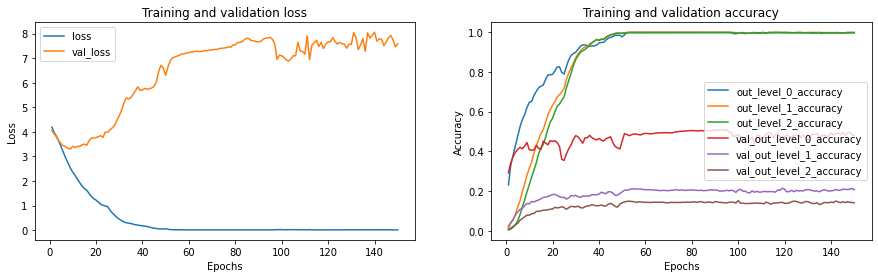

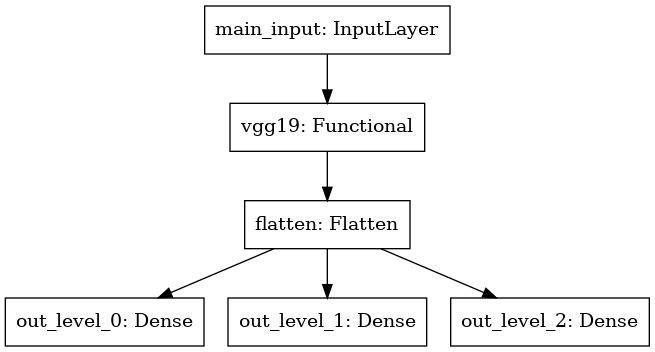

In [5]:
# Create the model
mout_model = models.get_mout_model(dataset.num_classes,
                                   dataset.image_size,
                                   conv_base=conv_base,
                                   learning_rate=learning_rate)
mout_model.summary()
#train model
history_mout_model = mout_model.fit(dataset.train_dataset,
                                    validation_data=dataset.val_dataset,
                                    epochs=epochs,
                                    callbacks=[performance_callback_val])
utils.learning_plots(history_mout_model)
plot_model(mout_model)


In [ ]:
# # Create the model
# BCNN1_model = models.get_BCNN1(dataset.num_classes, 
#                                dataset.image_size, 
#                                conv_base=conv_base,
#                                learning_rate=learning_rate)
# BCNN1_model.summary()
# #train model
# history_BCNN1_model = BCNN1_model.fit(dataset.train_dataset, 
#                                       validation_data = dataset.val_dataset, 
#                                       epochs=epochs,
#                                       callbacks=[performance_callback_val])
# utils.learning_plots(history_BCNN1_model)
# plot_model(BCNN1_model)


Model: "BCNN1_reversed_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 64, 64, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
out_level_2 (Dense)          (None, 196)               401604    
_________________________________________________________________
out_level_1 (Dense)          (None, 113)               22261     
_________________________________________________________________
out_level_0 (Dense)          (None, 13)                1482      
Total params: 20,449,731
Trainable params: 20,449,731
Non-trainable params: 0
__________________________________

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0000 |       Consistency        | 0.0000 |            -             |   -    |
|       h-Precision        | 0.0983 |         h-Recall         | 0.1847 |        h-F1-Score        | 0.1280 |
|       Accuracy L_0       | 0.2460 |       Accuracy L_1       | 0.0109 |       Accuracy L_2       | 0.0353 |
|  HarmonicM Accuracy-k=1  | 0.0242 |  HarmonicM Accuracy-k=2  | 0.0499 |  HarmonicM Accuracy-k=5  | 0.1207 |
| Arithmet

INFO:tensorflow:Assets written to: models/BCNN1_reversed_model_stanford_cars_vgg19/assets
Epoch 15/150
64/64 [==============================] - 26s 405ms/step - loss: 3.2142 - out_level_0_loss: 2.5444 - out_level_1_loss: 4.7137 - out_level_2_loss: 2.3845 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0257 - out_level_2_accuracy: 0.4436 - val_loss: 4.2212 - val_out_level_0_loss: 2.5444 - val_out_level_1_loss: 4.7213 - val_out_level_2_loss: 5.3978 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0189 - val_out_level_2_accuracy: 0.0828
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Valu

64/64 [==============================] - 26s 409ms/step - loss: 2.9137 - out_level_0_loss: 2.5397 - out_level_1_loss: 4.7056 - out_level_2_loss: 1.4958 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0352 - out_level_2_accuracy: 0.6291 - val_loss: 4.5369 - val_out_level_0_loss: 2.5398 - val_out_level_1_loss: 4.7186 - val_out_level_2_loss: 6.3523 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0177 - val_out_level_2_accuracy: 0.0950
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 2.6767 - out_level_0_loss: 2.5351 - out_level_1_loss: 4.6976 - out_level_2_loss: 0.7973 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0469 - out_level_2_accuracy: 0.7990 - val_loss: 4.8197 - val_out_level_0_loss: 2.5352 - val_out_level_1_loss: 4.7170 - val_out_level_2_loss: 7.2069 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0221 - val_out_level_2_accuracy: 0.0965
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 2.4964 - out_level_0_loss: 2.5305 - out_level_1_loss: 4.6876 - out_level_2_loss: 0.2712 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0619 - out_level_2_accuracy: 0.9344 - val_loss: 5.2493 - val_out_level_0_loss: 2.5307 - val_out_level_1_loss: 4.7160 - val_out_level_2_loss: 8.5011 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0236 - val_out_level_2_accuracy: 0.0995
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 412ms/step - loss: 2.4522 - out_level_0_loss: 2.5259 - out_level_1_loss: 4.6819 - out_level_2_loss: 0.1488 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0691 - out_level_2_accuracy: 0.9639 - val_loss: 5.5342 - val_out_level_0_loss: 2.5263 - val_out_level_1_loss: 4.7139 - val_out_level_2_loss: 9.3624 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0234 - val_out_level_2_accuracy: 0.0998
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 412ms/step - loss: 2.4220 - out_level_0_loss: 2.5213 - out_level_1_loss: 4.6759 - out_level_2_loss: 0.0687 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0771 - out_level_2_accuracy: 0.9844 - val_loss: 5.5836 - val_out_level_0_loss: 2.5218 - val_out_level_1_loss: 4.7123 - val_out_level_2_loss: 9.5167 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0226 - val_out_level_2_accuracy: 0.1060
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 415ms/step - loss: 2.4043 - out_level_0_loss: 2.5168 - out_level_1_loss: 4.6701 - out_level_2_loss: 0.0261 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.0959 - out_level_2_accuracy: 0.9971 - val_loss: 5.8752 - val_out_level_0_loss: 2.5174 - val_out_level_1_loss: 4.7115 - val_out_level_2_loss: 10.3968 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0261 - val_out_level_2_accuracy: 0.1090
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 414ms/step - loss: 2.4018 - out_level_0_loss: 2.5124 - out_level_1_loss: 4.6653 - out_level_2_loss: 0.0278 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1017 - out_level_2_accuracy: 0.9973 - val_loss: 5.9379 - val_out_level_0_loss: 2.5130 - val_out_level_1_loss: 4.7085 - val_out_level_2_loss: 10.5923 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0294 - val_out_level_2_accuracy: 0.1112
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 409ms/step - loss: 2.3964 - out_level_0_loss: 2.5080 - out_level_1_loss: 4.6606 - out_level_2_loss: 0.0208 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1158 - out_level_2_accuracy: 0.9972 - val_loss: 5.9216 - val_out_level_0_loss: 2.5087 - val_out_level_1_loss: 4.7055 - val_out_level_2_loss: 10.5506 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0311 - val_out_level_2_accuracy: 0.1062
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 405ms/step - loss: 2.3928 - out_level_0_loss: 2.5036 - out_level_1_loss: 4.6559 - out_level_2_loss: 0.0189 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1168 - out_level_2_accuracy: 0.9979 - val_loss: 5.9836 - val_out_level_0_loss: 2.5044 - val_out_level_1_loss: 4.7038 - val_out_level_2_loss: 10.7426 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0299 - val_out_level_2_accuracy: 0.1057
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 414ms/step - loss: 2.3896 - out_level_0_loss: 2.4992 - out_level_1_loss: 4.6513 - out_level_2_loss: 0.0183 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1240 - out_level_2_accuracy: 0.9978 - val_loss: 6.0640 - val_out_level_0_loss: 2.5001 - val_out_level_1_loss: 4.7032 - val_out_level_2_loss: 10.9886 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0313 - val_out_level_2_accuracy: 0.1012
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 416ms/step - loss: 2.3850 - out_level_0_loss: 2.4949 - out_level_1_loss: 4.6465 - out_level_2_loss: 0.0136 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1275 - out_level_2_accuracy: 0.9982 - val_loss: 6.0183 - val_out_level_0_loss: 2.4959 - val_out_level_1_loss: 4.7007 - val_out_level_2_loss: 10.8581 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0336 - val_out_level_2_accuracy: 0.1035
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 410ms/step - loss: 2.3879 - out_level_0_loss: 2.4906 - out_level_1_loss: 4.6423 - out_level_2_loss: 0.0309 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1515 - out_level_2_accuracy: 0.9940 - val_loss: 5.7737 - val_out_level_0_loss: 2.4917 - val_out_level_1_loss: 4.7005 - val_out_level_2_loss: 10.1288 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0333 - val_out_level_2_accuracy: 0.1072
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

INFO:tensorflow:Assets written to: models/BCNN1_reversed_model_stanford_cars_vgg19/assets
Epoch 80/150
64/64 [==============================] - 27s 414ms/step - loss: 2.3802 - out_level_0_loss: 2.4864 - out_level_1_loss: 4.6374 - out_level_2_loss: 0.0170 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1670 - out_level_2_accuracy: 0.9978 - val_loss: 5.7927 - val_out_level_0_loss: 2.4875 - val_out_level_1_loss: 4.6978 - val_out_level_2_loss: 10.1929 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0358 - val_out_level_2_accuracy: 0.1179
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Val

64/64 [==============================] - 26s 412ms/step - loss: 2.3761 - out_level_0_loss: 2.4822 - out_level_1_loss: 4.6326 - out_level_2_loss: 0.0135 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1726 - out_level_2_accuracy: 0.9979 - val_loss: 6.0646 - val_out_level_0_loss: 2.4834 - val_out_level_1_loss: 4.6955 - val_out_level_2_loss: 11.0148 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0435 - val_out_level_2_accuracy: 0.1072
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

INFO:tensorflow:Assets written to: models/BCNN1_reversed_model_stanford_cars_vgg19/assets
Epoch 90/150
64/64 [==============================] - 26s 412ms/step - loss: 2.3737 - out_level_0_loss: 2.4780 - out_level_1_loss: 4.6280 - out_level_2_loss: 0.0150 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1828 - out_level_2_accuracy: 0.9977 - val_loss: 5.8525 - val_out_level_0_loss: 2.4793 - val_out_level_1_loss: 4.6932 - val_out_level_2_loss: 10.3849 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0435 - val_out_level_2_accuracy: 0.1100
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Val

64/64 [==============================] - 26s 412ms/step - loss: 2.3699 - out_level_0_loss: 2.4739 - out_level_1_loss: 4.6233 - out_level_2_loss: 0.0126 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1889 - out_level_2_accuracy: 0.9983 - val_loss: 5.9055 - val_out_level_0_loss: 2.4752 - val_out_level_1_loss: 4.6922 - val_out_level_2_loss: 10.5489 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0428 - val_out_level_2_accuracy: 0.1109
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 415ms/step - loss: 2.3671 - out_level_0_loss: 2.4698 - out_level_1_loss: 4.6185 - out_level_2_loss: 0.0130 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.1886 - out_level_2_accuracy: 0.9980 - val_loss: 6.0156 - val_out_level_0_loss: 2.4712 - val_out_level_1_loss: 4.6922 - val_out_level_2_loss: 10.8833 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0415 - val_out_level_2_accuracy: 0.1082
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 413ms/step - loss: 2.3695 - out_level_0_loss: 2.4657 - out_level_1_loss: 4.6145 - out_level_2_loss: 0.0285 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2053 - out_level_2_accuracy: 0.9942 - val_loss: 5.8582 - val_out_level_0_loss: 2.4672 - val_out_level_1_loss: 4.6913 - val_out_level_2_loss: 10.4161 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0485 - val_out_level_2_accuracy: 0.1045
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 410ms/step - loss: 2.3616 - out_level_0_loss: 2.4616 - out_level_1_loss: 4.6093 - out_level_2_loss: 0.0139 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2240 - out_level_2_accuracy: 0.9979 - val_loss: 6.0393 - val_out_level_0_loss: 2.4633 - val_out_level_1_loss: 4.6896 - val_out_level_2_loss: 10.9650 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0480 - val_out_level_2_accuracy: 0.1057
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 415ms/step - loss: 2.3589 - out_level_0_loss: 2.4576 - out_level_1_loss: 4.6047 - out_level_2_loss: 0.0143 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2250 - out_level_2_accuracy: 0.9972 - val_loss: 5.9383 - val_out_level_0_loss: 2.4594 - val_out_level_1_loss: 4.6896 - val_out_level_2_loss: 10.6658 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0502 - val_out_level_2_accuracy: 0.1035
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 414ms/step - loss: 2.3574 - out_level_0_loss: 2.4537 - out_level_1_loss: 4.6001 - out_level_2_loss: 0.0183 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2425 - out_level_2_accuracy: 0.9962 - val_loss: 5.8706 - val_out_level_0_loss: 2.4554 - val_out_level_1_loss: 4.6869 - val_out_level_2_loss: 10.4696 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0530 - val_out_level_2_accuracy: 0.1104
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 411ms/step - loss: 2.3525 - out_level_0_loss: 2.4497 - out_level_1_loss: 4.5952 - out_level_2_loss: 0.0125 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2505 - out_level_2_accuracy: 0.9971 - val_loss: 5.8587 - val_out_level_0_loss: 2.4516 - val_out_level_1_loss: 4.6862 - val_out_level_2_loss: 10.4383 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0517 - val_out_level_2_accuracy: 0.1144
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 415ms/step - loss: 2.3532 - out_level_0_loss: 2.4458 - out_level_1_loss: 4.5911 - out_level_2_loss: 0.0225 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2504 - out_level_2_accuracy: 0.9942 - val_loss: 5.8287 - val_out_level_0_loss: 2.4478 - val_out_level_1_loss: 4.6845 - val_out_level_2_loss: 10.3538 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0510 - val_out_level_2_accuracy: 0.1129
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 407ms/step - loss: 2.3467 - out_level_0_loss: 2.4420 - out_level_1_loss: 4.5859 - out_level_2_loss: 0.0122 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2609 - out_level_2_accuracy: 0.9977 - val_loss: 5.9518 - val_out_level_0_loss: 2.4440 - val_out_level_1_loss: 4.6838 - val_out_level_2_loss: 10.7276 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0532 - val_out_level_2_accuracy: 0.1037
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 412ms/step - loss: 2.3432 - out_level_0_loss: 2.4381 - out_level_1_loss: 4.5810 - out_level_2_loss: 0.0105 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2613 - out_level_2_accuracy: 0.9982 - val_loss: 5.8799 - val_out_level_0_loss: 2.4402 - val_out_level_1_loss: 4.6819 - val_out_level_2_loss: 10.5176 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0555 - val_out_level_2_accuracy: 0.1204
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 417ms/step - loss: 2.3412 - out_level_0_loss: 2.4343 - out_level_1_loss: 4.5765 - out_level_2_loss: 0.0127 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2694 - out_level_2_accuracy: 0.9977 - val_loss: 5.7332 - val_out_level_0_loss: 2.4365 - val_out_level_1_loss: 4.6810 - val_out_level_2_loss: 10.0821 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0572 - val_out_level_2_accuracy: 0.1162
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 413ms/step - loss: 2.3381 - out_level_0_loss: 2.4305 - out_level_1_loss: 4.5718 - out_level_2_loss: 0.0120 - out_level_0_accuracy: 0.2548 - out_level_1_accuracy: 0.2917 - out_level_2_accuracy: 0.9971 - val_loss: 5.6162 - val_out_level_0_loss: 2.4328 - val_out_level_1_loss: 4.6790 - val_out_level_2_loss: 9.7367 - val_out_level_0_accuracy: 0.2460 - val_out_level_1_accuracy: 0.0607 - val_out_level_2_accuracy: 0.1189
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

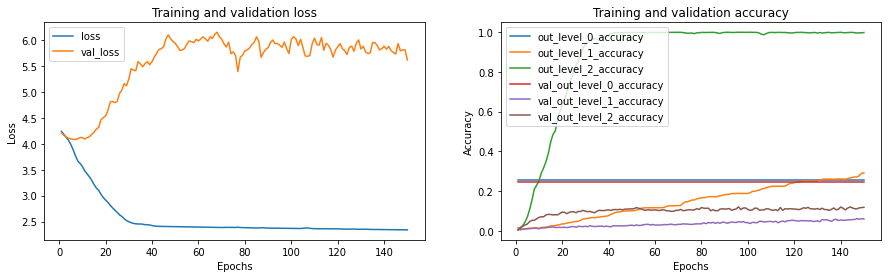

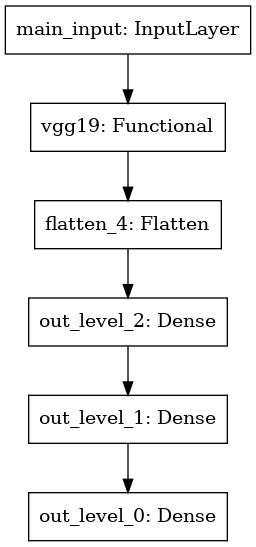

In [9]:
# Create the model
BCNN1_reversed_model = models.get_BCNN1(dataset.num_classes,
                                        dataset.image_size,
                                        reverse=True,
                                        conv_base=conv_base,
                                        learning_rate=learning_rate)
BCNN1_reversed_model.summary()
#train model
history_BCNN1_reversed_model = BCNN1_reversed_model.fit(dataset.train_dataset,
                                                        validation_data=dataset.val_dataset,
                                                        epochs=epochs,
                                                        callbacks=[performance_callback_val])
utils.learning_plots(history_BCNN1_reversed_model)
plot_model(BCNN1_reversed_model)


Model: "BCNN2_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 2048)         0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_level_0 (Dense)          (None, 13)           26637       flatten_5[0][0]                  
________________________________________________________________________________________

64/64 [==============================] - 26s 406ms/step - loss: 3.8162 - out_level_0_loss: 1.5009 - out_level_1_loss: 4.6815 - out_level_2_loss: 5.2662 - out_level_0_accuracy: 0.5114 - out_level_1_accuracy: 0.0430 - out_level_2_accuracy: 0.0085 - val_loss: 3.9359 - val_out_level_0_loss: 1.7620 - val_out_level_1_loss: 4.7441 - val_out_level_2_loss: 5.3017 - val_out_level_0_accuracy: 0.4090 - val_out_level_1_accuracy: 0.0343 - val_out_level_2_accuracy: 0.0060
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 414ms/step - loss: 3.4367 - out_level_0_loss: 0.8542 - out_level_1_loss: 4.4223 - out_level_2_loss: 5.0336 - out_level_0_accuracy: 0.7461 - out_level_1_accuracy: 0.0684 - out_level_2_accuracy: 0.0232 - val_loss: 4.0336 - val_out_level_0_loss: 2.0009 - val_out_level_1_loss: 4.7965 - val_out_level_2_loss: 5.3034 - val_out_level_0_accuracy: 0.3791 - val_out_level_1_accuracy: 0.0391 - val_out_level_2_accuracy: 0.0100
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

INFO:tensorflow:Assets written to: models/BCNN2_model_stanford_cars_vgg19/assets
Epoch 15/150
64/64 [==============================] - 26s 407ms/step - loss: 3.2249 - out_level_0_loss: 0.6628 - out_level_1_loss: 4.2205 - out_level_2_loss: 4.7913 - out_level_0_accuracy: 0.7984 - out_level_1_accuracy: 0.0980 - out_level_2_accuracy: 0.0413 - val_loss: 4.1085 - val_out_level_0_loss: 2.2682 - val_out_level_1_loss: 4.8030 - val_out_level_2_loss: 5.2542 - val_out_level_0_accuracy: 0.3483 - val_out_level_1_accuracy: 0.0418 - val_out_level_2_accuracy: 0.0157
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---

64/64 [==============================] - 26s 410ms/step - loss: 2.9991 - out_level_0_loss: 0.5541 - out_level_1_loss: 3.9712 - out_level_2_loss: 4.4720 - out_level_0_accuracy: 0.8232 - out_level_1_accuracy: 0.1243 - out_level_2_accuracy: 0.0691 - val_loss: 4.2253 - val_out_level_0_loss: 2.5655 - val_out_level_1_loss: 4.8892 - val_out_level_2_loss: 5.2211 - val_out_level_0_accuracy: 0.3371 - val_out_level_1_accuracy: 0.0485 - val_out_level_2_accuracy: 0.0177
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 412ms/step - loss: 2.7919 - out_level_0_loss: 0.4790 - out_level_1_loss: 3.7585 - out_level_2_loss: 4.1383 - out_level_0_accuracy: 0.8437 - out_level_1_accuracy: 0.1583 - out_level_2_accuracy: 0.1169 - val_loss: 4.2769 - val_out_level_0_loss: 2.6530 - val_out_level_1_loss: 4.9791 - val_out_level_2_loss: 5.1987 - val_out_level_0_accuracy: 0.3963 - val_out_level_1_accuracy: 0.0520 - val_out_level_2_accuracy: 0.0266
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

INFO:tensorflow:Assets written to: models/BCNN2_model_stanford_cars_vgg19/assets
Epoch 30/150
64/64 [==============================] - 26s 408ms/step - loss: 2.4906 - out_level_0_loss: 0.3505 - out_level_1_loss: 3.4318 - out_level_2_loss: 3.6894 - out_level_0_accuracy: 0.8857 - out_level_1_accuracy: 0.2167 - out_level_2_accuracy: 0.1806 - val_loss: 4.7899 - val_out_level_0_loss: 3.5550 - val_out_level_1_loss: 5.3897 - val_out_level_2_loss: 5.4251 - val_out_level_0_accuracy: 0.3692 - val_out_level_1_accuracy: 0.0460 - val_out_level_2_accuracy: 0.0294
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---

64/64 [==============================] - 26s 409ms/step - loss: 2.1661 - out_level_0_loss: 0.2400 - out_level_1_loss: 3.0621 - out_level_2_loss: 3.1962 - out_level_0_accuracy: 0.9234 - out_level_1_accuracy: 0.2741 - out_level_2_accuracy: 0.2696 - val_loss: 4.9326 - val_out_level_0_loss: 3.8345 - val_out_level_1_loss: 5.5387 - val_out_level_2_loss: 5.4246 - val_out_level_0_accuracy: 0.3694 - val_out_level_1_accuracy: 0.0458 - val_out_level_2_accuracy: 0.0328
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 412ms/step - loss: 1.9619 - out_level_0_loss: 0.2651 - out_level_1_loss: 2.8030 - out_level_2_loss: 2.8176 - out_level_0_accuracy: 0.9086 - out_level_1_accuracy: 0.3188 - out_level_2_accuracy: 0.3540 - val_loss: 5.2351 - val_out_level_0_loss: 4.2175 - val_out_level_1_loss: 5.9146 - val_out_level_2_loss: 5.5732 - val_out_level_0_accuracy: 0.3915 - val_out_level_1_accuracy: 0.0495 - val_out_level_2_accuracy: 0.0331
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 412ms/step - loss: 1.8885 - out_level_0_loss: 0.3678 - out_level_1_loss: 2.6946 - out_level_2_loss: 2.6032 - out_level_0_accuracy: 0.8744 - out_level_1_accuracy: 0.3425 - out_level_2_accuracy: 0.3934 - val_loss: 5.3487 - val_out_level_0_loss: 4.4728 - val_out_level_1_loss: 5.9974 - val_out_level_2_loss: 5.5758 - val_out_level_0_accuracy: 0.3423 - val_out_level_1_accuracy: 0.0460 - val_out_level_2_accuracy: 0.0418
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 1.5815 - out_level_0_loss: 0.2532 - out_level_1_loss: 2.3567 - out_level_2_loss: 2.1348 - out_level_0_accuracy: 0.9061 - out_level_1_accuracy: 0.4025 - out_level_2_accuracy: 0.4935 - val_loss: 5.9783 - val_out_level_0_loss: 5.5988 - val_out_level_1_loss: 6.4487 - val_out_level_2_loss: 5.8873 - val_out_level_0_accuracy: 0.2988 - val_out_level_1_accuracy: 0.0515 - val_out_level_2_accuracy: 0.0420
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 410ms/step - loss: 1.3763 - out_level_0_loss: 0.2629 - out_level_1_loss: 2.0749 - out_level_2_loss: 1.7911 - out_level_0_accuracy: 0.9104 - out_level_1_accuracy: 0.4671 - out_level_2_accuracy: 0.5755 - val_loss: 6.5358 - val_out_level_0_loss: 6.5671 - val_out_level_1_loss: 6.8010 - val_out_level_2_loss: 6.2393 - val_out_level_0_accuracy: 0.2970 - val_out_level_1_accuracy: 0.0480 - val_out_level_2_accuracy: 0.0470
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 416ms/step - loss: 1.2005 - out_level_0_loss: 0.2240 - out_level_1_loss: 1.8756 - out_level_2_loss: 1.5021 - out_level_0_accuracy: 0.9169 - out_level_1_accuracy: 0.5107 - out_level_2_accuracy: 0.6403 - val_loss: 7.0070 - val_out_level_0_loss: 6.8991 - val_out_level_1_loss: 7.4531 - val_out_level_2_loss: 6.6689 - val_out_level_0_accuracy: 0.3027 - val_out_level_1_accuracy: 0.0502 - val_out_level_2_accuracy: 0.0408
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 419ms/step - loss: 0.9355 - out_level_0_loss: 0.1541 - out_level_1_loss: 1.5183 - out_level_2_loss: 1.1340 - out_level_0_accuracy: 0.9435 - out_level_1_accuracy: 0.5931 - out_level_2_accuracy: 0.7365 - val_loss: 7.2938 - val_out_level_0_loss: 7.1613 - val_out_level_1_loss: 7.8493 - val_out_level_2_loss: 6.8707 - val_out_level_0_accuracy: 0.3458 - val_out_level_1_accuracy: 0.0530 - val_out_level_2_accuracy: 0.0438
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.8388 - out_level_0_loss: 0.1918 - out_level_1_loss: 1.3642 - out_level_2_loss: 0.9604 - out_level_0_accuracy: 0.9374 - out_level_1_accuracy: 0.6303 - out_level_2_accuracy: 0.7811 - val_loss: 7.2206 - val_out_level_0_loss: 6.9101 - val_out_level_1_loss: 7.8794 - val_out_level_2_loss: 6.8722 - val_out_level_0_accuracy: 0.3410 - val_out_level_1_accuracy: 0.0515 - val_out_level_2_accuracy: 0.0448
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

INFO:tensorflow:Assets written to: models/BCNN2_model_stanford_cars_vgg19/assets
Epoch 75/150
64/64 [==============================] - 26s 412ms/step - loss: 0.6404 - out_level_0_loss: 0.1382 - out_level_1_loss: 1.0854 - out_level_2_loss: 0.6977 - out_level_0_accuracy: 0.9510 - out_level_1_accuracy: 0.7001 - out_level_2_accuracy: 0.8439 - val_loss: 7.6996 - val_out_level_0_loss: 7.6338 - val_out_level_1_loss: 8.2433 - val_out_level_2_loss: 7.2218 - val_out_level_0_accuracy: 0.3430 - val_out_level_1_accuracy: 0.0550 - val_out_level_2_accuracy: 0.0500
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---

64/64 [==============================] - 27s 420ms/step - loss: 0.5467 - out_level_0_loss: 0.1526 - out_level_1_loss: 0.9252 - out_level_2_loss: 0.5622 - out_level_0_accuracy: 0.9495 - out_level_1_accuracy: 0.7401 - out_level_2_accuracy: 0.8745 - val_loss: 8.6566 - val_out_level_0_loss: 8.7186 - val_out_level_1_loss: 9.2868 - val_out_level_2_loss: 7.9645 - val_out_level_0_accuracy: 0.3744 - val_out_level_1_accuracy: 0.0585 - val_out_level_2_accuracy: 0.0502
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.4745 - out_level_0_loss: 0.1772 - out_level_1_loss: 0.7790 - out_level_2_loss: 0.4674 - out_level_0_accuracy: 0.9409 - out_level_1_accuracy: 0.7846 - out_level_2_accuracy: 0.9037 - val_loss: 8.5178 - val_out_level_0_loss: 8.8358 - val_out_level_1_loss: 8.9292 - val_out_level_2_loss: 7.7884 - val_out_level_0_accuracy: 0.3162 - val_out_level_1_accuracy: 0.0582 - val_out_level_2_accuracy: 0.0435
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 413ms/step - loss: 0.4048 - out_level_0_loss: 0.1640 - out_level_1_loss: 0.6665 - out_level_2_loss: 0.3839 - out_level_0_accuracy: 0.9517 - out_level_1_accuracy: 0.8211 - out_level_2_accuracy: 0.9241 - val_loss: 8.6438 - val_out_level_0_loss: 9.0036 - val_out_level_1_loss: 8.9671 - val_out_level_2_loss: 7.9608 - val_out_level_0_accuracy: 0.3269 - val_out_level_1_accuracy: 0.0582 - val_out_level_2_accuracy: 0.0473
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.3417 - out_level_0_loss: 0.1724 - out_level_1_loss: 0.5545 - out_level_2_loss: 0.2980 - out_level_0_accuracy: 0.9466 - out_level_1_accuracy: 0.8498 - out_level_2_accuracy: 0.9451 - val_loss: 10.2139 - val_out_level_0_loss: 10.6427 - val_out_level_1_loss: 10.7284 - val_out_level_2_loss: 9.2706 - val_out_level_0_accuracy: 0.3818 - val_out_level_1_accuracy: 0.0622 - val_out_level_2_accuracy: 0.0502
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.2349 - out_level_0_loss: 0.1095 - out_level_1_loss: 0.3923 - out_level_2_loss: 0.2028 - out_level_0_accuracy: 0.9654 - out_level_1_accuracy: 0.8919 - out_level_2_accuracy: 0.9672 - val_loss: 11.0633 - val_out_level_0_loss: 11.5374 - val_out_level_1_loss: 11.6373 - val_out_level_2_loss: 10.0152 - val_out_level_0_accuracy: 0.3856 - val_out_level_1_accuracy: 0.0637 - val_out_level_2_accuracy: 0.0527
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 413ms/step - loss: 0.1571 - out_level_0_loss: 0.0667 - out_level_1_loss: 0.2664 - out_level_2_loss: 0.1381 - out_level_0_accuracy: 0.9792 - out_level_1_accuracy: 0.9328 - out_level_2_accuracy: 0.9811 - val_loss: 11.4030 - val_out_level_0_loss: 11.8056 - val_out_level_1_loss: 11.9961 - val_out_level_2_loss: 10.4075 - val_out_level_0_accuracy: 0.3612 - val_out_level_1_accuracy: 0.0612 - val_out_level_2_accuracy: 0.0507
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.1339 - out_level_0_loss: 0.0881 - out_level_1_loss: 0.2031 - out_level_2_loss: 0.1104 - out_level_0_accuracy: 0.9780 - out_level_1_accuracy: 0.9476 - out_level_2_accuracy: 0.9844 - val_loss: 11.1155 - val_out_level_0_loss: 11.3307 - val_out_level_1_loss: 11.7722 - val_out_level_2_loss: 10.2438 - val_out_level_0_accuracy: 0.3784 - val_out_level_1_accuracy: 0.0607 - val_out_level_2_accuracy: 0.0540
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0906 - out_level_0_loss: 0.0489 - out_level_1_loss: 0.1510 - out_level_2_loss: 0.0718 - out_level_0_accuracy: 0.9851 - out_level_1_accuracy: 0.9622 - out_level_2_accuracy: 0.9931 - val_loss: 12.6063 - val_out_level_0_loss: 13.1163 - val_out_level_1_loss: 13.2343 - val_out_level_2_loss: 11.4684 - val_out_level_0_accuracy: 0.3542 - val_out_level_1_accuracy: 0.0577 - val_out_level_2_accuracy: 0.0480
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0793 - out_level_0_loss: 0.0445 - out_level_1_loss: 0.1268 - out_level_2_loss: 0.0665 - out_level_0_accuracy: 0.9858 - out_level_1_accuracy: 0.9708 - out_level_2_accuracy: 0.9913 - val_loss: 12.6803 - val_out_level_0_loss: 13.1853 - val_out_level_1_loss: 13.2281 - val_out_level_2_loss: 11.6275 - val_out_level_0_accuracy: 0.3600 - val_out_level_1_accuracy: 0.0557 - val_out_level_2_accuracy: 0.0470
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0705 - out_level_0_loss: 0.0539 - out_level_1_loss: 0.1043 - out_level_2_loss: 0.0533 - out_level_0_accuracy: 0.9859 - out_level_1_accuracy: 0.9769 - out_level_2_accuracy: 0.9942 - val_loss: 13.1110 - val_out_level_0_loss: 13.8055 - val_out_level_1_loss: 13.5874 - val_out_level_2_loss: 11.9402 - val_out_level_0_accuracy: 0.3510 - val_out_level_1_accuracy: 0.0622 - val_out_level_2_accuracy: 0.0493
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 412ms/step - loss: 0.0734 - out_level_0_loss: 0.0570 - out_level_1_loss: 0.1061 - out_level_2_loss: 0.0571 - out_level_0_accuracy: 0.9837 - out_level_1_accuracy: 0.9761 - out_level_2_accuracy: 0.9925 - val_loss: 13.0225 - val_out_level_0_loss: 13.6664 - val_out_level_1_loss: 13.5074 - val_out_level_2_loss: 11.8938 - val_out_level_0_accuracy: 0.3398 - val_out_level_1_accuracy: 0.0587 - val_out_level_2_accuracy: 0.0485
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0659 - out_level_0_loss: 0.0506 - out_level_1_loss: 0.0966 - out_level_2_loss: 0.0505 - out_level_0_accuracy: 0.9875 - out_level_1_accuracy: 0.9762 - out_level_2_accuracy: 0.9936 - val_loss: 13.3746 - val_out_level_0_loss: 13.8796 - val_out_level_1_loss: 13.9111 - val_out_level_2_loss: 12.3330 - val_out_level_0_accuracy: 0.3654 - val_out_level_1_accuracy: 0.0595 - val_out_level_2_accuracy: 0.0527
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 413ms/step - loss: 0.0378 - out_level_0_loss: 0.0190 - out_level_1_loss: 0.0599 - out_level_2_loss: 0.0346 - out_level_0_accuracy: 0.9937 - out_level_1_accuracy: 0.9876 - out_level_2_accuracy: 0.9959 - val_loss: 14.2037 - val_out_level_0_loss: 14.7788 - val_out_level_1_loss: 14.7552 - val_out_level_2_loss: 13.0770 - val_out_level_0_accuracy: 0.3893 - val_out_level_1_accuracy: 0.0652 - val_out_level_2_accuracy: 0.0485
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 27s 414ms/step - loss: 0.0374 - out_level_0_loss: 0.0188 - out_level_1_loss: 0.0628 - out_level_2_loss: 0.0305 - out_level_0_accuracy: 0.9939 - out_level_1_accuracy: 0.9872 - out_level_2_accuracy: 0.9956 - val_loss: 14.0753 - val_out_level_0_loss: 14.6204 - val_out_level_1_loss: 14.6346 - val_out_level_2_loss: 12.9709 - val_out_level_0_accuracy: 0.4070 - val_out_level_1_accuracy: 0.0600 - val_out_level_2_accuracy: 0.0510
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0320 - out_level_0_loss: 0.0222 - out_level_1_loss: 0.0446 - out_level_2_loss: 0.0291 - out_level_0_accuracy: 0.9940 - out_level_1_accuracy: 0.9912 - out_level_2_accuracy: 0.9977 - val_loss: 15.2129 - val_out_level_0_loss: 15.8000 - val_out_level_1_loss: 15.8817 - val_out_level_2_loss: 13.9569 - val_out_level_0_accuracy: 0.4172 - val_out_level_1_accuracy: 0.0612 - val_out_level_2_accuracy: 0.0515
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+---------------------

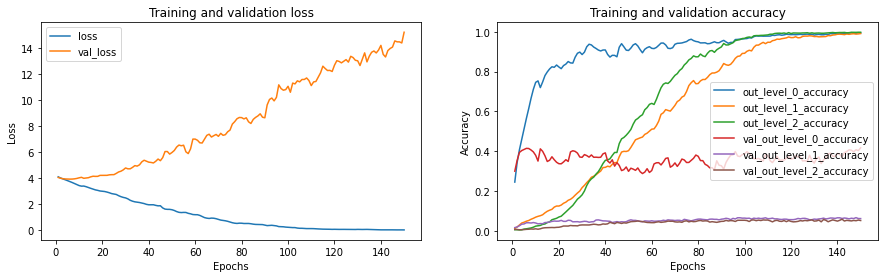

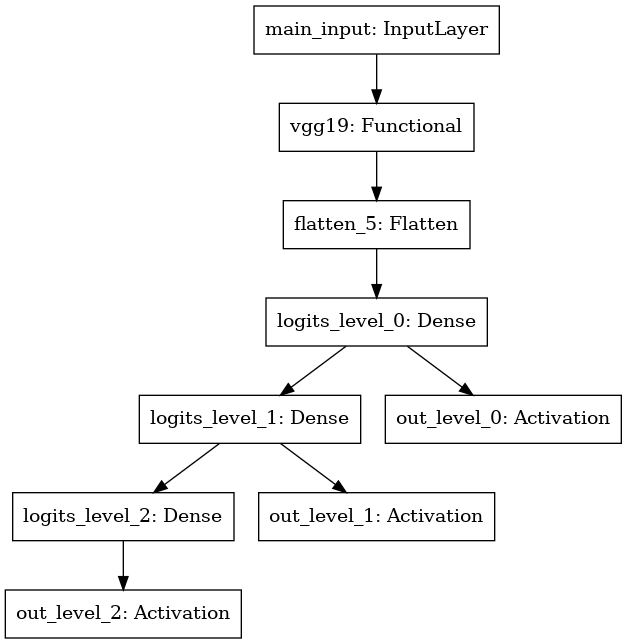

In [10]:
# Create the model
BCNN2_model = models.get_BCNN2(dataset.num_classes,
                               dataset.image_size,
                               conv_base=conv_base,
                               learning_rate=learning_rate)
BCNN2_model.summary()
#train model
history_BCNN2_model = BCNN2_model.fit(dataset.train_dataset,
                                      validation_data=dataset.val_dataset,
                                      epochs=epochs,
                                      callbacks=[performance_callback_val])
utils.learning_plots(history_BCNN2_model)
plot_model(BCNN2_model)


Model: "BCNN2_reversed_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 2048)         0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_level_2 (Dense)          (None, 196)          401604      flatten_7[0][0]                  
_______________________________________________________________________________

INFO:tensorflow:Assets written to: models/BCNN2_reversed_model_stanford_cars_vgg19/assets
Epoch 5/150
64/64 [==============================] - 27s 423ms/step - loss: 3.7389 - out_level_0_loss: 1.6674 - out_level_1_loss: 4.3502 - out_level_2_loss: 5.1992 - out_level_0_accuracy: 0.4413 - out_level_1_accuracy: 0.0663 - out_level_2_accuracy: 0.0168 - val_loss: 3.8011 - val_out_level_0_loss: 1.7677 - val_out_level_1_loss: 4.3939 - val_out_level_2_loss: 5.2416 - val_out_level_0_accuracy: 0.3858 - val_out_level_1_accuracy: 0.0639 - val_out_level_2_accuracy: 0.0209
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value

INFO:tensorflow:Assets written to: models/BCNN2_reversed_model_stanford_cars_vgg19/assets
Epoch 10/150
64/64 [==============================] - 26s 409ms/step - loss: 3.1182 - out_level_0_loss: 1.2014 - out_level_1_loss: 3.5649 - out_level_2_loss: 4.5884 - out_level_0_accuracy: 0.5968 - out_level_1_accuracy: 0.1896 - out_level_2_accuracy: 0.0844 - val_loss: 3.6031 - val_out_level_0_loss: 1.7188 - val_out_level_1_loss: 4.1007 - val_out_level_2_loss: 4.9898 - val_out_level_0_accuracy: 0.4249 - val_out_level_1_accuracy: 0.0970 - val_out_level_2_accuracy: 0.0398
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Valu

INFO:tensorflow:Assets written to: models/BCNN2_reversed_model_stanford_cars_vgg19/assets
Epoch 15/150
64/64 [==============================] - 27s 426ms/step - loss: 2.5886 - out_level_0_loss: 0.9055 - out_level_1_loss: 2.9366 - out_level_2_loss: 3.9235 - out_level_0_accuracy: 0.6847 - out_level_1_accuracy: 0.3076 - out_level_2_accuracy: 0.1779 - val_loss: 3.7095 - val_out_level_0_loss: 1.9172 - val_out_level_1_loss: 4.1959 - val_out_level_2_loss: 5.0154 - val_out_level_0_accuracy: 0.4313 - val_out_level_1_accuracy: 0.1192 - val_out_level_2_accuracy: 0.0607
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Valu

INFO:tensorflow:Assets written to: models/BCNN2_reversed_model_stanford_cars_vgg19/assets
Epoch 20/150
64/64 [==============================] - 26s 413ms/step - loss: 2.0658 - out_level_0_loss: 0.6608 - out_level_1_loss: 2.3230 - out_level_2_loss: 3.2138 - out_level_0_accuracy: 0.7792 - out_level_1_accuracy: 0.4310 - out_level_2_accuracy: 0.2916 - val_loss: 3.8254 - val_out_level_0_loss: 2.1574 - val_out_level_1_loss: 4.3078 - val_out_level_2_loss: 5.0109 - val_out_level_0_accuracy: 0.4055 - val_out_level_1_accuracy: 0.1296 - val_out_level_2_accuracy: 0.0754
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Valu

64/64 [==============================] - 27s 414ms/step - loss: 1.6876 - out_level_0_loss: 0.5814 - out_level_1_loss: 1.8606 - out_level_2_loss: 2.6208 - out_level_0_accuracy: 0.8002 - out_level_1_accuracy: 0.5314 - out_level_2_accuracy: 0.4015 - val_loss: 3.9664 - val_out_level_0_loss: 2.5521 - val_out_level_1_loss: 4.3297 - val_out_level_2_loss: 5.0174 - val_out_level_0_accuracy: 0.3577 - val_out_level_1_accuracy: 0.1361 - val_out_level_2_accuracy: 0.0731
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 1.1688 - out_level_0_loss: 0.3221 - out_level_1_loss: 1.2687 - out_level_2_loss: 1.9157 - out_level_0_accuracy: 0.8922 - out_level_1_accuracy: 0.6752 - out_level_2_accuracy: 0.5533 - val_loss: 4.3750 - val_out_level_0_loss: 2.6970 - val_out_level_1_loss: 4.9001 - val_out_level_2_loss: 5.5280 - val_out_level_0_accuracy: 0.4652 - val_out_level_1_accuracy: 0.1453 - val_out_level_2_accuracy: 0.0876
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 414ms/step - loss: 0.9407 - out_level_0_loss: 0.3167 - out_level_1_loss: 0.9947 - out_level_2_loss: 1.5107 - out_level_0_accuracy: 0.8875 - out_level_1_accuracy: 0.7328 - out_level_2_accuracy: 0.6309 - val_loss: 4.6182 - val_out_level_0_loss: 3.1126 - val_out_level_1_loss: 5.1190 - val_out_level_2_loss: 5.6229 - val_out_level_0_accuracy: 0.4510 - val_out_level_1_accuracy: 0.1351 - val_out_level_2_accuracy: 0.0841
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.7670 - out_level_0_loss: 0.3274 - out_level_1_loss: 0.7871 - out_level_2_loss: 1.1864 - out_level_0_accuracy: 0.8813 - out_level_1_accuracy: 0.7902 - out_level_2_accuracy: 0.7060 - val_loss: 5.0282 - val_out_level_0_loss: 3.6917 - val_out_level_1_loss: 5.4142 - val_out_level_2_loss: 5.9787 - val_out_level_0_accuracy: 0.3973 - val_out_level_1_accuracy: 0.1368 - val_out_level_2_accuracy: 0.0789
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.4813 - out_level_0_loss: 0.1939 - out_level_1_loss: 0.4903 - out_level_2_loss: 0.7597 - out_level_0_accuracy: 0.9322 - out_level_1_accuracy: 0.8740 - out_level_2_accuracy: 0.8131 - val_loss: 5.6849 - val_out_level_0_loss: 4.0323 - val_out_level_1_loss: 6.2725 - val_out_level_2_loss: 6.7499 - val_out_level_0_accuracy: 0.4697 - val_out_level_1_accuracy: 0.1557 - val_out_level_2_accuracy: 0.1090
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 415ms/step - loss: 0.2932 - out_level_0_loss: 0.1704 - out_level_1_loss: 0.2683 - out_level_2_loss: 0.4409 - out_level_0_accuracy: 0.9440 - out_level_1_accuracy: 0.9397 - out_level_2_accuracy: 0.8982 - val_loss: 6.0074 - val_out_level_0_loss: 4.3171 - val_out_level_1_loss: 6.5915 - val_out_level_2_loss: 7.1135 - val_out_level_0_accuracy: 0.4413 - val_out_level_1_accuracy: 0.1575 - val_out_level_2_accuracy: 0.1015
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.1504 - out_level_0_loss: 0.0670 - out_level_1_loss: 0.1503 - out_level_2_loss: 0.2339 - out_level_0_accuracy: 0.9765 - out_level_1_accuracy: 0.9676 - out_level_2_accuracy: 0.9525 - val_loss: 6.8667 - val_out_level_0_loss: 4.7257 - val_out_level_1_loss: 7.6317 - val_out_level_2_loss: 8.2426 - val_out_level_0_accuracy: 0.4644 - val_out_level_1_accuracy: 0.1662 - val_out_level_2_accuracy: 0.1109
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 415ms/step - loss: 0.1187 - out_level_0_loss: 0.0761 - out_level_1_loss: 0.1209 - out_level_2_loss: 0.1591 - out_level_0_accuracy: 0.9729 - out_level_1_accuracy: 0.9735 - out_level_2_accuracy: 0.9715 - val_loss: 7.2334 - val_out_level_0_loss: 5.0130 - val_out_level_1_loss: 8.0167 - val_out_level_2_loss: 8.6703 - val_out_level_0_accuracy: 0.4786 - val_out_level_1_accuracy: 0.1672 - val_out_level_2_accuracy: 0.1067
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 403ms/step - loss: 0.0710 - out_level_0_loss: 0.0376 - out_level_1_loss: 0.0703 - out_level_2_loss: 0.1051 - out_level_0_accuracy: 0.9870 - out_level_1_accuracy: 0.9870 - out_level_2_accuracy: 0.9828 - val_loss: 7.4284 - val_out_level_0_loss: 5.3493 - val_out_level_1_loss: 8.1680 - val_out_level_2_loss: 8.7678 - val_out_level_0_accuracy: 0.4373 - val_out_level_1_accuracy: 0.1627 - val_out_level_2_accuracy: 0.1149
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 416ms/step - loss: 0.0260 - out_level_0_loss: 0.0072 - out_level_1_loss: 0.0299 - out_level_2_loss: 0.0408 - out_level_0_accuracy: 0.9990 - out_level_1_accuracy: 0.9953 - out_level_2_accuracy: 0.9963 - val_loss: 7.8527 - val_out_level_0_loss: 5.3529 - val_out_level_1_loss: 8.7571 - val_out_level_2_loss: 9.4479 - val_out_level_0_accuracy: 0.4607 - val_out_level_1_accuracy: 0.1637 - val_out_level_2_accuracy: 0.1214
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

INFO:tensorflow:Assets written to: models/BCNN2_reversed_model_stanford_cars_vgg19/assets
Epoch 75/150
64/64 [==============================] - 26s 412ms/step - loss: 0.0116 - out_level_0_loss: 0.0018 - out_level_1_loss: 0.0080 - out_level_2_loss: 0.0249 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9996 - out_level_2_accuracy: 0.9972 - val_loss: 8.4452 - val_out_level_0_loss: 5.8138 - val_out_level_1_loss: 9.4045 - val_out_level_2_loss: 10.1175 - val_out_level_0_accuracy: 0.4831 - val_out_level_1_accuracy: 0.1741 - val_out_level_2_accuracy: 0.1142
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Val

64/64 [==============================] - 26s 411ms/step - loss: 0.0091 - out_level_0_loss: 0.0026 - out_level_1_loss: 0.0050 - out_level_2_loss: 0.0198 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9972 - val_loss: 8.6253 - val_out_level_0_loss: 5.8865 - val_out_level_1_loss: 9.6371 - val_out_level_2_loss: 10.3523 - val_out_level_0_accuracy: 0.4789 - val_out_level_1_accuracy: 0.1791 - val_out_level_2_accuracy: 0.1214
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 413ms/step - loss: 0.0088 - out_level_0_loss: 0.0017 - out_level_1_loss: 0.0051 - out_level_2_loss: 0.0195 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9972 - val_loss: 8.7671 - val_out_level_0_loss: 6.0225 - val_out_level_1_loss: 9.7919 - val_out_level_2_loss: 10.4869 - val_out_level_0_accuracy: 0.4746 - val_out_level_1_accuracy: 0.1796 - val_out_level_2_accuracy: 0.1192
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.0086 - out_level_0_loss: 0.0025 - out_level_1_loss: 0.0043 - out_level_2_loss: 0.0189 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9974 - val_loss: 8.8926 - val_out_level_0_loss: 6.1228 - val_out_level_1_loss: 9.9309 - val_out_level_2_loss: 10.6241 - val_out_level_0_accuracy: 0.4706 - val_out_level_1_accuracy: 0.1761 - val_out_level_2_accuracy: 0.1224
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 408ms/step - loss: 0.0091 - out_level_0_loss: 0.0020 - out_level_1_loss: 0.0044 - out_level_2_loss: 0.0208 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9972 - val_loss: 8.8796 - val_out_level_0_loss: 6.0793 - val_out_level_1_loss: 9.9429 - val_out_level_2_loss: 10.6165 - val_out_level_0_accuracy: 0.4726 - val_out_level_1_accuracy: 0.1706 - val_out_level_2_accuracy: 0.1201
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 403ms/step - loss: 0.0090 - out_level_0_loss: 0.0039 - out_level_1_loss: 0.0044 - out_level_2_loss: 0.0189 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.0736 - val_out_level_0_loss: 6.3044 - val_out_level_1_loss: 10.1198 - val_out_level_2_loss: 10.7967 - val_out_level_0_accuracy: 0.4575 - val_out_level_1_accuracy: 0.1662 - val_out_level_2_accuracy: 0.1192
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

64/64 [==============================] - 26s 412ms/step - loss: 0.0179 - out_level_0_loss: 0.0137 - out_level_1_loss: 0.0137 - out_level_2_loss: 0.0263 - out_level_0_accuracy: 0.9966 - out_level_1_accuracy: 0.9982 - out_level_2_accuracy: 0.9966 - val_loss: 7.8936 - val_out_level_0_loss: 5.3714 - val_out_level_1_loss: 8.8513 - val_out_level_2_loss: 9.4580 - val_out_level_0_accuracy: 0.4672 - val_out_level_1_accuracy: 0.1714 - val_out_level_2_accuracy: 0.1162
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0270 - out_level_0_loss: 0.0316 - out_level_1_loss: 0.0193 - out_level_2_loss: 0.0301 - out_level_0_accuracy: 0.9912 - out_level_1_accuracy: 0.9959 - out_level_2_accuracy: 0.9950 - val_loss: 7.9565 - val_out_level_0_loss: 5.4945 - val_out_level_1_loss: 8.8941 - val_out_level_2_loss: 9.4810 - val_out_level_0_accuracy: 0.4843 - val_out_level_1_accuracy: 0.1709 - val_out_level_2_accuracy: 0.1179
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 414ms/step - loss: 0.0113 - out_level_0_loss: 0.0093 - out_level_1_loss: 0.0085 - out_level_2_loss: 0.0160 - out_level_0_accuracy: 0.9969 - out_level_1_accuracy: 0.9988 - out_level_2_accuracy: 0.9973 - val_loss: 8.6911 - val_out_level_0_loss: 6.1548 - val_out_level_1_loss: 9.6000 - val_out_level_2_loss: 10.3186 - val_out_level_0_accuracy: 0.4440 - val_out_level_1_accuracy: 0.1624 - val_out_level_2_accuracy: 0.1147
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 412ms/step - loss: 0.0079 - out_level_0_loss: 0.0055 - out_level_1_loss: 0.0064 - out_level_2_loss: 0.0117 - out_level_0_accuracy: 0.9988 - out_level_1_accuracy: 0.9990 - out_level_2_accuracy: 0.9989 - val_loss: 8.6780 - val_out_level_0_loss: 6.1231 - val_out_level_1_loss: 9.6528 - val_out_level_2_loss: 10.2582 - val_out_level_0_accuracy: 0.4716 - val_out_level_1_accuracy: 0.1679 - val_out_level_2_accuracy: 0.1244
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 27s 415ms/step - loss: 0.0081 - out_level_0_loss: 0.0053 - out_level_1_loss: 0.0072 - out_level_2_loss: 0.0118 - out_level_0_accuracy: 0.9986 - out_level_1_accuracy: 0.9988 - out_level_2_accuracy: 0.9979 - val_loss: 9.0866 - val_out_level_0_loss: 6.4831 - val_out_level_1_loss: 10.0791 - val_out_level_2_loss: 10.6977 - val_out_level_0_accuracy: 0.4652 - val_out_level_1_accuracy: 0.1699 - val_out_level_2_accuracy: 0.1194
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0105 - out_level_0_loss: 0.0053 - out_level_1_loss: 0.0086 - out_level_2_loss: 0.0176 - out_level_0_accuracy: 0.9980 - out_level_1_accuracy: 0.9991 - out_level_2_accuracy: 0.9975 - val_loss: 8.5940 - val_out_level_0_loss: 6.1783 - val_out_level_1_loss: 9.5061 - val_out_level_2_loss: 10.0975 - val_out_level_0_accuracy: 0.4891 - val_out_level_1_accuracy: 0.1699 - val_out_level_2_accuracy: 0.1172
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0125 - out_level_0_loss: 0.0078 - out_level_1_loss: 0.0118 - out_level_2_loss: 0.0180 - out_level_0_accuracy: 0.9971 - out_level_1_accuracy: 0.9972 - out_level_2_accuracy: 0.9966 - val_loss: 8.4297 - val_out_level_0_loss: 6.0109 - val_out_level_1_loss: 9.2958 - val_out_level_2_loss: 9.9825 - val_out_level_0_accuracy: 0.4878 - val_out_level_1_accuracy: 0.1714 - val_out_level_2_accuracy: 0.1147
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 26s 413ms/step - loss: 0.0098 - out_level_0_loss: 0.0059 - out_level_1_loss: 0.0113 - out_level_2_loss: 0.0121 - out_level_0_accuracy: 0.9977 - out_level_1_accuracy: 0.9982 - out_level_2_accuracy: 0.9982 - val_loss: 8.7962 - val_out_level_0_loss: 6.4351 - val_out_level_1_loss: 9.6693 - val_out_level_2_loss: 10.2843 - val_out_level_0_accuracy: 0.4590 - val_out_level_1_accuracy: 0.1694 - val_out_level_2_accuracy: 0.1169
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 402ms/step - loss: 0.0098 - out_level_0_loss: 0.0054 - out_level_1_loss: 0.0098 - out_level_2_loss: 0.0142 - out_level_0_accuracy: 0.9983 - out_level_1_accuracy: 0.9980 - out_level_2_accuracy: 0.9979 - val_loss: 8.6261 - val_out_level_0_loss: 6.3485 - val_out_level_1_loss: 9.4745 - val_out_level_2_loss: 10.0552 - val_out_level_0_accuracy: 0.4567 - val_out_level_1_accuracy: 0.1751 - val_out_level_2_accuracy: 0.1192
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

64/64 [==============================] - 26s 403ms/step - loss: 0.0115 - out_level_0_loss: 0.0093 - out_level_1_loss: 0.0128 - out_level_2_loss: 0.0124 - out_level_0_accuracy: 0.9964 - out_level_1_accuracy: 0.9971 - out_level_2_accuracy: 0.9978 - val_loss: 8.8687 - val_out_level_0_loss: 6.2091 - val_out_level_1_loss: 9.8444 - val_out_level_2_loss: 10.5527 - val_out_level_0_accuracy: 0.4786 - val_out_level_1_accuracy: 0.1706 - val_out_level_2_accuracy: 0.1172
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

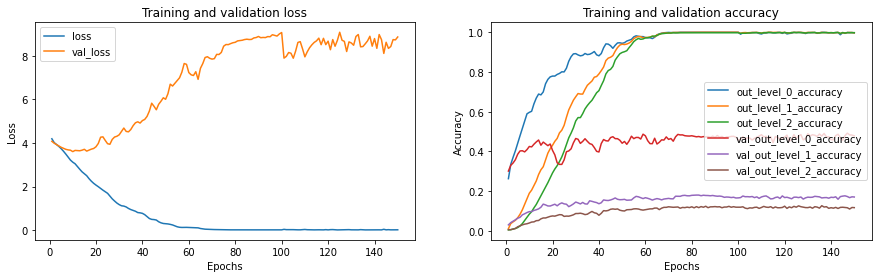

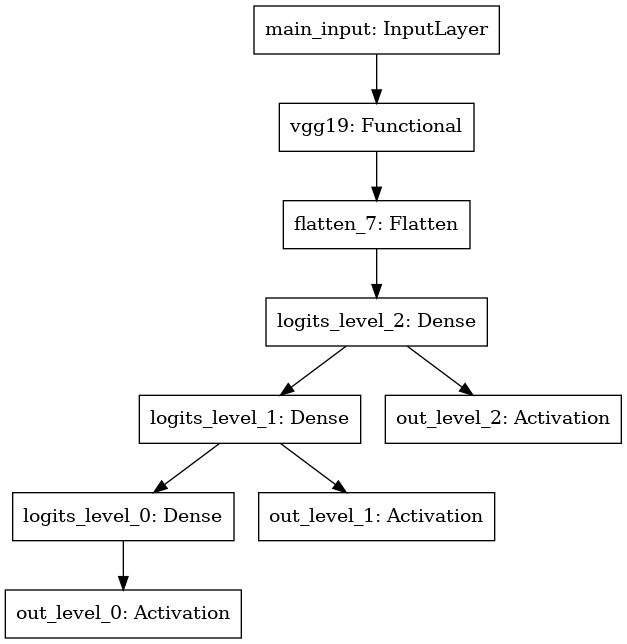

In [12]:
# Create the model
BCNN2_reversed_model = models.get_BCNN2(dataset.num_classes,
                                        dataset.image_size,
                                        reverse=True,
                                        conv_base=conv_base,
                                        learning_rate=learning_rate)
BCNN2_reversed_model.summary()
#train model
history_BCNN2_reversed_model = BCNN2_reversed_model.fit(dataset.train_dataset,
                                                        validation_data=dataset.val_dataset,
                                                        epochs=epochs,
                                                        callbacks=[performance_callback_val])
utils.learning_plots(history_BCNN2_reversed_model)
plot_model(BCNN2_reversed_model)


Model: "MLPH_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, None, None,  17664576    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_8 (Flatten)             (None, 8192)         0           model[0][0]                      
__________________________________________________________________________________________________
flatten_9 (Flatten)             (None, 8192)         0           model[0][1]                      
_________________________________________________________________________________________

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 406ms/step - loss: 3.9348 - out_level_0_loss: 2.0012 - out_level_1_loss: 4.5464 - out_level_2_loss: 5.2568 - out_level_0_accuracy: 0.3238 - out_level_1_accuracy: 0.0456 - out_level_2_accuracy: 0.0092 - val_loss: 3.9453 - val_out_level_0_loss: 1.9980 - val_out_level_1_loss: 4.5440 - val_out_level_2_loss: 5.2940 - val_out_level_0_accuracy: 0.3249 - val_out_level_1_accuracy: 0.0483 - val_out_level_2_accuracy: 0.0090
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 410ms/step - loss: 3.6384 - out_level_0_loss: 1.7121 - out_level_1_loss: 4.2035 - out_level_2_loss: 4.9996 - out_level_0_accuracy: 0.4234 - out_level_1_accuracy: 0.0836 - out_level_2_accuracy: 0.0303 - val_loss: 3.8430 - val_out_level_0_loss: 1.8746 - val_out_level_1_loss: 4.4222 - val_out_level_2_loss: 5.2322 - val_out_level_0_accuracy: 0.3699 - val_out_level_1_accuracy: 0.0597 - val_out_level_2_accuracy: 0.0224
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 414ms/step - loss: 3.3835 - out_level_0_loss: 1.5288 - out_level_1_loss: 3.9135 - out_level_2_loss: 4.7081 - out_level_0_accuracy: 0.4844 - out_level_1_accuracy: 0.1211 - out_level_2_accuracy: 0.0599 - val_loss: 3.8359 - val_out_level_0_loss: 1.8637 - val_out_level_1_loss: 4.4153 - val_out_level_2_loss: 5.2287 - val_out_level_0_accuracy: 0.3806 - val_out_level_1_accuracy: 0.0682 - val_out_level_2_accuracy: 0.0284
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 410ms/step - loss: 2.6418 - out_level_0_loss: 1.0701 - out_level_1_loss: 3.0663 - out_level_2_loss: 3.7890 - out_level_0_accuracy: 0.6482 - out_level_1_accuracy: 0.2703 - out_level_2_accuracy: 0.1847 - val_loss: 4.0984 - val_out_level_0_loss: 2.0645 - val_out_level_1_loss: 4.7087 - val_out_level_2_loss: 5.5219 - val_out_level_0_accuracy: 0.3789 - val_out_level_1_accuracy: 0.0761 - val_out_level_2_accuracy: 0.0353
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 10/150
64/64 [==============================] - 26s 406ms/step - loss: 1.8608 - out_level_0_loss: 0.6975 - out_level_1_loss: 2.1472 - out_level_2_loss: 2.7377 - out_level_0_accuracy: 0.7725 - out_level_1_accuracy: 0.4686 - out_level_2_accuracy: 0.3741 - val_loss: 4.4889 - val_out_level_0_loss: 2.3154 - val_out_level_1_loss: 5.1655 - val_out_level_2_loss: 5.9858 - val_out_level_0_accuracy: 0.3726 - val_out_level_1_accuracy: 0.0741 - val_out_level_2_accuracy: 0.0378
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 411ms/step - loss: 1.4779 - out_level_0_loss: 0.6145 - out_level_1_loss: 1.6688 - out_level_2_loss: 2.1504 - out_level_0_accuracy: 0.7836 - out_level_1_accuracy: 0.5696 - out_level_2_accuracy: 0.4849 - val_loss: 5.0987 - val_out_level_0_loss: 2.7212 - val_out_level_1_loss: 5.8051 - val_out_level_2_loss: 6.7697 - val_out_level_0_accuracy: 0.3903 - val_out_level_1_accuracy: 0.0813 - val_out_level_2_accuracy: 0.0443
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 411ms/step - loss: 1.2658 - out_level_0_loss: 0.5593 - out_level_1_loss: 1.4179 - out_level_2_loss: 1.8203 - out_level_0_accuracy: 0.8075 - out_level_1_accuracy: 0.6240 - out_level_2_accuracy: 0.5604 - val_loss: 5.4875 - val_out_level_0_loss: 3.0477 - val_out_level_1_loss: 6.2490 - val_out_level_2_loss: 7.1658 - val_out_level_0_accuracy: 0.3600 - val_out_level_1_accuracy: 0.0736 - val_out_level_2_accuracy: 0.0420
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 406ms/step - loss: 0.6500 - out_level_0_loss: 0.3052 - out_level_1_loss: 0.7059 - out_level_2_loss: 0.9389 - out_level_0_accuracy: 0.8921 - out_level_1_accuracy: 0.8057 - out_level_2_accuracy: 0.7582 - val_loss: 6.3954 - val_out_level_0_loss: 3.4861 - val_out_level_1_loss: 7.3063 - val_out_level_2_loss: 8.3937 - val_out_level_0_accuracy: 0.3721 - val_out_level_1_accuracy: 0.0826 - val_out_level_2_accuracy: 0.0425
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------------

64/64 [==============================] - 27s 416ms/step - loss: 0.1876 - out_level_0_loss: 0.1225 - out_level_1_loss: 0.1948 - out_level_2_loss: 0.2455 - out_level_0_accuracy: 0.9565 - out_level_1_accuracy: 0.9455 - out_level_2_accuracy: 0.9339 - val_loss: 8.1993 - val_out_level_0_loss: 4.7486 - val_out_level_1_loss: 9.2293 - val_out_level_2_loss: 10.6198 - val_out_level_0_accuracy: 0.3612 - val_out_level_1_accuracy: 0.0878 - val_out_level_2_accuracy: 0.0475
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 411ms/step - loss: 0.1118 - out_level_0_loss: 0.0856 - out_level_1_loss: 0.1162 - out_level_2_loss: 0.1336 - out_level_0_accuracy: 0.9708 - out_level_1_accuracy: 0.9680 - out_level_2_accuracy: 0.9687 - val_loss: 9.4769 - val_out_level_0_loss: 5.4680 - val_out_level_1_loss: 10.6941 - val_out_level_2_loss: 12.2686 - val_out_level_0_accuracy: 0.3816 - val_out_level_1_accuracy: 0.0891 - val_out_level_2_accuracy: 0.0448
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 411ms/step - loss: 0.0738 - out_level_0_loss: 0.0718 - out_level_1_loss: 0.0705 - out_level_2_loss: 0.0791 - out_level_0_accuracy: 0.9745 - out_level_1_accuracy: 0.9811 - out_level_2_accuracy: 0.9811 - val_loss: 10.2721 - val_out_level_0_loss: 5.7333 - val_out_level_1_loss: 11.6413 - val_out_level_2_loss: 13.4418 - val_out_level_0_accuracy: 0.3821 - val_out_level_1_accuracy: 0.0863 - val_out_level_2_accuracy: 0.0505
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 405ms/step - loss: 0.0474 - out_level_0_loss: 0.0438 - out_level_1_loss: 0.0455 - out_level_2_loss: 0.0529 - out_level_0_accuracy: 0.9847 - out_level_1_accuracy: 0.9897 - out_level_2_accuracy: 0.9888 - val_loss: 10.5702 - val_out_level_0_loss: 5.8771 - val_out_level_1_loss: 11.9633 - val_out_level_2_loss: 13.8702 - val_out_level_0_accuracy: 0.3831 - val_out_level_1_accuracy: 0.0945 - val_out_level_2_accuracy: 0.0542
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 407ms/step - loss: 0.0145 - out_level_0_loss: 0.0047 - out_level_1_loss: 0.0073 - out_level_2_loss: 0.0314 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9998 - out_level_2_accuracy: 0.9969 - val_loss: 11.3558 - val_out_level_0_loss: 6.2204 - val_out_level_1_loss: 12.9184 - val_out_level_2_loss: 14.9285 - val_out_level_0_accuracy: 0.3796 - val_out_level_1_accuracy: 0.0905 - val_out_level_2_accuracy: 0.0545
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 409ms/step - loss: 0.0121 - out_level_0_loss: 0.0023 - out_level_1_loss: 0.0044 - out_level_2_loss: 0.0296 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 11.4673 - val_out_level_0_loss: 6.2205 - val_out_level_1_loss: 13.0634 - val_out_level_2_loss: 15.1178 - val_out_level_0_accuracy: 0.3838 - val_out_level_1_accuracy: 0.0943 - val_out_level_2_accuracy: 0.0527
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 408ms/step - loss: 0.0071 - out_level_0_loss: 0.0013 - out_level_1_loss: 0.0014 - out_level_2_loss: 0.0186 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 10.3359 - val_out_level_0_loss: 5.6211 - val_out_level_1_loss: 11.7579 - val_out_level_2_loss: 13.6287 - val_out_level_0_accuracy: 0.3888 - val_out_level_1_accuracy: 0.0955 - val_out_level_2_accuracy: 0.0545
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 400ms/step - loss: 0.0068 - out_level_0_loss: 0.0010 - out_level_1_loss: 0.0029 - out_level_2_loss: 0.0166 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.9497 - val_out_level_0_loss: 5.4182 - val_out_level_1_loss: 11.3011 - val_out_level_2_loss: 13.1300 - val_out_level_0_accuracy: 0.3943 - val_out_level_1_accuracy: 0.0953 - val_out_level_2_accuracy: 0.0542
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0059 - out_level_0_loss: 8.1922e-04 - out_level_1_loss: 0.0013 - out_level_2_loss: 0.0157 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.9619 - val_out_level_0_loss: 5.4297 - val_out_level_1_loss: 11.3186 - val_out_level_2_loss: 13.1374 - val_out_level_0_accuracy: 0.3925 - val_out_level_1_accuracy: 0.0953 - val_out_level_2_accuracy: 0.0525
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0059 - out_level_0_loss: 0.0012 - out_level_1_loss: 0.0014 - out_level_2_loss: 0.0152 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.8361 - val_out_level_0_loss: 5.3588 - val_out_level_1_loss: 11.1707 - val_out_level_2_loss: 12.9788 - val_out_level_0_accuracy: 0.3938 - val_out_level_1_accuracy: 0.0955 - val_out_level_2_accuracy: 0.0540
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0055 - out_level_0_loss: 7.7285e-04 - out_level_1_loss: 0.0011 - out_level_2_loss: 0.0147 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.8707 - val_out_level_0_loss: 5.3819 - val_out_level_1_loss: 11.2198 - val_out_level_2_loss: 13.0105 - val_out_level_0_accuracy: 0.3960 - val_out_level_1_accuracy: 0.0958 - val_out_level_2_accuracy: 0.0557
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

64/64 [==============================] - 26s 403ms/step - loss: 0.0054 - out_level_0_loss: 9.4453e-04 - out_level_1_loss: 0.0010 - out_level_2_loss: 0.0141 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.7948 - val_out_level_0_loss: 5.3526 - val_out_level_1_loss: 11.1054 - val_out_level_2_loss: 12.9265 - val_out_level_0_accuracy: 0.3913 - val_out_level_1_accuracy: 0.0933 - val_out_level_2_accuracy: 0.0540
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0054 - out_level_0_loss: 6.7420e-04 - out_level_1_loss: 0.0016 - out_level_2_loss: 0.0139 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.7463 - val_out_level_0_loss: 5.3277 - val_out_level_1_loss: 11.0716 - val_out_level_2_loss: 12.8396 - val_out_level_0_accuracy: 0.3955 - val_out_level_1_accuracy: 0.0950 - val_out_level_2_accuracy: 0.0572
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 408ms/step - loss: 0.0052 - out_level_0_loss: 8.2753e-04 - out_level_1_loss: 0.0011 - out_level_2_loss: 0.0135 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.8588 - val_out_level_0_loss: 5.3956 - val_out_level_1_loss: 11.1769 - val_out_level_2_loss: 13.0039 - val_out_level_0_accuracy: 0.3925 - val_out_level_1_accuracy: 0.0915 - val_out_level_2_accuracy: 0.0527
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 410ms/step - loss: 0.0052 - out_level_0_loss: 7.0873e-04 - out_level_1_loss: 0.0011 - out_level_2_loss: 0.0138 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.8628 - val_out_level_0_loss: 5.3987 - val_out_level_1_loss: 11.1797 - val_out_level_2_loss: 13.0099 - val_out_level_0_accuracy: 0.3965 - val_out_level_1_accuracy: 0.0908 - val_out_level_2_accuracy: 0.0515
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0049 - out_level_0_loss: 6.8586e-04 - out_level_1_loss: 0.0012 - out_level_2_loss: 0.0130 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 9.8869 - val_out_level_0_loss: 5.4064 - val_out_level_1_loss: 11.2357 - val_out_level_2_loss: 13.0186 - val_out_level_0_accuracy: 0.3935 - val_out_level_1_accuracy: 0.0938 - val_out_level_2_accuracy: 0.0562
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0045 - out_level_0_loss: 6.6925e-04 - out_level_1_loss: 9.0365e-04 - out_level_2_loss: 0.0119 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 10.1170 - val_out_level_0_loss: 5.5577 - val_out_level_1_loss: 11.4531 - val_out_level_2_loss: 13.3401 - val_out_level_0_accuracy: 0.3948 - val_out_level_1_accuracy: 0.0935 - val_out_level_2_accuracy: 0.0537
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 410ms/step - loss: 0.0046 - out_level_0_loss: 6.8807e-04 - out_level_1_loss: 0.0010 - out_level_2_loss: 0.0121 - out_level_0_accuracy: 0.9999 - out_level_1_accuracy: 0.9999 - out_level_2_accuracy: 0.9973 - val_loss: 10.2748 - val_out_level_0_loss: 5.6419 - val_out_level_1_loss: 11.6508 - val_out_level_2_loss: 13.5316 - val_out_level_0_accuracy: 0.3980 - val_out_level_1_accuracy: 0.0960 - val_out_level_2_accuracy: 0.0520
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+------------------

64/64 [==============================] - 26s 405ms/step - loss: 0.1061 - out_level_0_loss: 0.0786 - out_level_1_loss: 0.1178 - out_level_2_loss: 0.1218 - out_level_0_accuracy: 0.9737 - out_level_1_accuracy: 0.9640 - out_level_2_accuracy: 0.9657 - val_loss: 8.8354 - val_out_level_0_loss: 4.9783 - val_out_level_1_loss: 10.0258 - val_out_level_2_loss: 11.5020 - val_out_level_0_accuracy: 0.3659 - val_out_level_1_accuracy: 0.0980 - val_out_level_2_accuracy: 0.0535
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

64/64 [==============================] - 26s 405ms/step - loss: 0.0219 - out_level_0_loss: 0.0173 - out_level_1_loss: 0.0191 - out_level_2_loss: 0.0293 - out_level_0_accuracy: 0.9944 - out_level_1_accuracy: 0.9946 - out_level_2_accuracy: 0.9930 - val_loss: 9.5121 - val_out_level_0_loss: 5.2406 - val_out_level_1_loss: 10.8424 - val_out_level_2_loss: 12.4532 - val_out_level_0_accuracy: 0.3843 - val_out_level_1_accuracy: 0.0953 - val_out_level_2_accuracy: 0.0592
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+-----------------------

64/64 [==============================] - 27s 417ms/step - loss: 0.0108 - out_level_0_loss: 0.0085 - out_level_1_loss: 0.0117 - out_level_2_loss: 0.0122 - out_level_0_accuracy: 0.9978 - out_level_1_accuracy: 0.9969 - out_level_2_accuracy: 0.9972 - val_loss: 10.9741 - val_out_level_0_loss: 6.2090 - val_out_level_1_loss: 12.4275 - val_out_level_2_loss: 14.2858 - val_out_level_0_accuracy: 0.3968 - val_out_level_1_accuracy: 0.1017 - val_out_level_2_accuracy: 0.0592
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 411ms/step - loss: 0.0062 - out_level_0_loss: 0.0025 - out_level_1_loss: 0.0053 - out_level_2_loss: 0.0108 - out_level_0_accuracy: 0.9995 - out_level_1_accuracy: 0.9989 - out_level_2_accuracy: 0.9972 - val_loss: 11.2369 - val_out_level_0_loss: 6.1022 - val_out_level_1_loss: 12.8462 - val_out_level_2_loss: 14.7621 - val_out_level_0_accuracy: 0.4030 - val_out_level_1_accuracy: 0.1040 - val_out_level_2_accuracy: 0.0627
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.0063 - out_level_0_loss: 0.0030 - out_level_1_loss: 0.0055 - out_level_2_loss: 0.0104 - out_level_0_accuracy: 0.9990 - out_level_1_accuracy: 0.9985 - out_level_2_accuracy: 0.9974 - val_loss: 11.8744 - val_out_level_0_loss: 6.6416 - val_out_level_1_loss: 13.4425 - val_out_level_2_loss: 15.5392 - val_out_level_0_accuracy: 0.3945 - val_out_level_1_accuracy: 0.0968 - val_out_level_2_accuracy: 0.0557
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0078 - out_level_0_loss: 0.0079 - out_level_1_loss: 0.0066 - out_level_2_loss: 0.0089 - out_level_0_accuracy: 0.9978 - out_level_1_accuracy: 0.9983 - out_level_2_accuracy: 0.9975 - val_loss: 10.5799 - val_out_level_0_loss: 5.7410 - val_out_level_1_loss: 12.0736 - val_out_level_2_loss: 13.9250 - val_out_level_0_accuracy: 0.3816 - val_out_level_1_accuracy: 0.0968 - val_out_level_2_accuracy: 0.0592
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


64/64 [==============================] - 26s 406ms/step - loss: 0.0062 - out_level_0_loss: 0.0041 - out_level_1_loss: 0.0067 - out_level_2_loss: 0.0077 - out_level_0_accuracy: 0.9986 - out_level_1_accuracy: 0.9989 - out_level_2_accuracy: 0.9983 - val_loss: 11.1470 - val_out_level_0_loss: 6.1206 - val_out_level_1_loss: 12.6954 - val_out_level_2_loss: 14.6250 - val_out_level_0_accuracy: 0.3973 - val_out_level_1_accuracy: 0.1035 - val_out_level_2_accuracy: 0.0545
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 27s 416ms/step - loss: 0.0054 - out_level_0_loss: 0.0019 - out_level_1_loss: 0.0038 - out_level_2_loss: 0.0106 - out_level_0_accuracy: 0.9998 - out_level_1_accuracy: 0.9989 - out_level_2_accuracy: 0.9974 - val_loss: 11.6535 - val_out_level_0_loss: 6.4062 - val_out_level_1_loss: 13.2616 - val_out_level_2_loss: 15.2928 - val_out_level_0_accuracy: 0.3933 - val_out_level_1_accuracy: 0.1042 - val_out_level_2_accuracy: 0.0590
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 402ms/step - loss: 0.0051 - out_level_0_loss: 0.0031 - out_level_1_loss: 0.0036 - out_level_2_loss: 0.0086 - out_level_0_accuracy: 0.9990 - out_level_1_accuracy: 0.9995 - out_level_2_accuracy: 0.9978 - val_loss: 11.7222 - val_out_level_0_loss: 6.4321 - val_out_level_1_loss: 13.2736 - val_out_level_2_loss: 15.4609 - val_out_level_0_accuracy: 0.3796 - val_out_level_1_accuracy: 0.0970 - val_out_level_2_accuracy: 0.0560
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 405ms/step - loss: 0.0079 - out_level_0_loss: 0.0053 - out_level_1_loss: 0.0053 - out_level_2_loss: 0.0131 - out_level_0_accuracy: 0.9984 - out_level_1_accuracy: 0.9988 - out_level_2_accuracy: 0.9969 - val_loss: 11.1172 - val_out_level_0_loss: 6.1493 - val_out_level_1_loss: 12.5327 - val_out_level_2_loss: 14.6695 - val_out_level_0_accuracy: 0.4010 - val_out_level_1_accuracy: 0.1092 - val_out_level_2_accuracy: 0.0622
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 402ms/step - loss: 0.0080 - out_level_0_loss: 0.0051 - out_level_1_loss: 0.0056 - out_level_2_loss: 0.0133 - out_level_0_accuracy: 0.9982 - out_level_1_accuracy: 0.9990 - out_level_2_accuracy: 0.9966 - val_loss: 11.0581 - val_out_level_0_loss: 6.2306 - val_out_level_1_loss: 12.3917 - val_out_level_2_loss: 14.5520 - val_out_level_0_accuracy: 0.4085 - val_out_level_1_accuracy: 0.1037 - val_out_level_2_accuracy: 0.0572
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 402ms/step - loss: 0.0066 - out_level_0_loss: 0.0049 - out_level_1_loss: 0.0055 - out_level_2_loss: 0.0094 - out_level_0_accuracy: 0.9985 - out_level_1_accuracy: 0.9986 - out_level_2_accuracy: 0.9973 - val_loss: 11.3761 - val_out_level_0_loss: 6.4143 - val_out_level_1_loss: 12.8583 - val_out_level_2_loss: 14.8557 - val_out_level_0_accuracy: 0.4005 - val_out_level_1_accuracy: 0.0993 - val_out_level_2_accuracy: 0.0582
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

64/64 [==============================] - 26s 401ms/step - loss: 0.0057 - out_level_0_loss: 0.0032 - out_level_1_loss: 0.0056 - out_level_2_loss: 0.0083 - out_level_0_accuracy: 0.9990 - out_level_1_accuracy: 0.9979 - out_level_2_accuracy: 0.9977 - val_loss: 10.8725 - val_out_level_0_loss: 6.0858 - val_out_level_1_loss: 12.3402 - val_out_level_2_loss: 14.1916 - val_out_level_0_accuracy: 0.4095 - val_out_level_1_accuracy: 0.0945 - val_out_level_2_accuracy: 0.0622
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+----------------------

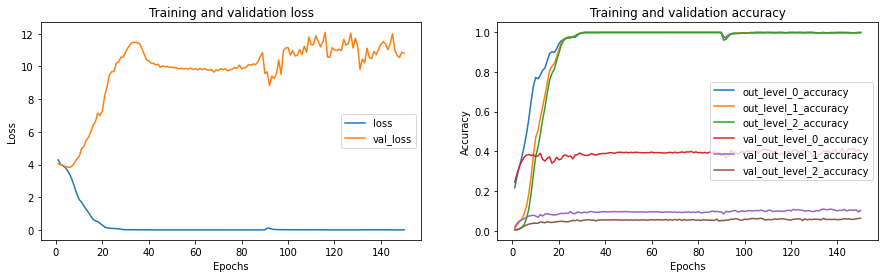

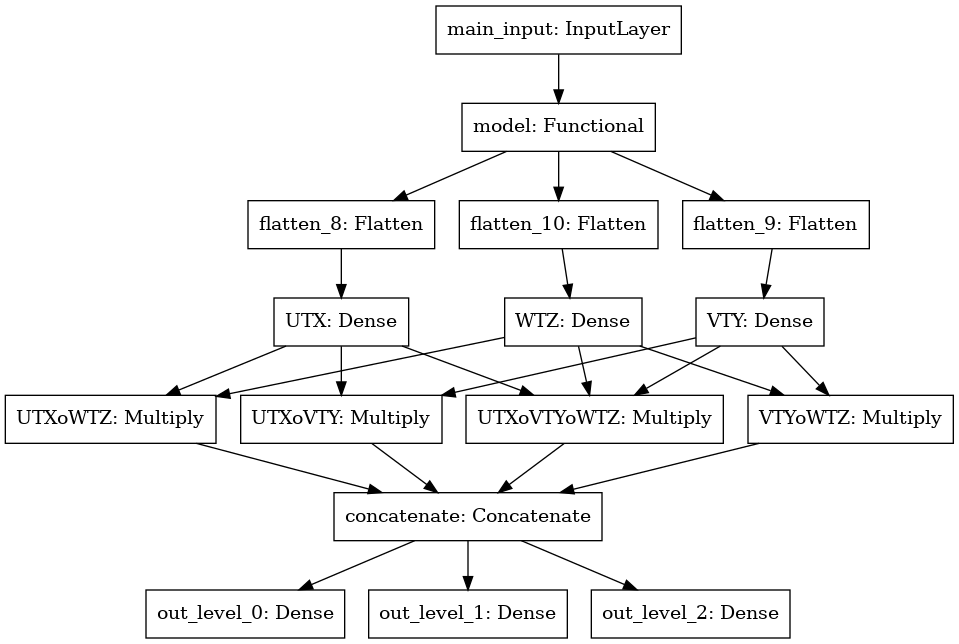

In [13]:
# Create the model
MLPH_model = models.get_MLPH_model(dataset.num_classes,
                                   dataset.image_size,
                                   learning_rate=learning_rate)
MLPH_model.summary()
#train model
history_MLPH_model = MLPH_model.fit(dataset.train_dataset,
                                    validation_data=dataset.val_dataset,
                                    epochs=epochs,
                                    callbacks=[performance_callback_val])
utils.learning_plots(history_MLPH_model)
plot_model(MLPH_model, show_shapes=False, expand_nested=False)


In [ ]:
# Create the model
baseline_model = models.get_Baseline_model(dataset.num_classes,
                                           dataset.image_size,
                                           dataset.taxonomy,
                                           conv_base=conv_base,
                                           learning_rate=learning_rate)
baseline_model.summary()
#train model
history_baseline_model = baseline_model.fit(dataset.get_pipeline(dataset.train_labels_df, 'last_level'),
                                            validation_data=dataset.get_pipeline(dataset.val_labels_df,
                                                                                 'last_level'),
                                            epochs=epochs,
                                            callbacks=[performance_callback_val])
utils.learning_plots(history_baseline_model)
plot_model(baseline_model)


Model: "mcnn_bottom_up_model"
______________________________________________________________________________________________________________
Layer (type)                                     Output Shape                                Param #          
main_input (InputLayer)                          [(None, 64, 64, 3)]                         0                
______________________________________________________________________________________________________________
vgg19 (Functional)                               (None, None, None, 512)                     20024384         
______________________________________________________________________________________________________________
flatten_19 (Flatten)                             (None, 2048)                                0                
______________________________________________________________________________________________________________
masked__output_4 (Masked_Output)                 [(None, 13), (None, 113), (None, 

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0000 |       Consistency        | 0.0040 |            -             |   -    |
|       h-Precision        | 0.0959 |         h-Recall         | 0.1666 |        h-F1-Score        | 0.1212 |
|       Accuracy L_0       | 0.2631 |       Accuracy L_1       | 0.0269 |       Accuracy L_2       | 0.0169 |
|  HarmonicM Accuracy-k=1  | 0.0300 |  HarmonicM Accuracy-k=2  | 0.0557 |  HarmonicM Accuracy-k=5  | 0.1116 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0052 |       Consistency        | 0.1256 |            -             |   -    |
|       h-Precision        | 0.1287 |         h-Recall         | 0.1951 |        h-F1-Score        | 0.1533 |
|       Accuracy L_0       | 0.3129 |       Accuracy L_1       | 0.0515 |       Accuracy L_2       | 0.0291 |
|  HarmonicM Accuracy-k=1  | 0

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0182 |       Consistency        | 0.3218 |            -             |   -    |
|       h-Precision        | 0.1541 |         h-Recall         | 0.2053 |        h-F1-Score        | 0.1738 |
|       Accuracy L_0       | 0.3641 |       Accuracy L_1       | 0.0694 |       Accuracy L_2       | 0.0463 |
|  HarmonicM Accuracy-k=1  | 0

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0284 |       Consistency        | 0.3992 |            -             |   -    |
|       h-Precision        | 0.1691 |         h-Recall         | 0.2182 |        h-F1-Score        | 0.1878 |
|       Accuracy L_0       | 0.3748 |       Accuracy L_1       | 0.0910 |       Accuracy L_2       | 0.0565 |
|  HarmonicM Accuracy-k=1  | 0

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0468 |       Consistency        | 0.4902 |            -             |   -    |
|       h-Precision        | 0.1883 |         h-Recall         | 0.2296 |        h-F1-Score        | 0.2042 |
|       Accuracy L_0       | 0.4016 |       Accuracy L_1       | 0.1129 |       Accuracy L_2       | 0.0719 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0487 |       Consistency        | 0.5394 |            -             |   -    |
|       h-Precision        | 0.1853 |         h-Recall         | 0.2219 |        h-F1-Score        | 0.1994 |
|       Accuracy L_0       | 0.4016 |       Accuracy L_1       | 0.1062 |       Accuracy L_2       | 0.0694 |
|  HarmonicM Accuracy-k=1  | 0.1140 |  HarmonicM Accuracy-k=2  | 0.1835 |  HarmonicM Accuracy-k=5  | 0.3182 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0537 |       Consistency        | 0.6115 |            -             |   -    |
|       h-Precision        | 0.1812 |         h-Recall         | 0.2126 |        h-F1-Score        | 0.1933 |
|       Accuracy L_0       | 0.3835 |       Accuracy L_1       | 0.1084 |       Accuracy L_2       | 0.0734 |
|  HarmonicM Accuracy-k=1  | 0.1178 |  HarmonicM Accuracy-k=2  | 0.1937 |  HarmonicM Accuracy-k=5  | 0.3372 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0691 |       Consistency        | 0.6304 |            -             |   -    |
|       h-Precision        | 0.1953 |         h-Recall         | 0.2253 |        h-F1-Score        | 0.2069 |
|       Accuracy L_0       | 0.3999 |       Accuracy L_1       | 0.1241 |       Accuracy L_2       | 0.0851 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0667 |       Consistency        | 0.6038 |            -             |   -    |
|       h-Precision        | 0.1972 |         h-Recall         | 0.2306 |        h-F1-Score        | 0.2101 |
|       Accuracy L_0       | 0.3974 |       Accuracy L_1       | 0.1263 |       Accuracy L_2       | 0.0865 |
|  HarmonicM Accuracy-k=1  | 0.1364 |  HarmonicM Accuracy-k=2  | 0.2176 |  HarmonicM Accuracy-k=5  | 0.3623 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0836 |       Consistency        | 0.7123 |            -             |   -    |
|       h-Precision        | 0.2053 |         h-Recall         | 0.2296 |        h-F1-Score        | 0.2147 |
|       Accuracy L_0       | 0.4004 |       Accuracy L_1       | 0.1360 |       Accuracy L_2       | 0.0972 |
|  HarmonicM Accuracy-k=1  | 0.1490 |  HarmonicM Accuracy-k=2  | 0.2305 |  HarmonicM Accuracy-k=5  | 0.3741 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0749 |       Consistency        | 0.7274 |            -             |   -    |
|       h-Precision        | 0.1944 |         h-Recall         | 0.2160 |        h-F1-Score        | 0.2028 |
|       Accuracy L_0       | 0.3785 |       Accuracy L_1       | 0.1266 |       Accuracy L_2       | 0.0898 |
|  HarmonicM Accuracy-k=1  | 0.1384 |  HarmonicM Accuracy-k=2  | 0.2262 |  HarmonicM Accuracy-k=5  | 0.3771 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0801 |       Consistency        | 0.7630 |            -             |   -    |
|       h-Precision        | 0.1969 |         h-Recall         | 0.2161 |        h-F1-Score        | 0.2043 |
|       Accuracy L_0       | 0.3822 |       Accuracy L_1       | 0.1306 |       Accuracy L_2       | 0.0918 |
|  HarmonicM Accuracy-k=1  | 0.1417 |  HarmonicM Accuracy-k=2  | 0.2346 |  HarmonicM Accuracy-k=5  | 0.3779 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0768 |       Consistency        | 0.7513 |            -             |   -    |
|       h-Precision        | 0.1963 |         h-Recall         | 0.2154 |        h-F1-Score        | 0.2037 |
|       Accuracy L_0       | 0.3897 |       Accuracy L_1       | 0.1248 |       Accuracy L_2       | 0.0883 |
|  HarmonicM Accuracy-k=1  | 0.1370 |  HarmonicM Accuracy-k=2  | 0.2238 |  HarmonicM Accuracy-k=5  | 0.3728 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0915 |       Consistency        | 0.7906 |            -             |   -    |
|       h-Precision        | 0.2043 |         h-Recall         | 0.2222 |        h-F1-Score        | 0.2112 |
|       Accuracy L_0       | 0.3820 |       Accuracy L_1       | 0.1385 |       Accuracy L_2       | 0.1027 |
|  HarmonicM Accuracy-k=1  | 0.1533 |  HarmonicM Accuracy-k=2  | 0.2395 |  HarmonicM Accuracy-k=5  | 0.3894 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0851 |       Consistency        | 0.7807 |            -             |   -    |
|       h-Precision        | 0.2065 |         h-Recall         | 0.2260 |        h-F1-Score        | 0.2140 |
|       Accuracy L_0       | 0.4009 |       Accuracy L_1       | 0.1380 |       Accuracy L_2       | 0.0967 |
|  HarmonicM Accuracy-k=1  | 0.1494 |  HarmonicM Accuracy-k=2  | 0.2398 |  HarmonicM Accuracy-k=5  | 0.3889 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0908 |       Consistency        | 0.8137 |            -             |   -    |
|       h-Precision        | 0.2120 |         h-Recall         | 0.2277 |        h-F1-Score        | 0.2181 |
|       Accuracy L_0       | 0.4029 |       Accuracy L_1       | 0.1415 |       Accuracy L_2       | 0.1010 |
|  HarmonicM Accuracy-k=1  | 0.1542 |  HarmonicM Accuracy-k=2  | 0.2404 |  HarmonicM Accuracy-k=5  | 0.3922 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0895 |       Consistency        | 0.8187 |            -             |   -    |
|       h-Precision        | 0.2051 |         h-Recall         | 0.2205 |        h-F1-Score        | 0.2111 |
|       Accuracy L_0       | 0.3905 |       Accuracy L_1       | 0.1410 |       Accuracy L_2       | 0.0992 |
|  HarmonicM Accuracy-k=1  | 0.1520 |  HarmonicM Accuracy-k=2  | 0.2403 |  HarmonicM Accuracy-k=5  | 0.3905 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0955 |       Consistency        | 0.8453 |            -             |   -    |
|       h-Precision        | 0.2131 |         h-Recall         | 0.2251 |        h-F1-Score        | 0.2177 |
|       Accuracy L_0       | 0.4006 |       Accuracy L_1       | 0.1410 |       Accuracy L_2       | 0.1030 |
|  HarmonicM Accuracy-k=1  | 0.1554 |  HarmonicM Accuracy-k=2  | 0.2365 |  HarmonicM Accuracy-k=5  | 0.3917 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0788 |       Consistency        | 0.8237 |            -             |   -    |
|       h-Precision        | 0.1939 |         h-Recall         | 0.2077 |        h-F1-Score        | 0.1993 |
|       Accuracy L_0       | 0.3845 |       Accuracy L_1       | 0.1224 |       Accuracy L_2       | 0.0860 |
|  HarmonicM Accuracy-k=1  | 0.1340 |  HarmonicM Accuracy-k=2  | 0.2207 |  HarmonicM Accuracy-k=5  | 0.3825 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0972 |       Consistency        | 0.8635 |            -             |   -    |
|       h-Precision        | 0.2091 |         h-Recall         | 0.2206 |        h-F1-Score        | 0.2135 |
|       Accuracy L_0       | 0.3924 |       Accuracy L_1       | 0.1395 |       Accuracy L_2       | 0.1035 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0933 |       Consistency        | 0.8505 |            -             |   -    |
|       h-Precision        | 0.2033 |         h-Recall         | 0.2155 |        h-F1-Score        | 0.2080 |
|       Accuracy L_0       | 0.3798 |       Accuracy L_1       | 0.1333 |       Accuracy L_2       | 0.1012 |
|  HarmonicM Accuracy-k=1  | 0.1499 |  HarmonicM Accuracy-k=2  | 0.2425 |  HarmonicM Accuracy-k=5  | 0.3992 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1007 |       Consistency        | 0.8662 |            -             |   -    |
|       h-Precision        | 0.2136 |         h-Recall         | 0.2247 |        h-F1-Score        | 0.2179 |
|       Accuracy L_0       | 0.3982 |       Accuracy L_1       | 0.1462 |       Accuracy L_2       | 0.1064 |
|  HarmonicM Accuracy-k=1  | 0.1600 |  HarmonicM Accuracy-k=2  | 0.2492 |  HarmonicM Accuracy-k=5  | 0.4000 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0923 |       Consistency        | 0.8592 |            -             |   -    |
|       h-Precision        | 0.1993 |         h-Recall         | 0.2110 |        h-F1-Score        | 0.2038 |
|       Accuracy L_0       | 0.3725 |       Accuracy L_1       | 0.1333 |       Accuracy L_2       | 0.0992 |
|  HarmonicM Accuracy-k=1  | 0.1480 |  HarmonicM Accuracy-k=2  | 0.2384 |  HarmonicM Accuracy-k=5  | 0.3898 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1054 |       Consistency        | 0.8769 |            -             |   -    |
|       h-Precision        | 0.2216 |         h-Recall         | 0.2319 |        h-F1-Score        | 0.2256 |
|       Accuracy L_0       | 0.4044 |       Accuracy L_1       | 0.1559 |       Accuracy L_2       | 0.1119 |
|  HarmonicM Accuracy-k=1  | 0.1683 |  HarmonicM Accuracy-k=2  | 0.2620 |  HarmonicM Accuracy-k=5  | 0.4199 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1054 |       Consistency        | 0.8647 |            -             |   -    |
|       h-Precision        | 0.2133 |         h-Recall         | 0.2245 |        h-F1-Score        | 0.2176 |
|       Accuracy L_0       | 0.3882 |       Accuracy L_1       | 0.1495 |       Accuracy L_2       | 0.1112 |
|  HarmonicM Accuracy-k=1  | 0.1643 |  HarmonicM Accuracy-k=2  | 0.2559 |  HarmonicM Accuracy-k=5  | 0.4102 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0977 |       Consistency        | 0.8739 |            -             |   -    |
|       h-Precision        | 0.2117 |         h-Recall         | 0.2223 |        h-F1-Score        | 0.2159 |
|       Accuracy L_0       | 0.3927 |       Accuracy L_1       | 0.1430 |       Accuracy L_2       | 0.1052 |
|  HarmonicM Accuracy-k=1  | 0.1575 |  HarmonicM Accuracy-k=2  | 0.2435 |  HarmonicM Accuracy-k=5  | 0.3994 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0933 |       Consistency        | 0.8771 |            -             |   -    |
|       h-Precision        | 0.2125 |         h-Recall         | 0.2238 |        h-F1-Score        | 0.2168 |
|       Accuracy L_0       | 0.4039 |       Accuracy L_1       | 0.1385 |       Accuracy L_2       | 0.1020 |
|  HarmonicM Accuracy-k=1  | 0.1538 |  HarmonicM Accuracy-k=2  | 0.2415 |  HarmonicM Accuracy-k=5  | 0.3924 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0980 |       Consistency        | 0.8306 |            -             |   -    |
|       h-Precision        | 0.2148 |         h-Recall         | 0.2288 |        h-F1-Score        | 0.2202 |
|       Accuracy L_0       | 0.3917 |       Accuracy L_1       | 0.1497 |       Accuracy L_2       | 0.1089 |
|  HarmonicM Accuracy-k=1  | 0.1629 |  HarmonicM Accuracy-k=2  | 0.2535 |  HarmonicM Accuracy-k=5  | 0.3970 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1002 |       Consistency        | 0.8620 |            -             |   -    |
|       h-Precision        | 0.2181 |         h-Recall         | 0.2286 |        h-F1-Score        | 0.2222 |
|       Accuracy L_0       | 0.4051 |       Accuracy L_1       | 0.1490 |       Accuracy L_2       | 0.1057 |
|  HarmonicM Accuracy-k=1  | 0.1609 |  HarmonicM Accuracy-k=2  | 0.2507 |  HarmonicM Accuracy-k=5  | 0.4120 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1022 |       Consistency        | 0.8602 |            -             |   -    |
|       h-Precision        | 0.2193 |         h-Recall         | 0.2308 |        h-F1-Score        | 0.2237 |
|       Accuracy L_0       | 0.4029 |       Accuracy L_1       | 0.1520 |       Accuracy L_2       | 0.1089 |
|  HarmonicM Accuracy-k=1  | 0.1644 |  HarmonicM Accuracy-k=2  | 0.2498 |  HarmonicM Accuracy-k=5  | 0.4135 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1052 |       Consistency        | 0.8737 |            -             |   -    |
|       h-Precision        | 0.2175 |         h-Recall         | 0.2280 |        h-F1-Score        | 0.2215 |
|       Accuracy L_0       | 0.3932 |       Accuracy L_1       | 0.1557 |       Accuracy L_2       | 0.1102 |
|  HarmonicM Accuracy-k=1  | 0.1663 |  HarmonicM Accuracy-k=2  | 0.2588 |  HarmonicM Accuracy-k=5  | 0.4139 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0960 |       Consistency        | 0.8702 |            -             |   -    |
|       h-Precision        | 0.2105 |         h-Recall         | 0.2216 |        h-F1-Score        | 0.2148 |
|       Accuracy L_0       | 0.3917 |       Accuracy L_1       | 0.1430 |       Accuracy L_2       | 0.1030 |
|  HarmonicM Accuracy-k=1  | 0.1558 |  HarmonicM Accuracy-k=2  | 0.2515 |  HarmonicM Accuracy-k=5  | 0.4050 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1149 |       Consistency        | 0.9062 |            -             |   -    |
|       h-Precision        | 0.2242 |         h-Recall         | 0.2325 |        h-F1-Score        | 0.2274 |
|       Accuracy L_0       | 0.3937 |       Accuracy L_1       | 0.1617 |       Accuracy L_2       | 0.1206 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1156 |       Consistency        | 0.9194 |            -             |   -    |
|       h-Precision        | 0.2259 |         h-Recall         | 0.2334 |        h-F1-Score        | 0.2288 |
|       Accuracy L_0       | 0.3967 |       Accuracy L_1       | 0.1624 |       Accuracy L_2       | 0.1224 |
|  HarmonicM Accuracy-k=1  | 0.1780 |  HarmonicM Accuracy-k=2  | 0.2746 |  HarmonicM Accuracy-k=5  | 0.4384 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1179 |       Consistency        | 0.9306 |            -             |   -    |
|       h-Precision        | 0.2261 |         h-Recall         | 0.2321 |        h-F1-Score        | 0.2285 |
|       Accuracy L_0       | 0.3977 |       Accuracy L_1       | 0.1634 |       Accuracy L_2       | 0.1214 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0841 |       Consistency        | 0.8806 |            -             |   -    |
|       h-Precision        | 0.1973 |         h-Recall         | 0.2072 |        h-F1-Score        | 0.2011 |
|       Accuracy L_0       | 0.3845 |       Accuracy L_1       | 0.1221 |       Accuracy L_2       | 0.0903 |
|  HarmonicM Accuracy-k=1  | 0.1372 |  HarmonicM Accuracy-k=2  | 0.2134 |  HarmonicM Accuracy-k=5  | 0.3634 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1030 |       Consistency        | 0.8707 |            -             |   -    |
|       h-Precision        | 0.2164 |         h-Recall         | 0.2269 |        h-F1-Score        | 0.2204 |
|       Accuracy L_0       | 0.3959 |       Accuracy L_1       | 0.1477 |       Accuracy L_2       | 0.1097 |
|  HarmonicM Accuracy-k=1  | 0.1629 |  HarmonicM Accuracy-k=2  | 0.2565 |  HarmonicM Accuracy-k=5  | 0.4211 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1032 |       Consistency        | 0.8650 |            -             |   -    |
|       h-Precision        | 0.2158 |         h-Recall         | 0.2275 |        h-F1-Score        | 0.2203 |
|       Accuracy L_0       | 0.3934 |       Accuracy L_1       | 0.1500 |       Accuracy L_2       | 0.1104 |
|  HarmonicM Accuracy-k=1  | 0.1642 |  HarmonicM Accuracy-k=2  | 0.2644 |  HarmonicM Accuracy-k=5  | 0.4194 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1052 |       Consistency        | 0.8687 |            -             |   -    |
|       h-Precision        | 0.2183 |         h-Recall         | 0.2291 |        h-F1-Score        | 0.2225 |
|       Accuracy L_0       | 0.3967 |       Accuracy L_1       | 0.1492 |       Accuracy L_2       | 0.1134 |
|  HarmonicM Accuracy-k=1  | 0.1663 |  HarmonicM Accuracy-k=2  | 0.2594 |  HarmonicM Accuracy-k=5  | 0.4137 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1231 |       Consistency        | 0.9182 |            -             |   -    |
|       h-Precision        | 0.2329 |         h-Recall         | 0.2394 |        h-F1-Score        | 0.2354 |
|       Accuracy L_0       | 0.4064 |       Accuracy L_1       | 0.1664 |       Accuracy L_2       | 0.1281 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1219 |       Consistency        | 0.9152 |            -             |   -    |
|       h-Precision        | 0.2342 |         h-Recall         | 0.2421 |        h-F1-Score        | 0.2373 |
|       Accuracy L_0       | 0.4094 |       Accuracy L_1       | 0.1659 |       Accuracy L_2       | 0.1283 |
|  HarmonicM Accuracy-k=1  | 0.1845 |  HarmonicM Accuracy-k=2  | 0.2765 |  HarmonicM Accuracy-k=5  | 0.4400 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1216 |       Consistency        | 0.9237 |            -             |   -    |
|       h-Precision        | 0.2323 |         h-Recall         | 0.2391 |        h-F1-Score        | 0.2349 |
|       Accuracy L_0       | 0.4089 |       Accuracy L_1       | 0.1626 |       Accuracy L_2       | 0.1271 |
|  HarmonicM Accuracy-k=1  | 0.1822 |  HarmonicM Accuracy-k=2  | 0.2730 |  HarmonicM Accuracy-k=5  | 0.4413 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1231 |       Consistency        | 0.9286 |            -             |   -    |
|       h-Precision        | 0.2331 |         h-Recall         | 0.2397 |        h-F1-Score        | 0.2356 |
|       Accuracy L_0       | 0.4074 |       Accuracy L_1       | 0.1636 |       Accuracy L_2       | 0.1286 |
|  HarmonicM Accuracy-k=1  | 0.1836 |  HarmonicM Accuracy-k=2  | 0.2748 |  HarmonicM Accuracy-k=5  | 0.4414 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_bottom_up_model_stanford_cars_vgg19/assets
+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1229 |       Consistency        | 0.9284 |            -             |   -    |
|       h-Precision        | 0.2345 |         h-Recall         | 0.2414 |        h-F1-Score        | 0.2372 |
|       Accuracy L_0       | 0.4086 |       Accuracy L_1       | 0.1646 |       Accuracy L_2       | 0.1296 |
|  HarmonicM Accuracy-k=1  | 0

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1229 |       Consistency        | 0.9274 |            -             |   -    |
|       h-Precision        | 0.2349 |         h-Recall         | 0.2418 |        h-F1-Score        | 0.2376 |
|       Accuracy L_0       | 0.4091 |       Accuracy L_1       | 0.1659 |       Accuracy L_2       | 0.1298 |
|  HarmonicM Accuracy-k=1  | 0.1855 |  HarmonicM Accuracy-k=2  | 0.2764 |  HarmonicM Accuracy-k=5  | 0.4416 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1214 |       Consistency        | 0.9296 |            -             |   -    |
|       h-Precision        | 0.2346 |         h-Recall         | 0.2413 |        h-F1-Score        | 0.2372 |
|       Accuracy L_0       | 0.4101 |       Accuracy L_1       | 0.1644 |       Accuracy L_2       | 0.1291 |
|  HarmonicM Accuracy-k=1  | 0.1844 |  HarmonicM Accuracy-k=2  | 0.2761 |  HarmonicM Accuracy-k=5  | 0.4417 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1234 |       Consistency        | 0.9284 |            -             |   -    |
|       h-Precision        | 0.2344 |         h-Recall         | 0.2412 |        h-F1-Score        | 0.2370 |
|       Accuracy L_0       | 0.4084 |       Accuracy L_1       | 0.1651 |       Accuracy L_2       | 0.1293 |
|  HarmonicM Accuracy-k=1  | 0.1848 |  HarmonicM Accuracy-k=2  | 0.2770 |  HarmonicM Accuracy-k=5  | 0.4439 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1214 |       Consistency        | 0.9289 |            -             |   -    |
|       h-Precision        | 0.2336 |         h-Recall         | 0.2405 |        h-F1-Score        | 0.2362 |
|       Accuracy L_0       | 0.4091 |       Accuracy L_1       | 0.1636 |       Accuracy L_2       | 0.1283 |
|  HarmonicM Accuracy-k=1  | 0.1835 |  HarmonicM Accuracy-k=2  | 0.2745 |  HarmonicM Accuracy-k=5  | 0.4433 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1241 |       Consistency        | 0.9286 |            -             |   -    |
|       h-Precision        | 0.2349 |         h-Recall         | 0.2417 |        h-F1-Score        | 0.2375 |
|       Accuracy L_0       | 0.4098 |       Accuracy L_1       | 0.1661 |       Accuracy L_2       | 0.1303 |
|  HarmonicM Accuracy-k=1  | 0.1860 |  HarmonicM Accuracy-k=2  | 0.2758 |  HarmonicM Accuracy-k=5  | 0.4448 |
| Arithmet

+-----------------------------------------------------------------------------------------------------------+
|                                                  Test set                                                 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1226 |       Consistency        | 0.9227 |            -             |   -    |
|       h-Precision        | 0.2335 |         h-Recall         | 0.2402 |        h-F1-Score        | 0.2360 |
|       Accuracy L_0       | 0.4071 |       Accuracy L_1       | 0.1646 |       Accuracy L_2       | 0.1281 |
|  HarmonicM Accuracy-k=1  | 0.1836 |  HarmonicM Accuracy-k=2  | 0.2767 |  HarmonicM Accuracy-k=5  | 0.4448 |
| Arithmet

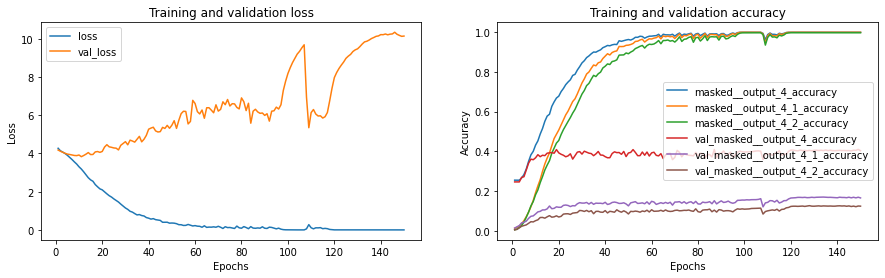

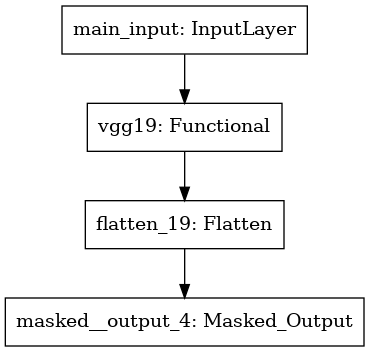

In [29]:
# tensorboard = TensorBoard(log_dir='/tmp/logs', histogram_freq=0,
#                           write_graph=True, write_images=False)
# Create the model
mcnn_bottom_up_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                    dataset.image_size,
                                                    dataset.taxonomy,
                                                    architecture='bottom_up',
                                                    conv_base=conv_base,
                                                    learning_rate=learning_rate)
mcnn_bottom_up_model.summary(line_length=110)
#train model
history_mcnn_bottom_up_model_model = mcnn_bottom_up_model.fit(dataset.train_dataset,
                                                              validation_data=dataset.val_dataset,
                                                              epochs=epochs,
                                                              callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_bottom_up_model_model)
plot_model(mcnn_bottom_up_model)


Model: "mcnn_mnets_bottom_up_model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
main_input (InputLayer)             [(None, 64, 64, 3)]     0                                                 
______________________________________________________________________________________________________________
conv_base_mcnn_0 (Functional)       (None, None, None, 512) 20024384     main_input[0][0]                     
______________________________________________________________________________________________________________
conv_base_mcnn_1 (Functional)       (None, None, None, 512) 20024384     main_input[0][0]                     
______________________________________________________________________________________________________________
conv_base_mcnn_2 (Functional)       (None, None, None, 512) 20024384     mai

2021-10-05 06:19:19.719347: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 2/64 [..............................] - ETA: 25s - loss: 4.5128 - masked__output_5_loss: 2.5416 - masked__output_5_1_loss: 4.7274 - masked__output_5_2_loss: 6.2692 - masked__output_5_accuracy: 0.1484 - masked__output_5_1_accuracy: 0.0078 - masked__output_5_2_accuracy: 0.0078     

2021-10-05 06:19:20.137670: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 3/64 [>.............................] - ETA: 20s - loss: 4.5006 - masked__output_5_loss: 2.5235 - masked__output_5_1_loss: 4.7285 - masked__output_5_2_loss: 6.2498 - masked__output_5_accuracy: 0.1641 - masked__output_5_1_accuracy: 0.0078 - masked__output_5_2_accuracy: 0.0104

2021-10-05 06:19:20.392177: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 4/64 [>.............................] - ETA: 17s - loss: 4.4864 - masked__output_5_loss: 2.5096 - masked__output_5_1_loss: 4.7282 - masked__output_5_2_loss: 6.2215 - masked__output_5_accuracy: 0.1855 - masked__output_5_1_accuracy: 0.0059 - masked__output_5_2_accuracy: 0.0098

2021-10-05 06:19:20.596390: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 5/64 [=>............................] - ETA: 17s - loss: 4.4836 - masked__output_5_loss: 2.5022 - masked__output_5_1_loss: 4.7282 - masked__output_5_2_loss: 6.2205 - masked__output_5_accuracy: 0.1859 - masked__output_5_1_accuracy: 0.0047 - masked__output_5_2_accuracy: 0.0094

2021-10-05 06:19:20.876209: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-05 06:19:21.076028: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 7/64 [==>...........................] - ETA: 14s - loss: 4.4462 - masked__output_5_loss: 2.4775 - masked__output_5_1_loss: 4.7276 - masked__output_5_2_loss: 6.1334 - masked__output_5_accuracy: 0.2109 - masked__output_5_1_accuracy: 0.0056 - masked__output_5_2_accuracy: 0.0078

2021-10-05 06:19:21.285281: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-05 06:19:21.479498: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 576.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


64/64 [==============================] - 28s 409ms/step - loss: 4.1935 - masked__output_5_loss: 2.1953 - masked__output_5_1_loss: 4.6921 - masked__output_5_2_loss: 5.6931 - masked__output_5_accuracy: 0.2779 - masked__output_5_1_accuracy: 0.0204 - masked__output_5_2_accuracy: 0.0061 - val_loss: 4.0428 - val_masked__output_5_loss: 2.0542 - val_masked__output_5_1_loss: 4.6174 - val_masked__output_5_2_loss: 5.4567 - val_masked__output_5_accuracy: 0.3204 - val_masked__output_5_1_accuracy: 0.0306 - val_masked__output_5_2_accuracy: 0.0100
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 415ms/step - loss: 3.7516 - masked__output_5_loss: 1.6547 - masked__output_5_1_loss: 4.4085 - masked__output_5_2_loss: 5.1917 - masked__output_5_accuracy: 0.4645 - masked__output_5_1_accuracy: 0.0726 - masked__output_5_2_accuracy: 0.0150 - val_loss: 3.8557 - val_masked__output_5_loss: 1.9089 - val_masked__output_5_1_loss: 4.4379 - val_masked__output_5_2_loss: 5.2203 - val_masked__output_5_accuracy: 0.3649 - val_masked__output_5_1_accuracy: 0.0550 - val_masked__output_5_2_accuracy: 0.0149
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 408ms/step - loss: 3.4899 - masked__output_5_loss: 1.3356 - masked__output_5_1_loss: 4.1065 - masked__output_5_2_loss: 5.0276 - masked__output_5_accuracy: 0.5792 - masked__output_5_1_accuracy: 0.1329 - masked__output_5_2_accuracy: 0.0387 - val_loss: 3.7453 - val_masked__output_5_loss: 1.8323 - val_masked__output_5_1_loss: 4.2794 - val_masked__output_5_2_loss: 5.1241 - val_masked__output_5_accuracy: 0.4321 - val_masked__output_5_1_accuracy: 0.0878 - val_masked__output_5_2_accuracy: 0.0303
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 410ms/step - loss: 3.2597 - masked__output_5_loss: 1.1366 - masked__output_5_1_loss: 3.7788 - masked__output_5_2_loss: 4.8637 - masked__output_5_accuracy: 0.6575 - masked__output_5_1_accuracy: 0.1981 - masked__output_5_2_accuracy: 0.0654 - val_loss: 3.7612 - val_masked__output_5_loss: 2.0053 - val_masked__output_5_1_loss: 4.1850 - val_masked__output_5_2_loss: 5.0935 - val_masked__output_5_accuracy: 0.4219 - val_masked__output_5_1_accuracy: 0.0983 - val_masked__output_5_2_accuracy: 0.0338
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 406ms/step - loss: 3.0429 - masked__output_5_loss: 1.0386 - masked__output_5_1_loss: 3.4158 - masked__output_5_2_loss: 4.6744 - masked__output_5_accuracy: 0.7004 - masked__output_5_1_accuracy: 0.2754 - masked__output_5_2_accuracy: 0.1023 - val_loss: 3.7043 - val_masked__output_5_loss: 1.9490 - val_masked__output_5_1_loss: 4.1381 - val_masked__output_5_2_loss: 5.0259 - val_masked__output_5_accuracy: 0.4269 - val_masked__output_5_1_accuracy: 0.1067 - val_masked__output_5_2_accuracy: 0.0368
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 408ms/step - loss: 2.7445 - masked__output_5_loss: 0.7656 - masked__output_5_1_loss: 3.0290 - masked__output_5_2_loss: 4.4389 - masked__output_5_accuracy: 0.7886 - masked__output_5_1_accuracy: 0.3542 - masked__output_5_2_accuracy: 0.1589 - val_loss: 3.7967 - val_masked__output_5_loss: 2.3087 - val_masked__output_5_1_loss: 4.1108 - val_masked__output_5_2_loss: 4.9706 - val_masked__output_5_accuracy: 0.3945 - val_masked__output_5_1_accuracy: 0.1249 - val_masked__output_5_2_accuracy: 0.0450
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 409ms/step - loss: 2.5225 - masked__output_5_loss: 0.7261 - masked__output_5_1_loss: 2.6436 - masked__output_5_2_loss: 4.1979 - masked__output_5_accuracy: 0.7979 - masked__output_5_1_accuracy: 0.4341 - masked__output_5_2_accuracy: 0.2028 - val_loss: 3.9884 - val_masked__output_5_loss: 2.6446 - val_masked__output_5_1_loss: 4.4252 - val_masked__output_5_2_loss: 4.8953 - val_masked__output_5_accuracy: 0.4251 - val_masked__output_5_1_accuracy: 0.1254 - val_masked__output_5_2_accuracy: 0.0517
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 407ms/step - loss: 2.2886 - masked__output_5_loss: 0.5575 - masked__output_5_1_loss: 2.3650 - masked__output_5_2_loss: 3.9432 - masked__output_5_accuracy: 0.8546 - masked__output_5_1_accuracy: 0.4962 - masked__output_5_2_accuracy: 0.2577 - val_loss: 4.3794 - val_masked__output_5_loss: 3.5027 - val_masked__output_5_1_loss: 4.7809 - val_masked__output_5_2_loss: 4.8546 - val_masked__output_5_accuracy: 0.4458 - val_masked__output_5_1_accuracy: 0.1251 - val_masked__output_5_2_accuracy: 0.0592
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 413ms/step - loss: 2.1234 - masked__output_5_loss: 0.5591 - masked__output_5_1_loss: 2.1266 - masked__output_5_2_loss: 3.6846 - masked__output_5_accuracy: 0.8578 - masked__output_5_1_accuracy: 0.5494 - masked__output_5_2_accuracy: 0.3073 - val_loss: 4.2878 - val_masked__output_5_loss: 3.0602 - val_masked__output_5_1_loss: 5.0014 - val_masked__output_5_2_loss: 4.8019 - val_masked__output_5_accuracy: 0.4535 - val_masked__output_5_1_accuracy: 0.1463 - val_masked__output_5_2_accuracy: 0.0629
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 408ms/step - loss: 1.9118 - masked__output_5_loss: 0.4300 - masked__output_5_1_loss: 1.8793 - masked__output_5_2_loss: 3.4260 - masked__output_5_accuracy: 0.8970 - masked__output_5_1_accuracy: 0.6073 - masked__output_5_2_accuracy: 0.3597 - val_loss: 4.4407 - val_masked__output_5_loss: 3.5215 - val_masked__output_5_1_loss: 5.0359 - val_masked__output_5_2_loss: 4.7648 - val_masked__output_5_accuracy: 0.4289 - val_masked__output_5_1_accuracy: 0.1445 - val_masked__output_5_2_accuracy: 0.0689
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 412ms/step - loss: 1.7117 - masked__output_5_loss: 0.3481 - masked__output_5_1_loss: 1.6522 - masked__output_5_2_loss: 3.1349 - masked__output_5_accuracy: 0.9212 - masked__output_5_1_accuracy: 0.6574 - masked__output_5_2_accuracy: 0.4066 - val_loss: 4.5509 - val_masked__output_5_loss: 3.2961 - val_masked__output_5_1_loss: 5.5444 - val_masked__output_5_2_loss: 4.8121 - val_masked__output_5_accuracy: 0.4378 - val_masked__output_5_1_accuracy: 0.1540 - val_masked__output_5_2_accuracy: 0.0674
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 414ms/step - loss: 1.4834 - masked__output_5_loss: 0.3044 - masked__output_5_1_loss: 1.3312 - masked__output_5_2_loss: 2.8145 - masked__output_5_accuracy: 0.9293 - masked__output_5_1_accuracy: 0.7264 - masked__output_5_2_accuracy: 0.4754 - val_loss: 4.5989 - val_masked__output_5_loss: 3.1629 - val_masked__output_5_1_loss: 5.8046 - val_masked__output_5_2_loss: 4.8293 - val_masked__output_5_accuracy: 0.4545 - val_masked__output_5_1_accuracy: 0.1515 - val_masked__output_5_2_accuracy: 0.0779
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 410ms/step - loss: 1.3808 - masked__output_5_loss: 0.2479 - masked__output_5_1_loss: 1.2870 - masked__output_5_2_loss: 2.6076 - masked__output_5_accuracy: 0.9470 - masked__output_5_1_accuracy: 0.7455 - masked__output_5_2_accuracy: 0.5103 - val_loss: 4.6581 - val_masked__output_5_loss: 3.4598 - val_masked__output_5_1_loss: 5.6931 - val_masked__output_5_2_loss: 4.8215 - val_masked__output_5_accuracy: 0.4577 - val_masked__output_5_1_accuracy: 0.1684 - val_masked__output_5_2_accuracy: 0.0808
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 406ms/step - loss: 1.2639 - masked__output_5_loss: 0.2389 - masked__output_5_1_loss: 1.1365 - masked__output_5_2_loss: 2.4164 - masked__output_5_accuracy: 0.9527 - masked__output_5_1_accuracy: 0.7722 - masked__output_5_2_accuracy: 0.5437 - val_loss: 4.5172 - val_masked__output_5_loss: 3.2547 - val_masked__output_5_1_loss: 5.4666 - val_masked__output_5_2_loss: 4.8303 - val_masked__output_5_accuracy: 0.4759 - val_masked__output_5_1_accuracy: 0.1520 - val_masked__output_5_2_accuracy: 0.0789
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 404ms/step - loss: 1.1463 - masked__output_5_loss: 0.2166 - masked__output_5_1_loss: 1.0012 - masked__output_5_2_loss: 2.2212 - masked__output_5_accuracy: 0.9605 - masked__output_5_1_accuracy: 0.8001 - masked__output_5_2_accuracy: 0.5817 - val_loss: 4.7035 - val_masked__output_5_loss: 3.1789 - val_masked__output_5_1_loss: 5.8867 - val_masked__output_5_2_loss: 5.0448 - val_masked__output_5_accuracy: 0.4724 - val_masked__output_5_1_accuracy: 0.1520 - val_masked__output_5_2_accuracy: 0.0736
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.9881 - masked__output_5_loss: 0.1801 - masked__output_5_1_loss: 0.8575 - masked__output_5_2_loss: 1.9266 - masked__output_5_accuracy: 0.9646 - masked__output_5_1_accuracy: 0.8336 - masked__output_5_2_accuracy: 0.6324 - val_loss: 4.7591 - val_masked__output_5_loss: 3.0665 - val_masked__output_5_1_loss: 6.1737 - val_masked__output_5_2_loss: 5.0373 - val_masked__output_5_accuracy: 0.4692 - val_masked__output_5_1_accuracy: 0.1555 - val_masked__output_5_2_accuracy: 0.0826
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.8412 - masked__output_5_loss: 0.1372 - masked__output_5_1_loss: 0.6856 - masked__output_5_2_loss: 1.7007 - masked__output_5_accuracy: 0.9747 - masked__output_5_1_accuracy: 0.8639 - masked__output_5_2_accuracy: 0.6799 - val_loss: 4.9872 - val_masked__output_5_loss: 3.5712 - val_masked__output_5_1_loss: 6.2076 - val_masked__output_5_2_loss: 5.1829 - val_masked__output_5_accuracy: 0.4542 - val_masked__output_5_1_accuracy: 0.1617 - val_masked__output_5_2_accuracy: 0.0915
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 409ms/step - loss: 0.8084 - masked__output_5_loss: 0.1684 - masked__output_5_1_loss: 0.6738 - masked__output_5_2_loss: 1.5830 - masked__output_5_accuracy: 0.9684 - masked__output_5_1_accuracy: 0.8692 - masked__output_5_2_accuracy: 0.6958 - val_loss: 4.9723 - val_masked__output_5_loss: 3.1309 - val_masked__output_5_1_loss: 6.4974 - val_masked__output_5_2_loss: 5.2886 - val_masked__output_5_accuracy: 0.4547 - val_masked__output_5_1_accuracy: 0.1510 - val_masked__output_5_2_accuracy: 0.0853
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.6701 - masked__output_5_loss: 0.1226 - masked__output_5_1_loss: 0.5466 - masked__output_5_2_loss: 1.3411 - masked__output_5_accuracy: 0.9775 - masked__output_5_1_accuracy: 0.8942 - masked__output_5_2_accuracy: 0.7410 - val_loss: 5.3411 - val_masked__output_5_loss: 3.5670 - val_masked__output_5_1_loss: 7.0543 - val_masked__output_5_2_loss: 5.4021 - val_masked__output_5_accuracy: 0.4649 - val_masked__output_5_1_accuracy: 0.1510 - val_masked__output_5_2_accuracy: 0.0878
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 417ms/step - loss: 0.5461 - masked__output_5_loss: 0.0814 - masked__output_5_1_loss: 0.4167 - masked__output_5_2_loss: 1.1402 - masked__output_5_accuracy: 0.9860 - masked__output_5_1_accuracy: 0.9177 - masked__output_5_2_accuracy: 0.7800 - val_loss: 5.1353 - val_masked__output_5_loss: 3.6022 - val_masked__output_5_1_loss: 6.4212 - val_masked__output_5_2_loss: 5.3823 - val_masked__output_5_accuracy: 0.4629 - val_masked__output_5_1_accuracy: 0.1609 - val_masked__output_5_2_accuracy: 0.0925
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 414ms/step - loss: 0.5719 - masked__output_5_loss: 0.1139 - masked__output_5_1_loss: 0.4806 - masked__output_5_2_loss: 1.1212 - masked__output_5_accuracy: 0.9842 - masked__output_5_1_accuracy: 0.9112 - masked__output_5_2_accuracy: 0.7768 - val_loss: 4.9607 - val_masked__output_5_loss: 3.3919 - val_masked__output_5_1_loss: 6.1483 - val_masked__output_5_2_loss: 5.3417 - val_masked__output_5_accuracy: 0.4614 - val_masked__output_5_1_accuracy: 0.1587 - val_masked__output_5_2_accuracy: 0.0943
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.3972 - masked__output_5_loss: 0.0627 - masked__output_5_1_loss: 0.2820 - masked__output_5_2_loss: 0.8469 - masked__output_5_accuracy: 0.9912 - masked__output_5_1_accuracy: 0.9467 - masked__output_5_2_accuracy: 0.8369 - val_loss: 5.5122 - val_masked__output_5_loss: 3.9458 - val_masked__output_5_1_loss: 6.8297 - val_masked__output_5_2_loss: 5.7611 - val_masked__output_5_accuracy: 0.4637 - val_masked__output_5_1_accuracy: 0.1577 - val_masked__output_5_2_accuracy: 0.0953
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 406ms/step - loss: 0.3410 - masked__output_5_loss: 0.0460 - masked__output_5_1_loss: 0.2465 - masked__output_5_2_loss: 0.7306 - masked__output_5_accuracy: 0.9931 - masked__output_5_1_accuracy: 0.9559 - masked__output_5_2_accuracy: 0.8651 - val_loss: 5.0782 - val_masked__output_5_loss: 3.4255 - val_masked__output_5_1_loss: 6.0707 - val_masked__output_5_2_loss: 5.7385 - val_masked__output_5_accuracy: 0.4557 - val_masked__output_5_1_accuracy: 0.1527 - val_masked__output_5_2_accuracy: 0.0955
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 416ms/step - loss: 0.2987 - masked__output_5_loss: 0.0486 - masked__output_5_1_loss: 0.2155 - masked__output_5_2_loss: 0.6320 - masked__output_5_accuracy: 0.9929 - masked__output_5_1_accuracy: 0.9621 - masked__output_5_2_accuracy: 0.8797 - val_loss: 5.0175 - val_masked__output_5_loss: 3.1388 - val_masked__output_5_1_loss: 5.9655 - val_masked__output_5_2_loss: 5.9483 - val_masked__output_5_accuracy: 0.4358 - val_masked__output_5_1_accuracy: 0.1545 - val_masked__output_5_2_accuracy: 0.0938
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 410ms/step - loss: 0.2420 - masked__output_5_loss: 0.0497 - masked__output_5_1_loss: 0.1722 - masked__output_5_2_loss: 0.5040 - masked__output_5_accuracy: 0.9928 - masked__output_5_1_accuracy: 0.9704 - masked__output_5_2_accuracy: 0.8999 - val_loss: 5.3794 - val_masked__output_5_loss: 3.5541 - val_masked__output_5_1_loss: 6.2990 - val_masked__output_5_2_loss: 6.2851 - val_masked__output_5_accuracy: 0.4226 - val_masked__output_5_1_accuracy: 0.1535 - val_masked__output_5_2_accuracy: 0.0923
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 417ms/step - loss: 0.1597 - masked__output_5_loss: 0.0166 - masked__output_5_1_loss: 0.0926 - masked__output_5_2_loss: 0.3699 - masked__output_5_accuracy: 0.9977 - masked__output_5_1_accuracy: 0.9831 - masked__output_5_2_accuracy: 0.9334 - val_loss: 5.9196 - val_masked__output_5_loss: 3.8024 - val_masked__output_5_1_loss: 7.2524 - val_masked__output_5_2_loss: 6.7040 - val_masked__output_5_accuracy: 0.4139 - val_masked__output_5_1_accuracy: 0.1371 - val_masked__output_5_2_accuracy: 0.0871
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.1777 - masked__output_5_loss: 0.0294 - masked__output_5_1_loss: 0.1214 - masked__output_5_2_loss: 0.3822 - masked__output_5_accuracy: 0.9959 - masked__output_5_1_accuracy: 0.9794 - masked__output_5_2_accuracy: 0.9296 - val_loss: 5.7274 - val_masked__output_5_loss: 3.5786 - val_masked__output_5_1_loss: 7.0892 - val_masked__output_5_2_loss: 6.5145 - val_masked__output_5_accuracy: 0.4445 - val_masked__output_5_1_accuracy: 0.1644 - val_masked__output_5_2_accuracy: 0.0988
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.1818 - masked__output_5_loss: 0.0414 - masked__output_5_1_loss: 0.1381 - masked__output_5_2_loss: 0.3659 - masked__output_5_accuracy: 0.9946 - masked__output_5_1_accuracy: 0.9756 - masked__output_5_2_accuracy: 0.9266 - val_loss: 5.4259 - val_masked__output_5_loss: 3.0970 - val_masked__output_5_1_loss: 6.6371 - val_masked__output_5_2_loss: 6.5436 - val_masked__output_5_accuracy: 0.4515 - val_masked__output_5_1_accuracy: 0.1445 - val_masked__output_5_2_accuracy: 0.0888
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 407ms/step - loss: 0.1471 - masked__output_5_loss: 0.0432 - masked__output_5_1_loss: 0.1104 - masked__output_5_2_loss: 0.2877 - masked__output_5_accuracy: 0.9951 - masked__output_5_1_accuracy: 0.9828 - masked__output_5_2_accuracy: 0.9447 - val_loss: 5.1727 - val_masked__output_5_loss: 2.5510 - val_masked__output_5_1_loss: 5.9826 - val_masked__output_5_2_loss: 6.9845 - val_masked__output_5_accuracy: 0.4517 - val_masked__output_5_1_accuracy: 0.1425 - val_masked__output_5_2_accuracy: 0.0905
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 413ms/step - loss: 0.1013 - masked__output_5_loss: 0.0271 - masked__output_5_1_loss: 0.0615 - masked__output_5_2_loss: 0.2153 - masked__output_5_accuracy: 0.9966 - masked__output_5_1_accuracy: 0.9901 - masked__output_5_2_accuracy: 0.9619 - val_loss: 5.7093 - val_masked__output_5_loss: 2.9320 - val_masked__output_5_1_loss: 6.8779 - val_masked__output_5_2_loss: 7.3179 - val_masked__output_5_accuracy: 0.4301 - val_masked__output_5_1_accuracy: 0.1353 - val_masked__output_5_2_accuracy: 0.0813
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 417ms/step - loss: 0.0988 - masked__output_5_loss: 0.0189 - masked__output_5_1_loss: 0.0601 - masked__output_5_2_loss: 0.2173 - masked__output_5_accuracy: 0.9978 - masked__output_5_1_accuracy: 0.9897 - masked__output_5_2_accuracy: 0.9648 - val_loss: 5.5244 - val_masked__output_5_loss: 2.9800 - val_masked__output_5_1_loss: 6.4550 - val_masked__output_5_2_loss: 7.1384 - val_masked__output_5_accuracy: 0.4552 - val_masked__output_5_1_accuracy: 0.1510 - val_masked__output_5_2_accuracy: 0.0891
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 415ms/step - loss: 0.1207 - masked__output_5_loss: 0.0329 - masked__output_5_1_loss: 0.0930 - masked__output_5_2_loss: 0.2362 - masked__output_5_accuracy: 0.9944 - masked__output_5_1_accuracy: 0.9849 - masked__output_5_2_accuracy: 0.9590 - val_loss: 5.9079 - val_masked__output_5_loss: 3.2533 - val_masked__output_5_1_loss: 7.2344 - val_masked__output_5_2_loss: 7.2359 - val_masked__output_5_accuracy: 0.4515 - val_masked__output_5_1_accuracy: 0.1413 - val_masked__output_5_2_accuracy: 0.0893
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 422ms/step - loss: 0.0521 - masked__output_5_loss: 0.0092 - masked__output_5_1_loss: 0.0261 - masked__output_5_2_loss: 0.1210 - masked__output_5_accuracy: 0.9982 - masked__output_5_1_accuracy: 0.9961 - masked__output_5_2_accuracy: 0.9819 - val_loss: 5.9803 - val_masked__output_5_loss: 3.4877 - val_masked__output_5_1_loss: 6.9683 - val_masked__output_5_2_loss: 7.4850 - val_masked__output_5_accuracy: 0.4502 - val_masked__output_5_1_accuracy: 0.1527 - val_masked__output_5_2_accuracy: 0.0918
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 27s 414ms/step - loss: 0.0118 - masked__output_5_loss: 5.6213e-04 - masked__output_5_1_loss: 0.0020 - masked__output_5_2_loss: 0.0328 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9995 - masked__output_5_2_accuracy: 0.9963 - val_loss: 6.9824 - val_masked__output_5_loss: 4.2575 - val_masked__output_5_1_loss: 8.3928 - val_masked__output_5_2_loss: 8.2969 - val_masked__output_5_accuracy: 0.4388 - val_masked__output_5_1_accuracy: 0.1577 - val_masked__output_5_2_accuracy: 0.0988
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0077 - masked__output_5_loss: 6.7744e-04 - masked__output_5_1_loss: 9.6726e-04 - masked__output_5_2_loss: 0.0215 - masked__output_5_accuracy: 0.9998 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9975 - val_loss: 7.1651 - val_masked__output_5_loss: 4.2023 - val_masked__output_5_1_loss: 8.4108 - val_masked__output_5_2_loss: 8.8823 - val_masked__output_5_accuracy: 0.4381 - val_masked__output_5_1_accuracy: 0.1575 - val_masked__output_5_2_accuracy: 0.1015
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

64/64 [==============================] - 26s 408ms/step - loss: 0.0064 - masked__output_5_loss: 6.2469e-04 - masked__output_5_1_loss: 9.6906e-04 - masked__output_5_2_loss: 0.0177 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9975 - val_loss: 7.3827 - val_masked__output_5_loss: 4.2566 - val_masked__output_5_1_loss: 8.5904 - val_masked__output_5_2_loss: 9.3011 - val_masked__output_5_accuracy: 0.4386 - val_masked__output_5_1_accuracy: 0.1612 - val_masked__output_5_2_accuracy: 0.1015
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

64/64 [==============================] - 27s 415ms/step - loss: 0.0056 - masked__output_5_loss: 5.9027e-04 - masked__output_5_1_loss: 0.0010 - masked__output_5_2_loss: 0.0152 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.4843 - val_masked__output_5_loss: 4.2021 - val_masked__output_5_1_loss: 8.6860 - val_masked__output_5_2_loss: 9.5648 - val_masked__output_5_accuracy: 0.4405 - val_masked__output_5_1_accuracy: 0.1629 - val_masked__output_5_2_accuracy: 0.0995
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0055 - masked__output_5_loss: 7.5357e-04 - masked__output_5_1_loss: 0.0010 - masked__output_5_2_loss: 0.0148 - masked__output_5_accuracy: 0.9998 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.5887 - val_masked__output_5_loss: 4.3558 - val_masked__output_5_1_loss: 8.6926 - val_masked__output_5_2_loss: 9.7177 - val_masked__output_5_accuracy: 0.4366 - val_masked__output_5_1_accuracy: 0.1600 - val_masked__output_5_2_accuracy: 0.1010
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 27s 413ms/step - loss: 0.0051 - masked__output_5_loss: 4.7434e-04 - masked__output_5_1_loss: 9.4973e-04 - masked__output_5_2_loss: 0.0139 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.7184 - val_masked__output_5_loss: 4.5328 - val_masked__output_5_1_loss: 8.8341 - val_masked__output_5_2_loss: 9.7883 - val_masked__output_5_accuracy: 0.4371 - val_masked__output_5_1_accuracy: 0.1617 - val_masked__output_5_2_accuracy: 0.1025
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

64/64 [==============================] - 27s 418ms/step - loss: 0.0052 - masked__output_5_loss: 0.0011 - masked__output_5_1_loss: 0.0011 - masked__output_5_2_loss: 0.0134 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9972 - val_loss: 7.6023 - val_masked__output_5_loss: 4.4424 - val_masked__output_5_1_loss: 8.5250 - val_masked__output_5_2_loss: 9.8394 - val_masked__output_5_accuracy: 0.4341 - val_masked__output_5_1_accuracy: 0.1614 - val_masked__output_5_2_accuracy: 0.1010
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+---------------------

64/64 [==============================] - 26s 404ms/step - loss: 0.0048 - masked__output_5_loss: 4.5803e-04 - masked__output_5_1_loss: 0.0011 - masked__output_5_2_loss: 0.0128 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9974 - val_loss: 7.5438 - val_masked__output_5_loss: 4.4503 - val_masked__output_5_1_loss: 8.4286 - val_masked__output_5_2_loss: 9.7525 - val_masked__output_5_accuracy: 0.4371 - val_masked__output_5_1_accuracy: 0.1587 - val_masked__output_5_2_accuracy: 0.1017
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0049 - masked__output_5_loss: 5.1122e-04 - masked__output_5_1_loss: 0.0011 - masked__output_5_2_loss: 0.0130 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9998 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.5755 - val_masked__output_5_loss: 4.3780 - val_masked__output_5_1_loss: 8.5470 - val_masked__output_5_2_loss: 9.8015 - val_masked__output_5_accuracy: 0.4378 - val_masked__output_5_1_accuracy: 0.1595 - val_masked__output_5_2_accuracy: 0.1015
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 398ms/step - loss: 0.0050 - masked__output_5_loss: 5.7991e-04 - masked__output_5_1_loss: 0.0011 - masked__output_5_2_loss: 0.0133 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9972 - val_loss: 7.5597 - val_masked__output_5_loss: 4.4524 - val_masked__output_5_1_loss: 8.4944 - val_masked__output_5_2_loss: 9.7323 - val_masked__output_5_accuracy: 0.4363 - val_masked__output_5_1_accuracy: 0.1600 - val_masked__output_5_2_accuracy: 0.1035
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0057 - masked__output_5_loss: 8.8282e-04 - masked__output_5_1_loss: 9.3815e-04 - masked__output_5_2_loss: 0.0152 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.6099 - val_masked__output_5_loss: 4.5488 - val_masked__output_5_1_loss: 8.5789 - val_masked__output_5_2_loss: 9.7021 - val_masked__output_5_accuracy: 0.4353 - val_masked__output_5_1_accuracy: 0.1612 - val_masked__output_5_2_accuracy: 0.1007
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

64/64 [==============================] - 26s 409ms/step - loss: 0.0053 - masked__output_5_loss: 4.6768e-04 - masked__output_5_1_loss: 0.0014 - masked__output_5_2_loss: 0.0140 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.5362 - val_masked__output_5_loss: 4.6061 - val_masked__output_5_1_loss: 8.4156 - val_masked__output_5_2_loss: 9.5868 - val_masked__output_5_accuracy: 0.4366 - val_masked__output_5_1_accuracy: 0.1595 - val_masked__output_5_2_accuracy: 0.1040
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 407ms/step - loss: 0.0053 - masked__output_5_loss: 5.9005e-04 - masked__output_5_1_loss: 0.0012 - masked__output_5_2_loss: 0.0141 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9972 - val_loss: 7.4060 - val_masked__output_5_loss: 4.4340 - val_masked__output_5_1_loss: 8.1875 - val_masked__output_5_2_loss: 9.5964 - val_masked__output_5_accuracy: 0.4373 - val_masked__output_5_1_accuracy: 0.1585 - val_masked__output_5_2_accuracy: 0.1015
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0064 - masked__output_5_loss: 0.0010 - masked__output_5_1_loss: 9.4497e-04 - masked__output_5_2_loss: 0.0172 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.3345 - val_masked__output_5_loss: 4.4400 - val_masked__output_5_1_loss: 8.1854 - val_masked__output_5_2_loss: 9.3780 - val_masked__output_5_accuracy: 0.4381 - val_masked__output_5_1_accuracy: 0.1590 - val_masked__output_5_2_accuracy: 0.1027
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-----------------

64/64 [==============================] - 27s 414ms/step - loss: 0.0055 - masked__output_5_loss: 5.3215e-04 - masked__output_5_1_loss: 8.8127e-04 - masked__output_5_2_loss: 0.0151 - masked__output_5_accuracy: 0.9998 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.4950 - val_masked__output_5_loss: 4.6710 - val_masked__output_5_1_loss: 8.3634 - val_masked__output_5_2_loss: 9.4507 - val_masked__output_5_accuracy: 0.4311 - val_masked__output_5_1_accuracy: 0.1575 - val_masked__output_5_2_accuracy: 0.1007
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

64/64 [==============================] - 26s 406ms/step - loss: 0.0053 - masked__output_5_loss: 3.9147e-04 - masked__output_5_1_loss: 9.9504e-04 - masked__output_5_2_loss: 0.0146 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9973 - val_loss: 7.6045 - val_masked__output_5_loss: 4.8451 - val_masked__output_5_1_loss: 8.5196 - val_masked__output_5_2_loss: 9.4487 - val_masked__output_5_accuracy: 0.4326 - val_masked__output_5_1_accuracy: 0.1595 - val_masked__output_5_2_accuracy: 0.1025
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

64/64 [==============================] - 27s 416ms/step - loss: 0.0054 - masked__output_5_loss: 5.6695e-04 - masked__output_5_1_loss: 9.5727e-04 - masked__output_5_2_loss: 0.0147 - masked__output_5_accuracy: 0.9999 - masked__output_5_1_accuracy: 0.9999 - masked__output_5_2_accuracy: 0.9974 - val_loss: 7.3167 - val_masked__output_5_loss: 4.5554 - val_masked__output_5_1_loss: 8.0321 - val_masked__output_5_2_loss: 9.3625 - val_masked__output_5_accuracy: 0.4398 - val_masked__output_5_1_accuracy: 0.1570 - val_masked__output_5_2_accuracy: 0.1010
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+-------------

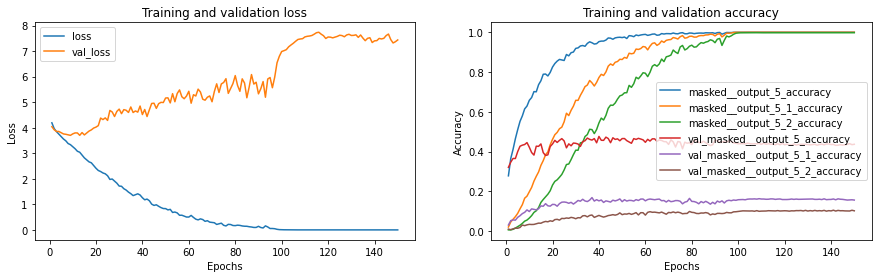

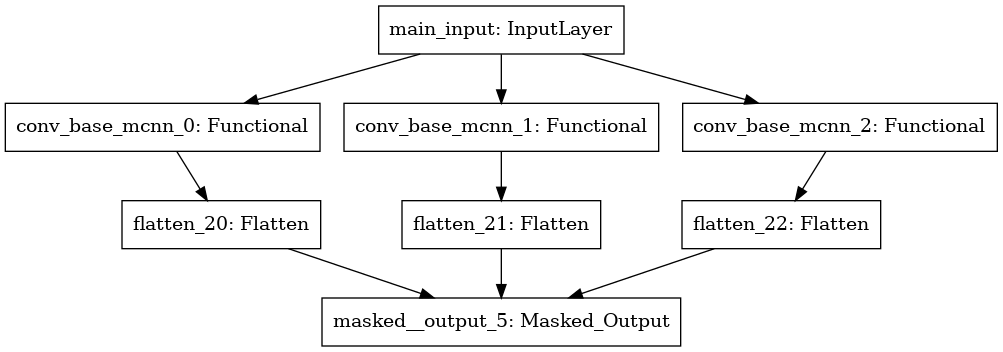

In [30]:
# Create the model
mcnn_mnets_bottom_up_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                          dataset.image_size,
                                                          dataset.taxonomy,
                                                          architecture='bottom_up',
                                                          conv_base=conv_base,
                                                          learning_rate=learning_rate,
                                                          mnets=True)
mcnn_mnets_bottom_up_model.summary(line_length=110)
#train model
history_mcnn_mnets_bottom_up_model = mcnn_mnets_bottom_up_model.fit(dataset.train_dataset,
                                                                    validation_data=dataset.val_dataset,
                                                                    epochs=epochs,
                                                                    callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_mnets_bottom_up_model)
plot_model(mcnn_mnets_bottom_up_model)


Model: "mcnn_top_down_model"
______________________________________________________________________________________________________________
Layer (type)                                     Output Shape                                Param #          
main_input (InputLayer)                          [(None, 64, 64, 3)]                         0                
______________________________________________________________________________________________________________
vgg19 (Functional)                               (None, None, None, 512)                     20024384         
______________________________________________________________________________________________________________
flatten_10 (Flatten)                             (None, 2048)                                0                
______________________________________________________________________________________________________________
masked__output (Masked_Output)                   [(None, 13), (None, 113), (None, 1

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 5/150
64/64 [==============================] - 26s 401ms/step - loss: 3.5456 - masked__output_loss: 1.3629 - masked__output_1_loss: 4.0420 - masked__output_2_loss: 5.2318 - masked__output_accuracy: 0.5334 - masked__output_1_accuracy: 0.1186 - masked__output_2_accuracy: 0.0340 - val_loss: 3.7195 - val_masked__output_loss: 1.6467 - val_masked__output_1_loss: 4.2686 - val_masked__output_2_loss: 5.2430 - val_masked__output_accuracy: 0.4346 - val_masked__output_1_accuracy: 0.0893 - val_masked__output_2_accuracy: 0.0303
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2  

64/64 [==============================] - 26s 404ms/step - loss: 2.8835 - masked__output_loss: 0.9515 - masked__output_1_loss: 3.1194 - masked__output_2_loss: 4.5796 - masked__output_accuracy: 0.6947 - masked__output_1_accuracy: 0.2715 - masked__output_2_accuracy: 0.1400 - val_loss: 3.7448 - val_masked__output_loss: 1.6868 - val_masked__output_1_loss: 4.4070 - val_masked__output_2_loss: 5.1405 - val_masked__output_accuracy: 0.4540 - val_masked__output_1_accuracy: 0.1149 - val_masked__output_2_accuracy: 0.0562
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 401ms/step - loss: 2.3318 - masked__output_loss: 0.7069 - masked__output_1_loss: 2.4853 - masked__output_2_loss: 3.8033 - masked__output_accuracy: 0.7808 - masked__output_1_accuracy: 0.4113 - masked__output_2_accuracy: 0.2574 - val_loss: 3.8264 - val_masked__output_loss: 1.8016 - val_masked__output_1_loss: 4.5221 - val_masked__output_2_loss: 5.1556 - val_masked__output_accuracy: 0.4266 - val_masked__output_1_accuracy: 0.1294 - val_masked__output_2_accuracy: 0.0714
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 401ms/step - loss: 1.9303 - masked__output_loss: 0.5905 - masked__output_1_loss: 2.0622 - masked__output_2_loss: 3.1381 - masked__output_accuracy: 0.8161 - masked__output_1_accuracy: 0.5265 - masked__output_2_accuracy: 0.3736 - val_loss: 4.0363 - val_masked__output_loss: 2.0654 - val_masked__output_1_loss: 4.7885 - val_masked__output_2_loss: 5.2550 - val_masked__output_accuracy: 0.4184 - val_masked__output_1_accuracy: 0.1296 - val_masked__output_2_accuracy: 0.0736
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 410ms/step - loss: 1.4483 - masked__output_loss: 0.4070 - masked__output_1_loss: 1.5425 - masked__output_2_loss: 2.3953 - masked__output_accuracy: 0.8851 - masked__output_1_accuracy: 0.6537 - masked__output_2_accuracy: 0.4896 - val_loss: 4.2533 - val_masked__output_loss: 2.1834 - val_masked__output_1_loss: 5.0753 - val_masked__output_2_loss: 5.5013 - val_masked__output_accuracy: 0.4276 - val_masked__output_1_accuracy: 0.1219 - val_masked__output_2_accuracy: 0.0754
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 30/150
64/64 [==============================] - 25s 399ms/step - loss: 1.0920 - masked__output_loss: 0.2980 - masked__output_1_loss: 1.1523 - masked__output_2_loss: 1.8256 - masked__output_accuracy: 0.9214 - masked__output_1_accuracy: 0.7480 - masked__output_2_accuracy: 0.5966 - val_loss: 4.5112 - val_masked__output_loss: 2.1221 - val_masked__output_1_loss: 5.3491 - val_masked__output_2_loss: 6.0623 - val_masked__output_accuracy: 0.4388 - val_masked__output_1_accuracy: 0.1373 - val_masked__output_2_accuracy: 0.0843
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2 

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 35/150
64/64 [==============================] - 26s 409ms/step - loss: 0.7931 - masked__output_loss: 0.2061 - masked__output_1_loss: 0.8392 - masked__output_2_loss: 1.3340 - masked__output_accuracy: 0.9513 - masked__output_1_accuracy: 0.8269 - masked__output_2_accuracy: 0.6860 - val_loss: 4.5634 - val_masked__output_loss: 2.0402 - val_masked__output_1_loss: 5.3449 - val_masked__output_2_loss: 6.3052 - val_masked__output_accuracy: 0.4766 - val_masked__output_1_accuracy: 0.1577 - val_masked__output_2_accuracy: 0.0963
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2 

64/64 [==============================] - 25s 399ms/step - loss: 0.5042 - masked__output_loss: 0.1239 - masked__output_1_loss: 0.5355 - masked__output_2_loss: 0.8530 - masked__output_accuracy: 0.9786 - masked__output_1_accuracy: 0.9018 - masked__output_2_accuracy: 0.7833 - val_loss: 5.0356 - val_masked__output_loss: 2.2516 - val_masked__output_1_loss: 5.7957 - val_masked__output_2_loss: 7.0596 - val_masked__output_accuracy: 0.4612 - val_masked__output_1_accuracy: 0.1465 - val_masked__output_2_accuracy: 0.0915
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 405ms/step - loss: 0.4183 - masked__output_loss: 0.1205 - masked__output_1_loss: 0.4425 - masked__output_2_loss: 0.6919 - masked__output_accuracy: 0.9726 - masked__output_1_accuracy: 0.9240 - masked__output_2_accuracy: 0.8330 - val_loss: 5.3687 - val_masked__output_loss: 2.5333 - val_masked__output_1_loss: 6.1364 - val_masked__output_2_loss: 7.4365 - val_masked__output_accuracy: 0.4627 - val_masked__output_1_accuracy: 0.1475 - val_masked__output_2_accuracy: 0.0928
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 407ms/step - loss: 0.3564 - masked__output_loss: 0.1017 - masked__output_1_loss: 0.3853 - masked__output_2_loss: 0.5820 - masked__output_accuracy: 0.9802 - masked__output_1_accuracy: 0.9395 - masked__output_2_accuracy: 0.8671 - val_loss: 5.2655 - val_masked__output_loss: 2.3264 - val_masked__output_1_loss: 6.0588 - val_masked__output_2_loss: 7.4115 - val_masked__output_accuracy: 0.4736 - val_masked__output_1_accuracy: 0.1612 - val_masked__output_2_accuracy: 0.0963
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 403ms/step - loss: 0.2174 - masked__output_loss: 0.0594 - masked__output_1_loss: 0.2318 - masked__output_2_loss: 0.3610 - masked__output_accuracy: 0.9914 - masked__output_1_accuracy: 0.9680 - masked__output_2_accuracy: 0.9107 - val_loss: 5.8504 - val_masked__output_loss: 2.6281 - val_masked__output_1_loss: 6.5405 - val_masked__output_2_loss: 8.3825 - val_masked__output_accuracy: 0.4888 - val_masked__output_1_accuracy: 0.1602 - val_masked__output_2_accuracy: 0.0985
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 60/150
64/64 [==============================] - 26s 406ms/step - loss: 0.1849 - masked__output_loss: 0.0553 - masked__output_1_loss: 0.2013 - masked__output_2_loss: 0.2982 - masked__output_accuracy: 0.9897 - masked__output_1_accuracy: 0.9746 - masked__output_2_accuracy: 0.9319 - val_loss: 5.4675 - val_masked__output_loss: 2.4029 - val_masked__output_1_loss: 6.2152 - val_masked__output_2_loss: 7.7844 - val_masked__output_accuracy: 0.4801 - val_masked__output_1_accuracy: 0.1677 - val_masked__output_2_accuracy: 0.1109
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2 

64/64 [==============================] - 26s 403ms/step - loss: 0.2092 - masked__output_loss: 0.0719 - masked__output_1_loss: 0.2321 - masked__output_2_loss: 0.3237 - masked__output_accuracy: 0.9834 - masked__output_1_accuracy: 0.9687 - masked__output_2_accuracy: 0.9320 - val_loss: 5.4442 - val_masked__output_loss: 2.4283 - val_masked__output_1_loss: 6.1995 - val_masked__output_2_loss: 7.7048 - val_masked__output_accuracy: 0.4823 - val_masked__output_1_accuracy: 0.1580 - val_masked__output_2_accuracy: 0.0963
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 404ms/step - loss: 0.2199 - masked__output_loss: 0.0750 - masked__output_1_loss: 0.2418 - masked__output_2_loss: 0.3431 - masked__output_accuracy: 0.9817 - masked__output_1_accuracy: 0.9650 - masked__output_2_accuracy: 0.9332 - val_loss: 5.3327 - val_masked__output_loss: 2.5463 - val_masked__output_1_loss: 6.0953 - val_masked__output_2_loss: 7.3566 - val_masked__output_accuracy: 0.4851 - val_masked__output_1_accuracy: 0.1729 - val_masked__output_2_accuracy: 0.1114
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 407ms/step - loss: 0.3477 - masked__output_loss: 0.1323 - masked__output_1_loss: 0.3845 - masked__output_2_loss: 0.5262 - masked__output_accuracy: 0.9686 - masked__output_1_accuracy: 0.9397 - masked__output_2_accuracy: 0.9062 - val_loss: 5.5771 - val_masked__output_loss: 2.3950 - val_masked__output_1_loss: 6.3881 - val_masked__output_2_loss: 7.9481 - val_masked__output_accuracy: 0.4662 - val_masked__output_1_accuracy: 0.1652 - val_masked__output_2_accuracy: 0.1052
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 80/150
64/64 [==============================] - 26s 406ms/step - loss: 0.0412 - masked__output_loss: 0.0119 - masked__output_1_loss: 0.0441 - masked__output_2_loss: 0.0676 - masked__output_accuracy: 0.9990 - masked__output_1_accuracy: 0.9959 - masked__output_2_accuracy: 0.9872 - val_loss: 7.1236 - val_masked__output_loss: 2.7936 - val_masked__output_1_loss: 7.7940 - val_masked__output_2_loss: 10.7831 - val_masked__output_accuracy: 0.4950 - val_masked__output_1_accuracy: 0.1731 - val_masked__output_2_accuracy: 0.1124
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 85/150
64/64 [==============================] - 26s 410ms/step - loss: 0.0164 - masked__output_loss: 0.0066 - masked__output_1_loss: 0.0183 - masked__output_2_loss: 0.0241 - masked__output_accuracy: 0.9995 - masked__output_1_accuracy: 0.9989 - masked__output_2_accuracy: 0.9957 - val_loss: 8.3815 - val_masked__output_loss: 3.0929 - val_masked__output_1_loss: 8.9721 - val_masked__output_2_loss: 13.0797 - val_masked__output_accuracy: 0.4985 - val_masked__output_1_accuracy: 0.1774 - val_masked__output_2_accuracy: 0.1174
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2

64/64 [==============================] - 26s 402ms/step - loss: 0.0110 - masked__output_loss: 0.0044 - masked__output_1_loss: 0.0122 - masked__output_2_loss: 0.0166 - masked__output_accuracy: 0.9996 - masked__output_1_accuracy: 0.9993 - masked__output_2_accuracy: 0.9967 - val_loss: 9.0680 - val_masked__output_loss: 3.2469 - val_masked__output_1_loss: 9.6231 - val_masked__output_2_loss: 14.3338 - val_masked__output_accuracy: 0.4990 - val_masked__output_1_accuracy: 0.1761 - val_masked__output_2_accuracy: 0.1169
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------

64/64 [==============================] - 26s 406ms/step - loss: 0.1473 - masked__output_loss: 0.0511 - masked__output_1_loss: 0.1674 - masked__output_2_loss: 0.2233 - masked__output_accuracy: 0.9869 - masked__output_1_accuracy: 0.9764 - masked__output_2_accuracy: 0.9612 - val_loss: 5.2988 - val_masked__output_loss: 2.4613 - val_masked__output_1_loss: 6.1031 - val_masked__output_2_loss: 7.3318 - val_masked__output_accuracy: 0.4711 - val_masked__output_1_accuracy: 0.1644 - val_masked__output_2_accuracy: 0.1097
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+---------

64/64 [==============================] - 26s 410ms/step - loss: 0.0373 - masked__output_loss: 0.0150 - masked__output_1_loss: 0.0447 - masked__output_2_loss: 0.0520 - masked__output_accuracy: 0.9988 - masked__output_1_accuracy: 0.9969 - masked__output_2_accuracy: 0.9934 - val_loss: 7.0456 - val_masked__output_loss: 2.9173 - val_masked__output_1_loss: 7.6728 - val_masked__output_2_loss: 10.5466 - val_masked__output_accuracy: 0.4823 - val_masked__output_1_accuracy: 0.1682 - val_masked__output_2_accuracy: 0.1147
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------

64/64 [==============================] - 26s 414ms/step - loss: 0.0110 - masked__output_loss: 0.0043 - masked__output_1_loss: 0.0126 - masked__output_2_loss: 0.0161 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9995 - masked__output_2_accuracy: 0.9967 - val_loss: 7.5346 - val_masked__output_loss: 2.9709 - val_masked__output_1_loss: 8.1369 - val_masked__output_2_loss: 11.4961 - val_masked__output_accuracy: 0.5022 - val_masked__output_1_accuracy: 0.1821 - val_masked__output_2_accuracy: 0.1197
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 110/150
64/64 [==============================] - 26s 408ms/step - loss: 0.0054 - masked__output_loss: 0.0020 - masked__output_1_loss: 0.0050 - masked__output_2_loss: 0.0091 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9975 - val_loss: 8.8629 - val_masked__output_loss: 3.3087 - val_masked__output_1_loss: 9.3723 - val_masked__output_2_loss: 13.9076 - val_masked__output_accuracy: 0.5035 - val_masked__output_1_accuracy: 0.1794 - val_masked__output_2_accuracy: 0.1209
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric

64/64 [==============================] - 26s 406ms/step - loss: 0.0046 - masked__output_loss: 0.0015 - masked__output_1_loss: 0.0036 - masked__output_2_loss: 0.0086 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9977 - val_loss: 9.5964 - val_masked__output_loss: 3.5117 - val_masked__output_1_loss: 10.0768 - val_masked__output_2_loss: 15.2007 - val_masked__output_accuracy: 0.5035 - val_masked__output_1_accuracy: 0.1811 - val_masked__output_2_accuracy: 0.1224
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+-------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 120/150
64/64 [==============================] - 26s 405ms/step - loss: 0.0045 - masked__output_loss: 9.9603e-04 - masked__output_1_loss: 0.0031 - masked__output_2_loss: 0.0094 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9975 - val_loss: 9.9740 - val_masked__output_loss: 3.6041 - val_masked__output_1_loss: 10.4173 - val_masked__output_2_loss: 15.9005 - val_masked__output_accuracy: 0.5060 - val_masked__output_1_accuracy: 0.1828 - val_masked__output_2_accuracy: 0.1219
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         M

64/64 [==============================] - 26s 408ms/step - loss: 0.0046 - masked__output_loss: 0.0013 - masked__output_1_loss: 0.0027 - masked__output_2_loss: 0.0098 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9977 - val_loss: 10.1850 - val_masked__output_loss: 3.6561 - val_masked__output_1_loss: 10.6171 - val_masked__output_2_loss: 16.2816 - val_masked__output_accuracy: 0.5052 - val_masked__output_1_accuracy: 0.1833 - val_masked__output_2_accuracy: 0.1226
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+------

64/64 [==============================] - 26s 405ms/step - loss: 0.0049 - masked__output_loss: 0.0010 - masked__output_1_loss: 0.0027 - masked__output_2_loss: 0.0110 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9975 - val_loss: 10.1560 - val_masked__output_loss: 3.6487 - val_masked__output_1_loss: 10.5787 - val_masked__output_2_loss: 16.2405 - val_masked__output_accuracy: 0.5032 - val_masked__output_1_accuracy: 0.1821 - val_masked__output_2_accuracy: 0.1236
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 135/150
64/64 [==============================] - 26s 407ms/step - loss: 0.0047 - masked__output_loss: 8.2620e-04 - masked__output_1_loss: 0.0022 - masked__output_2_loss: 0.0111 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9977 - val_loss: 10.2802 - val_masked__output_loss: 3.6779 - val_masked__output_1_loss: 10.6959 - val_masked__output_2_loss: 16.4667 - val_masked__output_accuracy: 0.5047 - val_masked__output_1_accuracy: 0.1808 - val_masked__output_2_accuracy: 0.1209
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         

64/64 [==============================] - 26s 405ms/step - loss: 0.0053 - masked__output_loss: 0.0014 - masked__output_1_loss: 0.0024 - masked__output_2_loss: 0.0121 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9974 - val_loss: 10.0594 - val_masked__output_loss: 3.6124 - val_masked__output_1_loss: 10.4736 - val_masked__output_2_loss: 16.0921 - val_masked__output_accuracy: 0.5017 - val_masked__output_1_accuracy: 0.1833 - val_masked__output_2_accuracy: 0.1239
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+------

INFO:tensorflow:Assets written to: models/mcnn_top_down_model_stanford_cars_vgg19/assets
Epoch 145/150
64/64 [==============================] - 26s 405ms/step - loss: 0.0052 - masked__output_loss: 8.3583e-04 - masked__output_1_loss: 0.0023 - masked__output_2_loss: 0.0124 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9975 - val_loss: 10.1201 - val_masked__output_loss: 3.6320 - val_masked__output_1_loss: 10.5085 - val_masked__output_2_loss: 16.2197 - val_masked__output_accuracy: 0.5005 - val_masked__output_1_accuracy: 0.1786 - val_masked__output_2_accuracy: 0.1197
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         

64/64 [==============================] - 26s 408ms/step - loss: 0.0057 - masked__output_loss: 0.0015 - masked__output_1_loss: 0.0024 - masked__output_2_loss: 0.0132 - masked__output_accuracy: 0.9999 - masked__output_1_accuracy: 0.9999 - masked__output_2_accuracy: 0.9974 - val_loss: 9.7946 - val_masked__output_loss: 3.5510 - val_masked__output_1_loss: 10.2299 - val_masked__output_2_loss: 15.6028 - val_masked__output_accuracy: 0.5017 - val_masked__output_1_accuracy: 0.1818 - val_masked__output_2_accuracy: 0.1226
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+-------

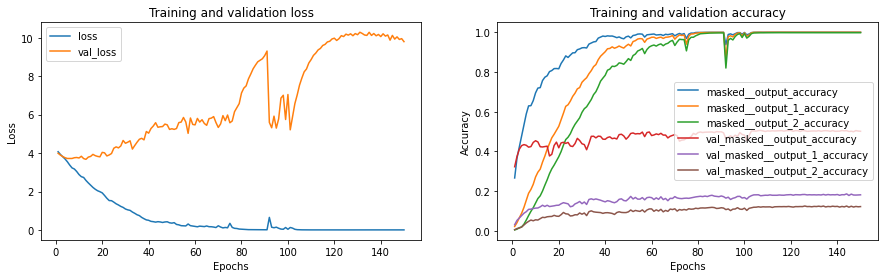

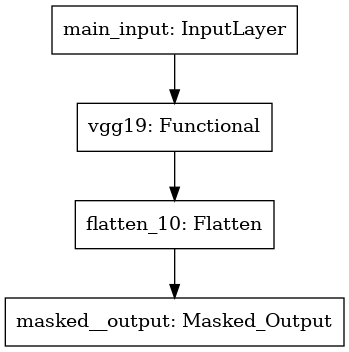

In [11]:
# Create the model
mcnn_top_down_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                   dataset.image_size,
                                                   dataset.taxonomy,
                                                   architecture='top_down',
                                                   conv_base=conv_base,
                                                   learning_rate=learning_rate)
mcnn_top_down_model.summary(line_length=110)
#train model
history_mcnn_top_down_model_model = mcnn_top_down_model.fit(dataset.train_dataset,
                                                            validation_data=dataset.val_dataset,
                                                            epochs=epochs,
                                                            callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_top_down_model_model)
plot_model(mcnn_top_down_model)


In [ ]:
# Create the model
mcnn_mnets_top_down_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                         dataset.image_size,
                                                         dataset.taxonomy,
                                                         architecture='top_down',
                                                         conv_base=conv_base,
                                                         learning_rate=learning_rate,
                                                         mnets=True)
mcnn_mnets_top_down_model.summary(line_length=110)
#train model
history_mcnn_mnets_top_down_model_model = mcnn_mnets_top_down_model.fit(dataset.train_dataset,
                                                                        validation_data=dataset.val_dataset,
                                                                        epochs=epochs,
                                                                        callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_mnets_top_down_model_model)
plot_model(mcnn_mnets_top_down_model)


Model: "mcnn_attention_bottom_up_model"
______________________________________________________________________________________________________________
Layer (type)                                     Output Shape                                Param #          
main_input (InputLayer)                          [(None, 64, 64, 3)]                         0                
______________________________________________________________________________________________________________
vgg19 (Functional)                               (None, None, None, 512)                     20024384         
______________________________________________________________________________________________________________
flatten (Flatten)                                (None, 2048)                                0                
______________________________________________________________________________________________________________
attention__masked__output (Attention_Masked_Outp [(None, 13), (None, 113

2021-10-10 12:56:53.252879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-10 12:56:55.356300: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


64/64 [==============================] - 33s 447ms/step - loss: 4.2290 - attention__masked__output_loss: 2.5150 - attention__masked__output_1_loss: 4.7267 - attention__masked__output_2_loss: 5.4452 - attention__masked__output_accuracy: 0.2130 - attention__masked__output_1_accuracy: 0.0172 - attention__masked__output_2_accuracy: 0.0068 - val_loss: 4.1602 - val_attention__masked__output_loss: 2.4164 - val_attention__masked__output_1_loss: 4.7260 - val_attention__masked__output_2_loss: 5.3381 - val_attention__masked__output_accuracy: 0.2460 - val_attention__masked__output_1_accuracy: 0.0214 - val_attention__masked__output_2_accuracy: 0.0067
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

2021-10-10 12:59:25.042855: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/mcnn_attention_bottom_up_model_stanford_cars_vgg19/assets
Epoch 5/150
64/64 [==============================] - 27s 423ms/step - loss: 3.9089 - attention__masked__output_loss: 2.0460 - attention__masked__output_1_loss: 4.7062 - attention__masked__output_2_loss: 4.9745 - attention__masked__output_accuracy: 0.3507 - attention__masked__output_1_accuracy: 0.0452 - attention__masked__output_2_accuracy: 0.0324 - val_loss: 3.9333 - val_attention__masked__output_loss: 2.0230 - val_attention__masked__output_1_loss: 4.6984 - val_attention__masked__output_2_loss: 5.0784 - val_attention__masked__output_accuracy: 0.3535 - val_attention__masked__output_1_accuracy: 0.0502 - val_attention__masked__output_2_accuracy: 0.0189
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+---------------------

64/64 [==============================] - 27s 422ms/step - loss: 3.0831 - attention__masked__output_loss: 1.6153 - attention__masked__output_1_loss: 3.8916 - attention__masked__output_2_loss: 3.7424 - attention__masked__output_accuracy: 0.5107 - attention__masked__output_1_accuracy: 0.2372 - attention__masked__output_2_accuracy: 0.2009 - val_loss: 3.7763 - val_attention__masked__output_loss: 2.1078 - val_attention__masked__output_1_loss: 4.3789 - val_attention__masked__output_2_loss: 4.8422 - val_attention__masked__output_accuracy: 0.4132 - val_attention__masked__output_1_accuracy: 0.1072 - val_attention__masked__output_2_accuracy: 0.0647
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0711 |       Consistency        | 0.5831 |            -             |   -    |
|       h-Precision        | 0.2124 |         h-Recall         | 0.2473 |        h-F1-Score        | 0.2259 |
|       Accuracy L_0       | 0.4386 |       Accuracy L_1       | 0.1269 |       Accuracy L_2       | 0.0913 |
|  HarmonicM Accuracy-k=1  | 0.1421 |  HarmonicM Accuracy-k=2  | 0.2247 |  HarmonicM Accuracy-k=5  | 0.3746 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_attention_bottom_up_model_stanford_cars_vgg19/assets
Epoch 26/150
64/64 [==============================] - 26s 413ms/step - loss: 1.8118 - attention__masked__output_loss: 0.9123 - attention__masked__output_1_loss: 2.1265 - attention__masked__output_2_loss: 2.3966 - attention__masked__output_accuracy: 0.7517 - attention__masked__output_1_accuracy: 0.5770 - attention__masked__output_2_accuracy: 0.4998 - val_loss: 3.7717 - val_attention__masked__output_loss: 2.3539 - val_attention__masked__output_1_loss: 4.4092 - val_attention__masked__output_2_loss: 4.5520 - val_attention__masked__output_accuracy: 0.4455 - val_attention__masked__output_1_accuracy: 0.1410 - val_attention__masked__output_2_accuracy: 0.0968
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0749 |       Consistency        | 0.6485 |            -             |   -    |
|       h-Precision        | 0.2153 |         h-Recall         | 0.2466 |        h-F1-Score        | 0.2274 |
|       Accuracy L_0       | 0.4308 |       Accuracy L_1       | 0.1368 |       Accuracy L_2       | 0.0945 |
|  HarmonicM Accuracy-k=1  | 0.1484 |  HarmonicM Accuracy-k=2  | 0.2361 |  HarmonicM Accuracy-k=5  | 0.4012 |
| Arithmet

64/64 [==============================] - 26s 415ms/step - loss: 1.1763 - attention__masked__output_loss: 0.5590 - attention__masked__output_1_loss: 1.2686 - attention__masked__output_2_loss: 1.7014 - attention__masked__output_accuracy: 0.8567 - attention__masked__output_1_accuracy: 0.7461 - attention__masked__output_2_accuracy: 0.6681 - val_loss: 4.3013 - val_attention__masked__output_loss: 3.0944 - val_attention__masked__output_1_loss: 5.0027 - val_attention__masked__output_2_loss: 4.8068 - val_attention__masked__output_accuracy: 0.4147 - val_attention__masked__output_1_accuracy: 0.1430 - val_attention__masked__output_2_accuracy: 0.0938
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0900 |       Consistency        | 0.7179 |            -             |   -    |
|       h-Precision        | 0.2252 |         h-Recall         | 0.2502 |        h-F1-Score        | 0.2349 |
|       Accuracy L_0       | 0.4376 |       Accuracy L_1       | 0.1510 |       Accuracy L_2       | 0.1052 |
|  HarmonicM Accuracy-k=1  | 0.1629 |  HarmonicM Accuracy-k=2  | 0.2491 |  HarmonicM Accuracy-k=5  | 0.4085 |
| Arithmet

64/64 [==============================] - 26s 405ms/step - loss: 0.8790 - attention__masked__output_loss: 0.4206 - attention__masked__output_1_loss: 0.8964 - attention__masked__output_2_loss: 1.3200 - attention__masked__output_accuracy: 0.9010 - attention__masked__output_1_accuracy: 0.8243 - attention__masked__output_2_accuracy: 0.7472 - val_loss: 4.9310 - val_attention__masked__output_loss: 3.7798 - val_attention__masked__output_1_loss: 6.0072 - val_attention__masked__output_2_loss: 5.0059 - val_attention__masked__output_accuracy: 0.4159 - val_attention__masked__output_1_accuracy: 0.1393 - val_attention__masked__output_2_accuracy: 0.0925
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0900 |       Consistency        | 0.8015 |            -             |   -    |
|       h-Precision        | 0.2127 |         h-Recall         | 0.2305 |        h-F1-Score        | 0.2196 |
|       Accuracy L_0       | 0.4065 |       Accuracy L_1       | 0.1408 |       Accuracy L_2       | 0.1000 |
|  HarmonicM Accuracy-k=1  | 0.1534 |  HarmonicM Accuracy-k=2  | 0.2454 |  HarmonicM Accuracy-k=5  | 0.4073 |
| Arithmet

64/64 [==============================] - 26s 408ms/step - loss: 0.4718 - attention__masked__output_loss: 0.1942 - attention__masked__output_1_loss: 0.4168 - attention__masked__output_2_loss: 0.8046 - attention__masked__output_accuracy: 0.9557 - attention__masked__output_1_accuracy: 0.9196 - attention__masked__output_2_accuracy: 0.8589 - val_loss: 5.2310 - val_attention__masked__output_loss: 4.1374 - val_attention__masked__output_1_loss: 6.5006 - val_attention__masked__output_2_loss: 5.0551 - val_attention__masked__output_accuracy: 0.4169 - val_attention__masked__output_1_accuracy: 0.1607 - val_attention__masked__output_2_accuracy: 0.1139
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 408ms/step - loss: 0.3545 - attention__masked__output_loss: 0.1465 - attention__masked__output_1_loss: 0.3093 - attention__masked__output_2_loss: 0.6077 - attention__masked__output_accuracy: 0.9681 - attention__masked__output_1_accuracy: 0.9412 - attention__masked__output_2_accuracy: 0.8907 - val_loss: 5.4684 - val_attention__masked__output_loss: 4.2273 - val_attention__masked__output_1_loss: 6.8741 - val_attention__masked__output_2_loss: 5.3037 - val_attention__masked__output_accuracy: 0.4080 - val_attention__masked__output_1_accuracy: 0.1475 - val_attention__masked__output_2_accuracy: 0.1075
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1047 |       Consistency        | 0.8299 |            -             |   -    |
|       h-Precision        | 0.2243 |         h-Recall         | 0.2378 |        h-F1-Score        | 0.2295 |
|       Accuracy L_0       | 0.4174 |       Accuracy L_1       | 0.1577 |       Accuracy L_2       | 0.1104 |
|  HarmonicM Accuracy-k=1  | 0.1686 |  HarmonicM Accuracy-k=2  | 0.2545 |  HarmonicM Accuracy-k=5  | 0.4172 |
| Arithmet

64/64 [==============================] - 26s 409ms/step - loss: 0.2370 - attention__masked__output_loss: 0.0914 - attention__masked__output_1_loss: 0.1795 - attention__masked__output_2_loss: 0.4401 - attention__masked__output_accuracy: 0.9823 - attention__masked__output_1_accuracy: 0.9637 - attention__masked__output_2_accuracy: 0.9235 - val_loss: 5.7547 - val_attention__masked__output_loss: 4.4356 - val_attention__masked__output_1_loss: 7.2532 - val_attention__masked__output_2_loss: 5.5753 - val_attention__masked__output_accuracy: 0.4114 - val_attention__masked__output_1_accuracy: 0.1445 - val_attention__masked__output_2_accuracy: 0.1075
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 410ms/step - loss: 0.2413 - attention__masked__output_loss: 0.1236 - attention__masked__output_1_loss: 0.1961 - attention__masked__output_2_loss: 0.4042 - attention__masked__output_accuracy: 0.9792 - attention__masked__output_1_accuracy: 0.9607 - attention__masked__output_2_accuracy: 0.9282 - val_loss: 5.4784 - val_attention__masked__output_loss: 3.8216 - val_attention__masked__output_1_loss: 7.0720 - val_attention__masked__output_2_loss: 5.5415 - val_attention__masked__output_accuracy: 0.4117 - val_attention__masked__output_1_accuracy: 0.1445 - val_attention__masked__output_2_accuracy: 0.1067
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 410ms/step - loss: 0.1903 - attention__masked__output_loss: 0.0990 - attention__masked__output_1_loss: 0.1406 - attention__masked__output_2_loss: 0.3312 - attention__masked__output_accuracy: 0.9833 - attention__masked__output_1_accuracy: 0.9724 - attention__masked__output_2_accuracy: 0.9435 - val_loss: 5.5071 - val_attention__masked__output_loss: 3.9695 - val_attention__masked__output_1_loss: 6.8353 - val_attention__masked__output_2_loss: 5.7165 - val_attention__masked__output_accuracy: 0.4100 - val_attention__masked__output_1_accuracy: 0.1388 - val_attention__masked__output_2_accuracy: 0.1062
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1147 |       Consistency        | 0.8764 |            -             |   -    |
|       h-Precision        | 0.2346 |         h-Recall         | 0.2446 |        h-F1-Score        | 0.2385 |
|       Accuracy L_0       | 0.4246 |       Accuracy L_1       | 0.1662 |       Accuracy L_2       | 0.1206 |
|  HarmonicM Accuracy-k=1  | 0.1801 |  HarmonicM Accuracy-k=2  | 0.2761 |  HarmonicM Accuracy-k=5  | 0.4298 |
| Arithmet

64/64 [==============================] - 26s 411ms/step - loss: 0.0918 - attention__masked__output_loss: 0.0298 - attention__masked__output_1_loss: 0.0585 - attention__masked__output_2_loss: 0.1870 - attention__masked__output_accuracy: 0.9957 - attention__masked__output_1_accuracy: 0.9901 - attention__masked__output_2_accuracy: 0.9729 - val_loss: 6.4671 - val_attention__masked__output_loss: 5.1661 - val_attention__masked__output_1_loss: 8.3018 - val_attention__masked__output_2_loss: 5.9335 - val_attention__masked__output_accuracy: 0.4261 - val_attention__masked__output_1_accuracy: 0.1627 - val_attention__masked__output_2_accuracy: 0.1187
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 410ms/step - loss: 0.1299 - attention__masked__output_loss: 0.0709 - attention__masked__output_1_loss: 0.0992 - attention__masked__output_2_loss: 0.2197 - attention__masked__output_accuracy: 0.9892 - attention__masked__output_1_accuracy: 0.9826 - attention__masked__output_2_accuracy: 0.9639 - val_loss: 5.6906 - val_attention__masked__output_loss: 4.1764 - val_attention__masked__output_1_loss: 7.0701 - val_attention__masked__output_2_loss: 5.8253 - val_attention__masked__output_accuracy: 0.4229 - val_attention__masked__output_1_accuracy: 0.1590 - val_attention__masked__output_2_accuracy: 0.1189
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 406ms/step - loss: 0.1147 - attention__masked__output_loss: 0.0664 - attention__masked__output_1_loss: 0.0795 - attention__masked__output_2_loss: 0.1982 - attention__masked__output_accuracy: 0.9905 - attention__masked__output_1_accuracy: 0.9856 - attention__masked__output_2_accuracy: 0.9707 - val_loss: 5.6054 - val_attention__masked__output_loss: 4.1472 - val_attention__masked__output_1_loss: 6.7114 - val_attention__masked__output_2_loss: 5.9574 - val_attention__masked__output_accuracy: 0.4002 - val_attention__masked__output_1_accuracy: 0.1470 - val_attention__masked__output_2_accuracy: 0.1087
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1139 |       Consistency        | 0.8806 |            -             |   -    |
|       h-Precision        | 0.2370 |         h-Recall         | 0.2472 |        h-F1-Score        | 0.2410 |
|       Accuracy L_0       | 0.4284 |       Accuracy L_1       | 0.1619 |       Accuracy L_2       | 0.1209 |
|  HarmonicM Accuracy-k=1  | 0.1788 |  HarmonicM Accuracy-k=2  | 0.2625 |  HarmonicM Accuracy-k=5  | 0.4269 |
| Arithmet

64/64 [==============================] - 26s 414ms/step - loss: 0.0786 - attention__masked__output_loss: 0.0408 - attention__masked__output_1_loss: 0.0579 - attention__masked__output_2_loss: 0.1370 - attention__masked__output_accuracy: 0.9945 - attention__masked__output_1_accuracy: 0.9893 - attention__masked__output_2_accuracy: 0.9811 - val_loss: 6.1503 - val_attention__masked__output_loss: 4.6346 - val_attention__masked__output_1_loss: 7.6889 - val_attention__masked__output_2_loss: 6.1274 - val_attention__masked__output_accuracy: 0.4159 - val_attention__masked__output_1_accuracy: 0.1537 - val_attention__masked__output_2_accuracy: 0.1209
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 407ms/step - loss: 0.1210 - attention__masked__output_loss: 0.0941 - attention__masked__output_1_loss: 0.0949 - attention__masked__output_2_loss: 0.1741 - attention__masked__output_accuracy: 0.9880 - attention__masked__output_1_accuracy: 0.9833 - attention__masked__output_2_accuracy: 0.9705 - val_loss: 5.4944 - val_attention__masked__output_loss: 3.8130 - val_attention__masked__output_1_loss: 6.6742 - val_attention__masked__output_2_loss: 5.9959 - val_attention__masked__output_accuracy: 0.4244 - val_attention__masked__output_1_accuracy: 0.1507 - val_attention__masked__output_2_accuracy: 0.1067
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1045 |       Consistency        | 0.8704 |            -             |   -    |
|       h-Precision        | 0.2262 |         h-Recall         | 0.2371 |        h-F1-Score        | 0.2305 |
|       Accuracy L_0       | 0.4154 |       Accuracy L_1       | 0.1507 |       Accuracy L_2       | 0.1127 |
|  HarmonicM Accuracy-k=1  | 0.1675 |  HarmonicM Accuracy-k=2  | 0.2609 |  HarmonicM Accuracy-k=5  | 0.4244 |
| Arithmet

64/64 [==============================] - 26s 408ms/step - loss: 0.0335 - attention__masked__output_loss: 0.0134 - attention__masked__output_1_loss: 0.0165 - attention__masked__output_2_loss: 0.0704 - attention__masked__output_accuracy: 0.9985 - attention__masked__output_1_accuracy: 0.9971 - attention__masked__output_2_accuracy: 0.9929 - val_loss: 6.7115 - val_attention__masked__output_loss: 5.3899 - val_attention__masked__output_1_loss: 8.4199 - val_attention__masked__output_2_loss: 6.3248 - val_attention__masked__output_accuracy: 0.4241 - val_attention__masked__output_1_accuracy: 0.1669 - val_attention__masked__output_2_accuracy: 0.1204
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 404ms/step - loss: 0.0749 - attention__masked__output_loss: 0.0433 - attention__masked__output_1_loss: 0.0510 - attention__masked__output_2_loss: 0.1304 - attention__masked__output_accuracy: 0.9948 - attention__masked__output_1_accuracy: 0.9912 - attention__masked__output_2_accuracy: 0.9828 - val_loss: 5.7552 - val_attention__masked__output_loss: 4.3755 - val_attention__masked__output_1_loss: 7.0198 - val_attention__masked__output_2_loss: 5.8704 - val_attention__masked__output_accuracy: 0.4286 - val_attention__masked__output_1_accuracy: 0.1649 - val_attention__masked__output_2_accuracy: 0.1221
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1321 |       Consistency        | 0.9132 |            -             |   -    |
|       h-Precision        | 0.2490 |         h-Recall         | 0.2564 |        h-F1-Score        | 0.2519 |
|       Accuracy L_0       | 0.4338 |       Accuracy L_1       | 0.1791 |       Accuracy L_2       | 0.1368 |
|  HarmonicM Accuracy-k=1  | 0.1974 |  HarmonicM Accuracy-k=2  | 0.3004 |  HarmonicM Accuracy-k=5  | 0.4638 |
| Arithmet

64/64 [==============================] - 26s 408ms/step - loss: 0.0042 - attention__masked__output_loss: 6.9085e-04 - attention__masked__output_1_loss: 0.0012 - attention__masked__output_2_loss: 0.0108 - attention__masked__output_accuracy: 0.9998 - attention__masked__output_1_accuracy: 0.9998 - attention__masked__output_2_accuracy: 0.9971 - val_loss: 8.9586 - val_attention__masked__output_loss: 7.8499 - val_attention__masked__output_1_loss: 11.8185 - val_attention__masked__output_2_loss: 7.2072 - val_attention__masked__output_accuracy: 0.4351 - val_attention__masked__output_1_accuracy: 0.1799 - val_attention__masked__output_2_accuracy: 0.1356
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1  

64/64 [==============================] - 26s 411ms/step - loss: 0.0036 - attention__masked__output_loss: 6.0347e-04 - attention__masked__output_1_loss: 0.0011 - attention__masked__output_2_loss: 0.0090 - attention__masked__output_accuracy: 0.9998 - attention__masked__output_1_accuracy: 0.9998 - attention__masked__output_2_accuracy: 0.9971 - val_loss: 9.6118 - val_attention__masked__output_loss: 8.4853 - val_attention__masked__output_1_loss: 12.8356 - val_attention__masked__output_2_loss: 7.5144 - val_attention__masked__output_accuracy: 0.4351 - val_attention__masked__output_1_accuracy: 0.1794 - val_attention__masked__output_2_accuracy: 0.1351
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1  

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1326 |       Consistency        | 0.9269 |            -             |   -    |
|       h-Precision        | 0.2483 |         h-Recall         | 0.2546 |        h-F1-Score        | 0.2508 |
|       Accuracy L_0       | 0.4351 |       Accuracy L_1       | 0.1786 |       Accuracy L_2       | 0.1361 |
|  HarmonicM Accuracy-k=1  | 0.1968 |  HarmonicM Accuracy-k=2  | 0.2985 |  HarmonicM Accuracy-k=5  | 0.4601 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_attention_bottom_up_model_stanford_cars_vgg19/assets
Epoch 147/150
64/64 [==============================] - 26s 413ms/step - loss: 0.0034 - attention__masked__output_loss: 4.7237e-04 - attention__masked__output_1_loss: 0.0011 - attention__masked__output_2_loss: 0.0087 - attention__masked__output_accuracy: 0.9998 - attention__masked__output_1_accuracy: 0.9998 - attention__masked__output_2_accuracy: 0.9971 - val_loss: 10.3074 - val_attention__masked__output_loss: 9.1742 - val_attention__masked__output_1_loss: 13.9118 - val_attention__masked__output_2_loss: 7.8362 - val_attention__masked__output_accuracy: 0.4336 - val_attention__masked__output_1_accuracy: 0.1781 - val_attention__masked__output_2_accuracy: 0.1376
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+-------------

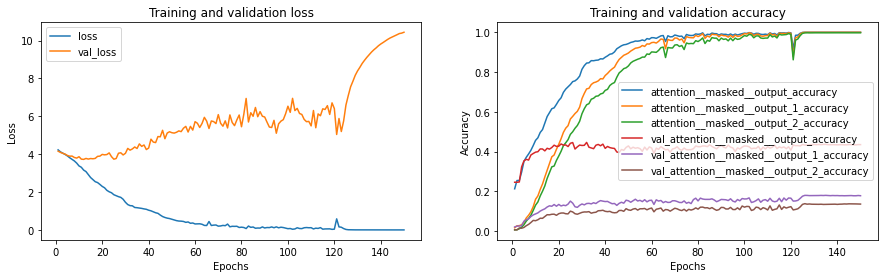

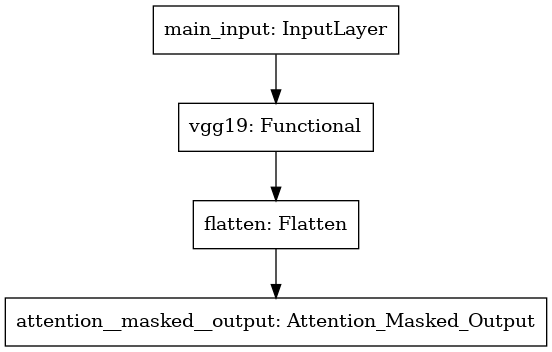

In [4]:
# Create the model
mcnn_attention_bottom_up_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                              dataset.image_size,
                                                              dataset.taxonomy,
                                                              architecture='bottom_up',
                                                              conv_base=conv_base,
                                                              learning_rate=learning_rate,
                                                              attention=True)
mcnn_attention_bottom_up_model.summary(line_length=110)
#train model
history_mcnn_attention_bottom_up_model_model = mcnn_attention_bottom_up_model.fit(dataset.train_dataset,
                                                              validation_data=dataset.val_dataset,
                                                              epochs=epochs,
                                                              callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_attention_bottom_up_model_model)
plot_model(mcnn_attention_bottom_up_model)


Model: "mcnn_attention_mnets_bottom_up_model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
main_input (InputLayer)             [(None, 64, 64, 3)]     0                                                 
______________________________________________________________________________________________________________
conv_base_mcnn_0 (Functional)       (None, None, None, 512) 20024384     main_input[0][0]                     
______________________________________________________________________________________________________________
conv_base_mcnn_1 (Functional)       (None, None, None, 512) 20024384     main_input[0][0]                     
______________________________________________________________________________________________________________
conv_base_mcnn_2 (Functional)       (None, None, None, 512) 200243

INFO:tensorflow:Assets written to: models/mcnn_attention_mnets_bottom_up_model_stanford_cars_vgg19/assets
Epoch 4/150
64/64 [==============================] - 26s 406ms/step - loss: 3.8148 - attention__masked__output_1_loss: 1.8171 - attention__masked__output_1_1_loss: 4.6119 - attention__masked__output_1_2_loss: 5.0155 - attention__masked__output_1_accuracy: 0.3945 - attention__masked__output_1_1_accuracy: 0.0562 - attention__masked__output_1_2_accuracy: 0.0378 - val_loss: 3.9580 - val_attention__masked__output_1_loss: 2.0150 - val_attention__masked__output_1_1_loss: 4.5966 - val_attention__masked__output_1_2_loss: 5.2623 - val_attention__masked__output_1_accuracy: 0.3704 - val_attention__masked__output_1_1_accuracy: 0.0637 - val_attention__masked__output_1_2_accuracy: 0.0249
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                        

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0279 |       Consistency        | 0.3090 |            -             |   -    |
|       h-Precision        | 0.1686 |         h-Recall         | 0.2284 |        h-F1-Score        | 0.1909 |
|       Accuracy L_0       | 0.4226 |       Accuracy L_1       | 0.0923 |       Accuracy L_2       | 0.0495 |
|  HarmonicM Accuracy-k=1  | 0.0898 |  HarmonicM Accuracy-k=2  | 0.1518 |  HarmonicM Accuracy-k=5  | 0.2574 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_attention_mnets_bottom_up_model_stanford_cars_vgg19/assets
Epoch 17/150
64/64 [==============================] - 26s 409ms/step - loss: 2.5976 - attention__masked__output_1_loss: 1.1383 - attention__masked__output_1_1_loss: 3.1915 - attention__masked__output_1_2_loss: 3.4631 - attention__masked__output_1_accuracy: 0.6664 - attention__masked__output_1_1_accuracy: 0.3582 - attention__masked__output_1_2_accuracy: 0.2841 - val_loss: 3.9685 - val_attention__masked__output_1_loss: 2.5631 - val_attention__masked__output_1_1_loss: 4.4674 - val_attention__masked__output_1_2_loss: 4.8750 - val_attention__masked__output_1_accuracy: 0.4299 - val_attention__masked__output_1_1_accuracy: 0.1169 - val_attention__masked__output_1_2_accuracy: 0.0664
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0555 |       Consistency        | 0.5097 |            -             |   -    |
|       h-Precision        | 0.1913 |         h-Recall         | 0.2306 |        h-F1-Score        | 0.2064 |
|       Accuracy L_0       | 0.4162 |       Accuracy L_1       | 0.1144 |       Accuracy L_2       | 0.0739 |
|  HarmonicM Accuracy-k=1  | 0.1216 |  HarmonicM Accuracy-k=2  | 0.1960 |  HarmonicM Accuracy-k=5  | 0.3259 |
| Arithmet

64/64 [==============================] - 27s 416ms/step - loss: 1.3538 - attention__masked__output_1_loss: 0.5497 - attention__masked__output_1_1_loss: 1.5183 - attention__masked__output_1_2_loss: 1.9934 - attention__masked__output_1_accuracy: 0.8567 - attention__masked__output_1_1_accuracy: 0.7019 - attention__masked__output_1_2_accuracy: 0.6126 - val_loss: 4.2029 - val_attention__masked__output_1_loss: 2.8960 - val_attention__masked__output_1_1_loss: 4.7091 - val_attention__masked__output_1_2_loss: 5.0036 - val_attention__masked__output_1_accuracy: 0.4587 - val_attention__masked__output_1_1_accuracy: 0.1458 - val_attention__masked__output_1_2_accuracy: 0.0918
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0699 |       Consistency        | 0.5818 |            -             |   -    |
|       h-Precision        | 0.2164 |         h-Recall         | 0.2517 |        h-F1-Score        | 0.2301 |
|       Accuracy L_0       | 0.4642 |       Accuracy L_1       | 0.1386 |       Accuracy L_2       | 0.0891 |
|  HarmonicM Accuracy-k=1  | 0.1456 |  HarmonicM Accuracy-k=2  | 0.2248 |  HarmonicM Accuracy-k=5  | 0.3662 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_attention_mnets_bottom_up_model_stanford_cars_vgg19/assets
Epoch 39/150
64/64 [==============================] - 26s 410ms/step - loss: 0.8660 - attention__masked__output_1_loss: 0.3454 - attention__masked__output_1_1_loss: 0.9106 - attention__masked__output_1_2_loss: 1.3418 - attention__masked__output_1_accuracy: 0.9190 - attention__masked__output_1_1_accuracy: 0.8231 - attention__masked__output_1_2_accuracy: 0.7409 - val_loss: 4.5188 - val_attention__masked__output_1_loss: 3.0029 - val_attention__masked__output_1_1_loss: 5.2402 - val_attention__masked__output_1_2_loss: 5.3134 - val_attention__masked__output_1_accuracy: 0.4281 - val_attention__masked__output_1_1_accuracy: 0.1274 - val_attention__masked__output_1_2_accuracy: 0.0843
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                       

64/64 [==============================] - 26s 407ms/step - loss: 0.5452 - attention__masked__output_1_loss: 0.2133 - attention__masked__output_1_1_loss: 0.5210 - attention__masked__output_1_2_loss: 0.9014 - attention__masked__output_1_accuracy: 0.9528 - attention__masked__output_1_1_accuracy: 0.8988 - attention__masked__output_1_2_accuracy: 0.8331 - val_loss: 5.0682 - val_attention__masked__output_1_loss: 3.4380 - val_attention__masked__output_1_1_loss: 6.0504 - val_attention__masked__output_1_2_loss: 5.7161 - val_attention__masked__output_1_accuracy: 0.4346 - val_attention__masked__output_1_1_accuracy: 0.1396 - val_attention__masked__output_1_2_accuracy: 0.0973
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0900 |       Consistency        | 0.7134 |            -             |   -    |
|       h-Precision        | 0.2164 |         h-Recall         | 0.2389 |        h-F1-Score        | 0.2251 |
|       Accuracy L_0       | 0.4313 |       Accuracy L_1       | 0.1413 |       Accuracy L_2       | 0.1000 |
|  HarmonicM Accuracy-k=1  | 0.1547 |  HarmonicM Accuracy-k=2  | 0.2311 |  HarmonicM Accuracy-k=5  | 0.3726 |
| Arithmet

64/64 [==============================] - 26s 414ms/step - loss: 0.3186 - attention__masked__output_1_loss: 0.1347 - attention__masked__output_1_1_loss: 0.2821 - attention__masked__output_1_2_loss: 0.5390 - attention__masked__output_1_accuracy: 0.9724 - attention__masked__output_1_1_accuracy: 0.9463 - attention__masked__output_1_2_accuracy: 0.9028 - val_loss: 5.8677 - val_attention__masked__output_1_loss: 4.1692 - val_attention__masked__output_1_1_loss: 6.9946 - val_attention__masked__output_1_2_loss: 6.4395 - val_attention__masked__output_1_accuracy: 0.4000 - val_attention__masked__output_1_1_accuracy: 0.1376 - val_attention__masked__output_1_2_accuracy: 0.0973
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0831 |       Consistency        | 0.7443 |            -             |   -    |
|       h-Precision        | 0.2055 |         h-Recall         | 0.2255 |        h-F1-Score        | 0.2133 |
|       Accuracy L_0       | 0.4117 |       Accuracy L_1       | 0.1348 |       Accuracy L_2       | 0.0923 |
|  HarmonicM Accuracy-k=1  | 0.1451 |  HarmonicM Accuracy-k=2  | 0.2266 |  HarmonicM Accuracy-k=5  | 0.3651 |
| Arithmet

64/64 [==============================] - 26s 410ms/step - loss: 0.2539 - attention__masked__output_1_loss: 0.1244 - attention__masked__output_1_1_loss: 0.2346 - attention__masked__output_1_2_loss: 0.4027 - attention__masked__output_1_accuracy: 0.9767 - attention__masked__output_1_1_accuracy: 0.9558 - attention__masked__output_1_2_accuracy: 0.9258 - val_loss: 5.5341 - val_attention__masked__output_1_loss: 3.7461 - val_attention__masked__output_1_1_loss: 6.2343 - val_attention__masked__output_1_2_loss: 6.6219 - val_attention__masked__output_1_accuracy: 0.4010 - val_attention__masked__output_1_1_accuracy: 0.1308 - val_attention__masked__output_1_2_accuracy: 0.0896
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1060 |       Consistency        | 0.7915 |            -             |   -    |
|       h-Precision        | 0.2269 |         h-Recall         | 0.2434 |        h-F1-Score        | 0.2332 |
|       Accuracy L_0       | 0.4353 |       Accuracy L_1       | 0.1600 |       Accuracy L_2       | 0.1104 |
|  HarmonicM Accuracy-k=1  | 0.1704 |  HarmonicM Accuracy-k=2  | 0.2543 |  HarmonicM Accuracy-k=5  | 0.4036 |
| Arithmet

64/64 [==============================] - 26s 407ms/step - loss: 0.1338 - attention__masked__output_1_loss: 0.0651 - attention__masked__output_1_1_loss: 0.1144 - attention__masked__output_1_2_loss: 0.2220 - attention__masked__output_1_accuracy: 0.9883 - attention__masked__output_1_1_accuracy: 0.9794 - attention__masked__output_1_2_accuracy: 0.9634 - val_loss: 5.5741 - val_attention__masked__output_1_loss: 3.7201 - val_attention__masked__output_1_1_loss: 6.3039 - val_attention__masked__output_1_2_loss: 6.6984 - val_attention__masked__output_1_accuracy: 0.4303 - val_attention__masked__output_1_1_accuracy: 0.1547 - val_attention__masked__output_1_2_accuracy: 0.1042
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0958 |       Consistency        | 0.8119 |            -             |   -    |
|       h-Precision        | 0.2177 |         h-Recall         | 0.2326 |        h-F1-Score        | 0.2235 |
|       Accuracy L_0       | 0.4224 |       Accuracy L_1       | 0.1483 |       Accuracy L_2       | 0.1007 |
|  HarmonicM Accuracy-k=1  | 0.1576 |  HarmonicM Accuracy-k=2  | 0.2423 |  HarmonicM Accuracy-k=5  | 0.3908 |
| Arithmet

64/64 [==============================] - 27s 414ms/step - loss: 0.0591 - attention__masked__output_1_loss: 0.0213 - attention__masked__output_1_1_loss: 0.0453 - attention__masked__output_1_2_loss: 0.1106 - attention__masked__output_1_accuracy: 0.9966 - attention__masked__output_1_1_accuracy: 0.9923 - attention__masked__output_1_2_accuracy: 0.9849 - val_loss: 6.2896 - val_attention__masked__output_1_loss: 4.5842 - val_attention__masked__output_1_1_loss: 7.3055 - val_attention__masked__output_1_2_loss: 6.9793 - val_attention__masked__output_1_accuracy: 0.4306 - val_attention__masked__output_1_1_accuracy: 0.1619 - val_attention__masked__output_1_2_accuracy: 0.1082
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0965 |       Consistency        | 0.8027 |            -             |   -    |
|       h-Precision        | 0.2155 |         h-Recall         | 0.2313 |        h-F1-Score        | 0.2216 |
|       Accuracy L_0       | 0.4087 |       Accuracy L_1       | 0.1560 |       Accuracy L_2       | 0.1020 |
|  HarmonicM Accuracy-k=1  | 0.1607 |  HarmonicM Accuracy-k=2  | 0.2396 |  HarmonicM Accuracy-k=5  | 0.3899 |
| Arithmet

64/64 [==============================] - 26s 413ms/step - loss: 0.1436 - attention__masked__output_1_loss: 0.0789 - attention__masked__output_1_1_loss: 0.1343 - attention__masked__output_1_2_loss: 0.2176 - attention__masked__output_1_accuracy: 0.9870 - attention__masked__output_1_1_accuracy: 0.9764 - attention__masked__output_1_2_accuracy: 0.9635 - val_loss: 5.3957 - val_attention__masked__output_1_loss: 3.6044 - val_attention__masked__output_1_1_loss: 6.0147 - val_attention__masked__output_1_2_loss: 6.5680 - val_attention__masked__output_1_accuracy: 0.4301 - val_attention__masked__output_1_1_accuracy: 0.1595 - val_attention__masked__output_1_2_accuracy: 0.1124
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0948 |       Consistency        | 0.7866 |            -             |   -    |
|       h-Precision        | 0.2187 |         h-Recall         | 0.2343 |        h-F1-Score        | 0.2248 |
|       Accuracy L_0       | 0.4321 |       Accuracy L_1       | 0.1488 |       Accuracy L_2       | 0.0993 |
|  HarmonicM Accuracy-k=1  | 0.1570 |  HarmonicM Accuracy-k=2  | 0.2462 |  HarmonicM Accuracy-k=5  | 0.3807 |
| Arithmet

64/64 [==============================] - 26s 413ms/step - loss: 0.1040 - attention__masked__output_1_loss: 0.0470 - attention__masked__output_1_1_loss: 0.0888 - attention__masked__output_1_2_loss: 0.1763 - attention__masked__output_1_accuracy: 0.9919 - attention__masked__output_1_1_accuracy: 0.9848 - attention__masked__output_1_2_accuracy: 0.9778 - val_loss: 5.5067 - val_attention__masked__output_1_loss: 3.6720 - val_attention__masked__output_1_1_loss: 6.0665 - val_attention__masked__output_1_2_loss: 6.7815 - val_attention__masked__output_1_accuracy: 0.4328 - val_attention__masked__output_1_1_accuracy: 0.1547 - val_attention__masked__output_1_2_accuracy: 0.1085
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1025 |       Consistency        | 0.7803 |            -             |   -    |
|       h-Precision        | 0.2190 |         h-Recall         | 0.2357 |        h-F1-Score        | 0.2255 |
|       Accuracy L_0       | 0.4139 |       Accuracy L_1       | 0.1545 |       Accuracy L_2       | 0.1095 |
|  HarmonicM Accuracy-k=1  | 0.1664 |  HarmonicM Accuracy-k=2  | 0.2485 |  HarmonicM Accuracy-k=5  | 0.3903 |
| Arithmet

64/64 [==============================] - 26s 409ms/step - loss: 0.1701 - attention__masked__output_1_loss: 0.1134 - attention__masked__output_1_1_loss: 0.1805 - attention__masked__output_1_2_loss: 0.2164 - attention__masked__output_1_accuracy: 0.9810 - attention__masked__output_1_1_accuracy: 0.9700 - attention__masked__output_1_2_accuracy: 0.9614 - val_loss: 5.2245 - val_attention__masked__output_1_loss: 3.0955 - val_attention__masked__output_1_1_loss: 5.7218 - val_attention__masked__output_1_2_loss: 6.8560 - val_attention__masked__output_1_accuracy: 0.4420 - val_attention__masked__output_1_1_accuracy: 0.1530 - val_attention__masked__output_1_2_accuracy: 0.1017
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1015 |       Consistency        | 0.7995 |            -             |   -    |
|       h-Precision        | 0.2226 |         h-Recall         | 0.2390 |        h-F1-Score        | 0.2290 |
|       Accuracy L_0       | 0.4246 |       Accuracy L_1       | 0.1592 |       Accuracy L_2       | 0.1072 |
|  HarmonicM Accuracy-k=1  | 0.1670 |  HarmonicM Accuracy-k=2  | 0.2511 |  HarmonicM Accuracy-k=5  | 0.4104 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_attention_mnets_bottom_up_model_stanford_cars_vgg19/assets
Epoch 119/150
64/64 [==============================] - 26s 413ms/step - loss: 0.0061 - attention__masked__output_1_loss: 8.5059e-04 - attention__masked__output_1_1_loss: 0.0030 - attention__masked__output_1_2_loss: 0.0146 - attention__masked__output_1_accuracy: 0.9998 - attention__masked__output_1_1_accuracy: 0.9994 - attention__masked__output_1_2_accuracy: 0.9967 - val_loss: 7.0885 - val_attention__masked__output_1_loss: 5.5523 - val_attention__masked__output_1_1_loss: 8.0243 - val_attention__masked__output_1_2_loss: 7.6891 - val_attention__masked__output_1_accuracy: 0.4095 - val_attention__masked__output_1_1_accuracy: 0.1674 - val_attention__masked__output_1_2_accuracy: 0.1187
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                  

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1167 |       Consistency        | 0.8823 |            -             |   -    |
|       h-Precision        | 0.2264 |         h-Recall         | 0.2356 |        h-F1-Score        | 0.2300 |
|       Accuracy L_0       | 0.4077 |       Accuracy L_1       | 0.1669 |       Accuracy L_2       | 0.1192 |
|  HarmonicM Accuracy-k=1  | 0.1782 |  HarmonicM Accuracy-k=2  | 0.2648 |  HarmonicM Accuracy-k=5  | 0.4169 |
| Arithmet

64/64 [==============================] - 26s 412ms/step - loss: 0.0709 - attention__masked__output_1_loss: 0.0373 - attention__masked__output_1_1_loss: 0.0831 - attention__masked__output_1_2_loss: 0.0923 - attention__masked__output_1_accuracy: 0.9942 - attention__masked__output_1_1_accuracy: 0.9881 - attention__masked__output_1_2_accuracy: 0.9832 - val_loss: 5.8423 - val_attention__masked__output_1_loss: 3.6703 - val_attention__masked__output_1_1_loss: 6.3032 - val_attention__masked__output_1_2_loss: 7.5536 - val_attention__masked__output_1_accuracy: 0.4015 - val_attention__masked__output_1_1_accuracy: 0.1351 - val_attention__masked__output_1_2_accuracy: 0.0950
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0933 |       Consistency        | 0.8239 |            -             |   -    |
|       h-Precision        | 0.2097 |         h-Recall         | 0.2229 |        h-F1-Score        | 0.2148 |
|       Accuracy L_0       | 0.4045 |       Accuracy L_1       | 0.1468 |       Accuracy L_2       | 0.0973 |
|  HarmonicM Accuracy-k=1  | 0.1533 |  HarmonicM Accuracy-k=2  | 0.2410 |  HarmonicM Accuracy-k=5  | 0.3920 |
| Arithmet

64/64 [==============================] - 26s 407ms/step - loss: 0.1008 - attention__masked__output_1_loss: 0.0621 - attention__masked__output_1_1_loss: 0.0984 - attention__masked__output_1_2_loss: 0.1418 - attention__masked__output_1_accuracy: 0.9893 - attention__masked__output_1_1_accuracy: 0.9847 - attention__masked__output_1_2_accuracy: 0.9783 - val_loss: 5.2649 - val_attention__masked__output_1_loss: 3.1235 - val_attention__masked__output_1_1_loss: 5.6965 - val_attention__masked__output_1_2_loss: 6.9748 - val_attention__masked__output_1_accuracy: 0.4291 - val_attention__masked__output_1_1_accuracy: 0.1435 - val_attention__masked__output_1_2_accuracy: 0.1037
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1077 |       Consistency        | 0.8209 |            -             |   -    |
|       h-Precision        | 0.2244 |         h-Recall         | 0.2379 |        h-F1-Score        | 0.2297 |
|       Accuracy L_0       | 0.4239 |       Accuracy L_1       | 0.1555 |       Accuracy L_2       | 0.1122 |
|  HarmonicM Accuracy-k=1  | 0.1694 |  HarmonicM Accuracy-k=2  | 0.2531 |  HarmonicM Accuracy-k=5  | 0.4096 |
| Arithmet

64/64 [==============================] - 26s 409ms/step - loss: 0.0049 - attention__masked__output_1_loss: 0.0010 - attention__masked__output_1_1_loss: 0.0021 - attention__masked__output_1_2_loss: 0.0114 - attention__masked__output_1_accuracy: 0.9999 - attention__masked__output_1_1_accuracy: 0.9998 - attention__masked__output_1_2_accuracy: 0.9972 - val_loss: 6.9805 - val_attention__masked__output_1_loss: 5.3432 - val_attention__masked__output_1_1_loss: 7.9313 - val_attention__masked__output_1_2_loss: 7.6670 - val_attention__masked__output_1_accuracy: 0.4147 - val_attention__masked__output_1_1_accuracy: 0.1624 - val_attention__masked__output_1_2_accuracy: 0.1201
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


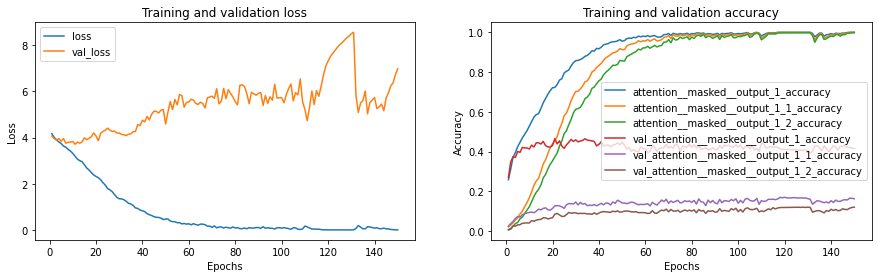

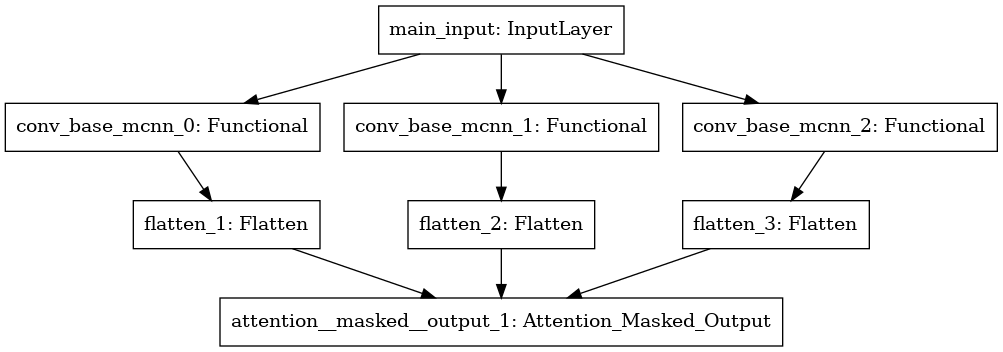

In [5]:
# Create the model
mcnn_attention_mnets_bottom_up_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                                    dataset.image_size,
                                                                    dataset.taxonomy,
                                                                    architecture='bottom_up',
                                                                    conv_base=conv_base,
                                                                    learning_rate=learning_rate,
                                                                    mnets=True,
                                                                    attention=True)
mcnn_attention_mnets_bottom_up_model.summary(line_length=110)
#train model
history_mcnn_attention_mnets_bottom_up_model = mcnn_attention_mnets_bottom_up_model.fit(dataset.train_dataset,
                                                                    validation_data=dataset.val_dataset,
                                                                    epochs=epochs,
                                                                    callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_attention_mnets_bottom_up_model)
plot_model(mcnn_attention_mnets_bottom_up_model)


Model: "mcnn_attention_top_down_model"
______________________________________________________________________________________________________________
Layer (type)                                     Output Shape                                Param #          
main_input (InputLayer)                          [(None, 64, 64, 3)]                         0                
______________________________________________________________________________________________________________
vgg19 (Functional)                               (None, None, None, 512)                     20024384         
______________________________________________________________________________________________________________
flatten_4 (Flatten)                              (None, 2048)                                0                
______________________________________________________________________________________________________________
attention__masked__output_2 (Attention_Masked_Ou [(None, 13), (None, 113)

INFO:tensorflow:Assets written to: models/mcnn_attention_top_down_model_stanford_cars_vgg19/assets
Epoch 5/150
64/64 [==============================] - 26s 404ms/step - loss: 3.5583 - attention__masked__output_2_loss: 1.3870 - attention__masked__output_2_1_loss: 4.0922 - attention__masked__output_2_2_loss: 5.1957 - attention__masked__output_2_accuracy: 0.5327 - attention__masked__output_2_1_accuracy: 0.1076 - attention__masked__output_2_2_accuracy: 0.0393 - val_loss: 3.7475 - val_attention__masked__output_2_loss: 1.6964 - val_attention__masked__output_2_1_loss: 4.3193 - val_attention__masked__output_2_2_loss: 5.2268 - val_attention__masked__output_2_accuracy: 0.4410 - val_attention__masked__output_2_1_accuracy: 0.0746 - val_attention__masked__output_2_2_accuracy: 0.0244
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |

64/64 [==============================] - 26s 407ms/step - loss: 2.7812 - attention__masked__output_2_loss: 0.9299 - attention__masked__output_2_1_loss: 3.0493 - attention__masked__output_2_2_loss: 4.3643 - attention__masked__output_2_accuracy: 0.7011 - attention__masked__output_2_1_accuracy: 0.2978 - attention__masked__output_2_2_accuracy: 0.1709 - val_loss: 4.0167 - val_attention__masked__output_2_loss: 1.9651 - val_attention__masked__output_2_1_loss: 4.7952 - val_attention__masked__output_2_2_loss: 5.2897 - val_attention__masked__output_2_accuracy: 0.4119 - val_attention__masked__output_2_1_accuracy: 0.1017 - val_attention__masked__output_2_2_accuracy: 0.0510
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0672 |       Consistency        | 0.7955 |            -             |   -    |
|       h-Precision        | 0.2195 |         h-Recall         | 0.2308 |        h-F1-Score        | 0.2242 |
|       Accuracy L_0       | 0.4644 |       Accuracy L_1       | 0.1276 |       Accuracy L_2       | 0.0774 |
|  HarmonicM Accuracy-k=1  | 0.1309 |  HarmonicM Accuracy-k=2  | 0.2059 |  HarmonicM Accuracy-k=5  | 0.3316 |
| Arithmet

64/64 [==============================] - 26s 406ms/step - loss: 1.6348 - attention__masked__output_2_loss: 0.4303 - attention__masked__output_2_1_loss: 1.7636 - attention__masked__output_2_2_loss: 2.7106 - attention__masked__output_2_accuracy: 0.8805 - attention__masked__output_2_1_accuracy: 0.5786 - attention__masked__output_2_2_accuracy: 0.4109 - val_loss: 4.2499 - val_attention__masked__output_2_loss: 1.9794 - val_attention__masked__output_2_1_loss: 5.0635 - val_attention__masked__output_2_2_loss: 5.7067 - val_attention__masked__output_2_accuracy: 0.4264 - val_attention__masked__output_2_1_accuracy: 0.1194 - val_attention__masked__output_2_2_accuracy: 0.0714
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0677 |       Consistency        | 0.8249 |            -             |   -    |
|       h-Precision        | 0.2234 |         h-Recall         | 0.2342 |        h-F1-Score        | 0.2279 |
|       Accuracy L_0       | 0.4657 |       Accuracy L_1       | 0.1353 |       Accuracy L_2       | 0.0786 |
|  HarmonicM Accuracy-k=1  | 0.1348 |  HarmonicM Accuracy-k=2  | 0.2200 |  HarmonicM Accuracy-k=5  | 0.3582 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_attention_top_down_model_stanford_cars_vgg19/assets
Epoch 35/150
64/64 [==============================] - 26s 408ms/step - loss: 1.0116 - attention__masked__output_2_loss: 0.2526 - attention__masked__output_2_1_loss: 1.1030 - attention__masked__output_2_2_loss: 1.6792 - attention__masked__output_2_accuracy: 0.9392 - attention__masked__output_2_1_accuracy: 0.7650 - attention__masked__output_2_2_accuracy: 0.6013 - val_loss: 4.8338 - val_attention__masked__output_2_loss: 2.1051 - val_attention__masked__output_2_1_loss: 5.6377 - val_attention__masked__output_2_2_loss: 6.7585 - val_attention__masked__output_2_accuracy: 0.4483 - val_attention__masked__output_2_1_accuracy: 0.1274 - val_attention__masked__output_2_2_accuracy: 0.0801
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0818 |       Consistency        | 0.8562 |            -             |   -    |
|       h-Precision        | 0.2303 |         h-Recall         | 0.2390 |        h-F1-Score        | 0.2340 |
|       Accuracy L_0       | 0.4647 |       Accuracy L_1       | 0.1448 |       Accuracy L_2       | 0.0905 |
|  HarmonicM Accuracy-k=1  | 0.1492 |  HarmonicM Accuracy-k=2  | 0.2300 |  HarmonicM Accuracy-k=5  | 0.3597 |
| Arithmet

64/64 [==============================] - 26s 412ms/step - loss: 0.5734 - attention__masked__output_2_loss: 0.1495 - attention__masked__output_2_1_loss: 0.6310 - attention__masked__output_2_2_loss: 0.9398 - attention__masked__output_2_accuracy: 0.9645 - attention__masked__output_2_1_accuracy: 0.8888 - attention__masked__output_2_2_accuracy: 0.7642 - val_loss: 5.0765 - val_attention__masked__output_2_loss: 2.2521 - val_attention__masked__output_2_1_loss: 5.9103 - val_attention__masked__output_2_2_loss: 7.0670 - val_attention__masked__output_2_accuracy: 0.4244 - val_attention__masked__output_2_1_accuracy: 0.1361 - val_attention__masked__output_2_2_accuracy: 0.0935
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0856 |       Consistency        | 0.8438 |            -             |   -    |
|       h-Precision        | 0.2223 |         h-Recall         | 0.2306 |        h-F1-Score        | 0.2258 |
|       Accuracy L_0       | 0.4318 |       Accuracy L_1       | 0.1480 |       Accuracy L_2       | 0.0943 |
|  HarmonicM Accuracy-k=1  | 0.1524 |  HarmonicM Accuracy-k=2  | 0.2343 |  HarmonicM Accuracy-k=5  | 0.3645 |
| Arithmet

64/64 [==============================] - 26s 411ms/step - loss: 0.3843 - attention__masked__output_2_loss: 0.0984 - attention__masked__output_2_1_loss: 0.4269 - attention__masked__output_2_2_loss: 0.6278 - attention__masked__output_2_accuracy: 0.9808 - attention__masked__output_2_1_accuracy: 0.9338 - attention__masked__output_2_2_accuracy: 0.8436 - val_loss: 5.0828 - val_attention__masked__output_2_loss: 2.2531 - val_attention__masked__output_2_1_loss: 5.9751 - val_attention__masked__output_2_2_loss: 7.0204 - val_attention__masked__output_2_accuracy: 0.4271 - val_attention__masked__output_2_1_accuracy: 0.1468 - val_attention__masked__output_2_2_accuracy: 0.0898
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0764 |       Consistency        | 0.8495 |            -             |   -    |
|       h-Precision        | 0.2145 |         h-Recall         | 0.2231 |        h-F1-Score        | 0.2181 |
|       Accuracy L_0       | 0.4289 |       Accuracy L_1       | 0.1371 |       Accuracy L_2       | 0.0846 |
|  HarmonicM Accuracy-k=1  | 0.1399 |  HarmonicM Accuracy-k=2  | 0.2171 |  HarmonicM Accuracy-k=5  | 0.3506 |
| Arithmet

64/64 [==============================] - 26s 407ms/step - loss: 0.3217 - attention__masked__output_2_loss: 0.0874 - attention__masked__output_2_1_loss: 0.3537 - attention__masked__output_2_2_loss: 0.5242 - attention__masked__output_2_accuracy: 0.9837 - attention__masked__output_2_1_accuracy: 0.9476 - attention__masked__output_2_2_accuracy: 0.8784 - val_loss: 5.0188 - val_attention__masked__output_2_loss: 2.2939 - val_attention__masked__output_2_1_loss: 5.7244 - val_attention__masked__output_2_2_loss: 7.0382 - val_attention__masked__output_2_accuracy: 0.4654 - val_attention__masked__output_2_1_accuracy: 0.1530 - val_attention__masked__output_2_2_accuracy: 0.0935
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0828 |       Consistency        | 0.8652 |            -             |   -    |
|       h-Precision        | 0.2306 |         h-Recall         | 0.2380 |        h-F1-Score        | 0.2337 |
|       Accuracy L_0       | 0.4619 |       Accuracy L_1       | 0.1448 |       Accuracy L_2       | 0.0891 |
|  HarmonicM Accuracy-k=1  | 0.1478 |  HarmonicM Accuracy-k=2  | 0.2287 |  HarmonicM Accuracy-k=5  | 0.3696 |
| Arithmet

64/64 [==============================] - 26s 406ms/step - loss: 0.2006 - attention__masked__output_2_loss: 0.0568 - attention__masked__output_2_1_loss: 0.2241 - attention__masked__output_2_2_loss: 0.3209 - attention__masked__output_2_accuracy: 0.9875 - attention__masked__output_2_1_accuracy: 0.9727 - attention__masked__output_2_2_accuracy: 0.9300 - val_loss: 6.0333 - val_attention__masked__output_2_loss: 2.6692 - val_attention__masked__output_2_1_loss: 6.7425 - val_attention__masked__output_2_2_loss: 8.6883 - val_attention__masked__output_2_accuracy: 0.4572 - val_attention__masked__output_2_1_accuracy: 0.1445 - val_attention__masked__output_2_2_accuracy: 0.0886
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0734 |       Consistency        | 0.8498 |            -             |   -    |
|       h-Precision        | 0.2251 |         h-Recall         | 0.2337 |        h-F1-Score        | 0.2287 |
|       Accuracy L_0       | 0.4575 |       Accuracy L_1       | 0.1400 |       Accuracy L_2       | 0.0831 |
|  HarmonicM Accuracy-k=1  | 0.1404 |  HarmonicM Accuracy-k=2  | 0.2255 |  HarmonicM Accuracy-k=5  | 0.3564 |
| Arithmet

64/64 [==============================] - 26s 409ms/step - loss: 0.1934 - attention__masked__output_2_loss: 0.0545 - attention__masked__output_2_1_loss: 0.2163 - attention__masked__output_2_2_loss: 0.3095 - attention__masked__output_2_accuracy: 0.9892 - attention__masked__output_2_1_accuracy: 0.9704 - attention__masked__output_2_2_accuracy: 0.9389 - val_loss: 5.0517 - val_attention__masked__output_2_loss: 2.2980 - val_attention__masked__output_2_1_loss: 5.8695 - val_attention__masked__output_2_2_loss: 6.9875 - val_attention__masked__output_2_accuracy: 0.4647 - val_attention__masked__output_2_1_accuracy: 0.1507 - val_attention__masked__output_2_2_accuracy: 0.0925
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0948 |       Consistency        | 0.9057 |            -             |   -    |
|       h-Precision        | 0.2499 |         h-Recall         | 0.2557 |        h-F1-Score        | 0.2523 |
|       Accuracy L_0       | 0.4930 |       Accuracy L_1       | 0.1612 |       Accuracy L_2       | 0.1015 |
|  HarmonicM Accuracy-k=1  | 0.1659 |  HarmonicM Accuracy-k=2  | 0.2534 |  HarmonicM Accuracy-k=5  | 0.3924 |
| Arithmet

64/64 [==============================] - 26s 410ms/step - loss: 0.1773 - attention__masked__output_2_loss: 0.0470 - attention__masked__output_2_1_loss: 0.1850 - attention__masked__output_2_2_loss: 0.2999 - attention__masked__output_2_accuracy: 0.9880 - attention__masked__output_2_1_accuracy: 0.9711 - attention__masked__output_2_2_accuracy: 0.9436 - val_loss: 5.5758 - val_attention__masked__output_2_loss: 2.4946 - val_attention__masked__output_2_1_loss: 6.4530 - val_attention__masked__output_2_2_loss: 7.7798 - val_attention__masked__output_2_accuracy: 0.4592 - val_attention__masked__output_2_1_accuracy: 0.1428 - val_attention__masked__output_2_2_accuracy: 0.0930
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0923 |       Consistency        | 0.9102 |            -             |   -    |
|       h-Precision        | 0.2431 |         h-Recall         | 0.2491 |        h-F1-Score        | 0.2456 |
|       Accuracy L_0       | 0.4803 |       Accuracy L_1       | 0.1542 |       Accuracy L_2       | 0.0998 |
|  HarmonicM Accuracy-k=1  | 0.1614 |  HarmonicM Accuracy-k=2  | 0.2455 |  HarmonicM Accuracy-k=5  | 0.3859 |
| Arithmet

64/64 [==============================] - 26s 406ms/step - loss: 0.0915 - attention__masked__output_2_loss: 0.0308 - attention__masked__output_2_1_loss: 0.1151 - attention__masked__output_2_2_loss: 0.1287 - attention__masked__output_2_accuracy: 0.9946 - attention__masked__output_2_1_accuracy: 0.9894 - attention__masked__output_2_2_accuracy: 0.9790 - val_loss: 6.6222 - val_attention__masked__output_2_loss: 2.7612 - val_attention__masked__output_2_1_loss: 7.3394 - val_attention__masked__output_2_2_loss: 9.7660 - val_attention__masked__output_2_accuracy: 0.4920 - val_attention__masked__output_2_1_accuracy: 0.1619 - val_attention__masked__output_2_2_accuracy: 0.1005
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0915 |       Consistency        | 0.9007 |            -             |   -    |
|       h-Precision        | 0.2456 |         h-Recall         | 0.2510 |        h-F1-Score        | 0.2478 |
|       Accuracy L_0       | 0.4838 |       Accuracy L_1       | 0.1592 |       Accuracy L_2       | 0.0980 |
|  HarmonicM Accuracy-k=1  | 0.1617 |  HarmonicM Accuracy-k=2  | 0.2483 |  HarmonicM Accuracy-k=5  | 0.3883 |
| Arithmet

64/64 [==============================] - 26s 407ms/step - loss: 0.0126 - attention__masked__output_2_loss: 0.0049 - attention__masked__output_2_1_loss: 0.0141 - attention__masked__output_2_2_loss: 0.0189 - attention__masked__output_2_accuracy: 0.9996 - attention__masked__output_2_1_accuracy: 0.9993 - attention__masked__output_2_2_accuracy: 0.9962 - val_loss: 8.4052 - val_attention__masked__output_2_loss: 3.2042 - val_attention__masked__output_2_1_loss: 9.0631 - val_attention__masked__output_2_2_loss: 12.9482 - val_attention__masked__output_2_accuracy: 0.4978 - val_attention__masked__output_2_1_accuracy: 0.1721 - val_attention__masked__output_2_2_accuracy: 0.1122
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0945 |       Consistency        | 0.8838 |            -             |   -    |
|       h-Precision        | 0.2426 |         h-Recall         | 0.2496 |        h-F1-Score        | 0.2455 |
|       Accuracy L_0       | 0.4714 |       Accuracy L_1       | 0.1595 |       Accuracy L_2       | 0.1027 |
|  HarmonicM Accuracy-k=1  | 0.1655 |  HarmonicM Accuracy-k=2  | 0.2472 |  HarmonicM Accuracy-k=5  | 0.3889 |
| Arithmet

64/64 [==============================] - 26s 414ms/step - loss: 0.1552 - attention__masked__output_2_loss: 0.0520 - attention__masked__output_2_1_loss: 0.1816 - attention__masked__output_2_2_loss: 0.2319 - attention__masked__output_2_accuracy: 0.9861 - attention__masked__output_2_1_accuracy: 0.9770 - attention__masked__output_2_2_accuracy: 0.9634 - val_loss: 5.2943 - val_attention__masked__output_2_loss: 2.4617 - val_attention__masked__output_2_1_loss: 6.1838 - val_attention__masked__output_2_2_loss: 7.2374 - val_attention__masked__output_2_accuracy: 0.4786 - val_attention__masked__output_2_1_accuracy: 0.1560 - val_attention__masked__output_2_2_accuracy: 0.1025
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0928 |       Consistency        | 0.8876 |            -             |   -    |
|       h-Precision        | 0.2455 |         h-Recall         | 0.2526 |        h-F1-Score        | 0.2485 |
|       Accuracy L_0       | 0.4871 |       Accuracy L_1       | 0.1542 |       Accuracy L_2       | 0.1005 |
|  HarmonicM Accuracy-k=1  | 0.1623 |  HarmonicM Accuracy-k=2  | 0.2499 |  HarmonicM Accuracy-k=5  | 0.3807 |
| Arithmet

64/64 [==============================] - 26s 416ms/step - loss: 0.1231 - attention__masked__output_2_loss: 0.0405 - attention__masked__output_2_1_loss: 0.1424 - attention__masked__output_2_2_loss: 0.1864 - attention__masked__output_2_accuracy: 0.9897 - attention__masked__output_2_1_accuracy: 0.9804 - attention__masked__output_2_2_accuracy: 0.9709 - val_loss: 5.5395 - val_attention__masked__output_2_loss: 2.6007 - val_attention__masked__output_2_1_loss: 6.3523 - val_attention__masked__output_2_2_loss: 7.6656 - val_attention__masked__output_2_accuracy: 0.4764 - val_attention__masked__output_2_1_accuracy: 0.1520 - val_attention__masked__output_2_2_accuracy: 0.0950
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0940 |       Consistency        | 0.8955 |            -             |   -    |
|       h-Precision        | 0.2376 |         h-Recall         | 0.2439 |        h-F1-Score        | 0.2402 |
|       Accuracy L_0       | 0.4637 |       Accuracy L_1       | 0.1515 |       Accuracy L_2       | 0.1007 |
|  HarmonicM Accuracy-k=1  | 0.1606 |  HarmonicM Accuracy-k=2  | 0.2394 |  HarmonicM Accuracy-k=5  | 0.3762 |
| Arithmet

64/64 [==============================] - 26s 409ms/step - loss: 0.0104 - attention__masked__output_2_loss: 0.0028 - attention__masked__output_2_1_loss: 0.0119 - attention__masked__output_2_2_loss: 0.0165 - attention__masked__output_2_accuracy: 0.9999 - attention__masked__output_2_1_accuracy: 0.9998 - attention__masked__output_2_2_accuracy: 0.9969 - val_loss: 7.6280 - val_attention__masked__output_2_loss: 3.1268 - val_attention__masked__output_2_1_loss: 8.3397 - val_attention__masked__output_2_2_loss: 11.4176 - val_attention__masked__output_2_accuracy: 0.4985 - val_attention__masked__output_2_1_accuracy: 0.1704 - val_attention__masked__output_2_2_accuracy: 0.1157
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0898 |       Consistency        | 0.9030 |            -             |   -    |
|       h-Precision        | 0.2472 |         h-Recall         | 0.2529 |        h-F1-Score        | 0.2496 |
|       Accuracy L_0       | 0.4925 |       Accuracy L_1       | 0.1582 |       Accuracy L_2       | 0.0950 |
|  HarmonicM Accuracy-k=1  | 0.1589 |  HarmonicM Accuracy-k=2  | 0.2466 |  HarmonicM Accuracy-k=5  | 0.3888 |
| Arithmet

64/64 [==============================] - 26s 408ms/step - loss: 0.0093 - attention__masked__output_2_loss: 0.0030 - attention__masked__output_2_1_loss: 0.0122 - attention__masked__output_2_2_loss: 0.0128 - attention__masked__output_2_accuracy: 0.9999 - attention__masked__output_2_1_accuracy: 0.9999 - attention__masked__output_2_2_accuracy: 0.9971 - val_loss: 7.2958 - val_attention__masked__output_2_loss: 3.0541 - val_attention__masked__output_2_1_loss: 8.0551 - val_attention__masked__output_2_2_loss: 10.7781 - val_attention__masked__output_2_accuracy: 0.5012 - val_attention__masked__output_2_1_accuracy: 0.1731 - val_attention__masked__output_2_2_accuracy: 0.1149
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

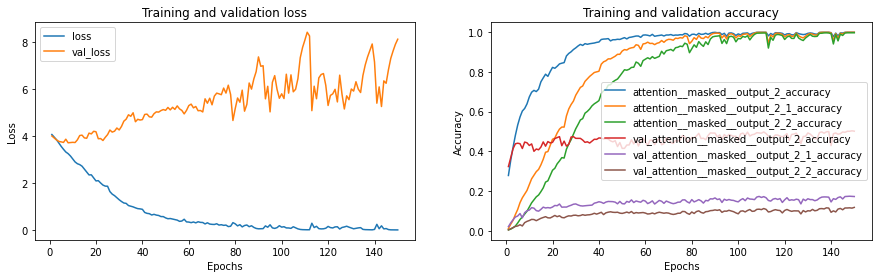

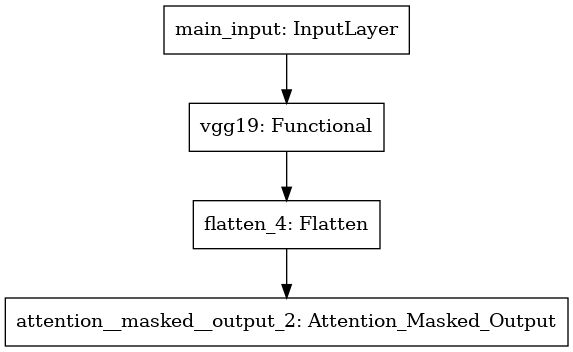

In [6]:
# Create the model
mcnn_attention_top_down_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                             dataset.image_size,
                                                             dataset.taxonomy,
                                                             architecture='top_down',
                                                             conv_base=conv_base,
                                                             learning_rate=learning_rate,
                                                             attention=True)
mcnn_attention_top_down_model.summary(line_length=110)
#train model
history_mcnn_attention_top_down_model_model = mcnn_attention_top_down_model.fit(dataset.train_dataset,
                                                            validation_data=dataset.val_dataset,
                                                            epochs=epochs,
                                                            callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_attention_top_down_model_model)
plot_model(mcnn_attention_top_down_model)


Model: "mcnn_attention_mnets_top_down_model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
main_input (InputLayer)             [(None, 64, 64, 3)]     0                                                 
______________________________________________________________________________________________________________
conv_base_mcnn_0 (Functional)       (None, None, None, 512) 20024384     main_input[0][0]                     
______________________________________________________________________________________________________________
conv_base_mcnn_1 (Functional)       (None, None, None, 512) 20024384     main_input[0][0]                     
______________________________________________________________________________________________________________
conv_base_mcnn_2 (Functional)       (None, None, None, 512) 2002438

INFO:tensorflow:Assets written to: models/mcnn_attention_mnets_top_down_model_stanford_cars_vgg19/assets
Epoch 4/150
64/64 [==============================] - 26s 405ms/step - loss: 3.6080 - attention__masked__output_3_loss: 1.4579 - attention__masked__output_3_1_loss: 4.1484 - attention__masked__output_3_2_loss: 5.2176 - attention__masked__output_3_accuracy: 0.5097 - attention__masked__output_3_1_accuracy: 0.1042 - attention__masked__output_3_2_accuracy: 0.0346 - val_loss: 3.7776 - val_attention__masked__output_3_loss: 1.7450 - val_attention__masked__output_3_1_loss: 4.3501 - val_attention__masked__output_3_2_loss: 5.2378 - val_attention__masked__output_3_accuracy: 0.4266 - val_attention__masked__output_3_1_accuracy: 0.0761 - val_attention__masked__output_3_2_accuracy: 0.0264
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                         

64/64 [==============================] - 26s 411ms/step - loss: 2.6041 - attention__masked__output_3_loss: 0.9042 - attention__masked__output_3_1_loss: 2.7705 - attention__masked__output_3_2_loss: 4.1376 - attention__masked__output_3_accuracy: 0.7261 - attention__masked__output_3_1_accuracy: 0.3541 - attention__masked__output_3_2_accuracy: 0.2123 - val_loss: 3.8743 - val_attention__masked__output_3_loss: 1.7669 - val_attention__masked__output_3_1_loss: 4.5778 - val_attention__masked__output_3_2_loss: 5.2783 - val_attention__masked__output_3_accuracy: 0.4485 - val_attention__masked__output_3_1_accuracy: 0.1109 - val_attention__masked__output_3_2_accuracy: 0.0582
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0672 |       Consistency        | 0.8149 |            -             |   -    |
|       h-Precision        | 0.2146 |         h-Recall         | 0.2258 |        h-F1-Score        | 0.2193 |
|       Accuracy L_0       | 0.4415 |       Accuracy L_1       | 0.1341 |       Accuracy L_2       | 0.0756 |
|  HarmonicM Accuracy-k=1  | 0.1307 |  HarmonicM Accuracy-k=2  | 0.2046 |  HarmonicM Accuracy-k=5  | 0.3312 |
| Arithmet

64/64 [==============================] - 26s 405ms/step - loss: 1.1083 - attention__masked__output_3_loss: 0.4019 - attention__masked__output_3_1_loss: 1.1385 - attention__masked__output_3_2_loss: 1.7846 - attention__masked__output_3_accuracy: 0.9107 - attention__masked__output_3_1_accuracy: 0.7560 - attention__masked__output_3_2_accuracy: 0.5944 - val_loss: 4.3585 - val_attention__masked__output_3_loss: 1.9791 - val_attention__masked__output_3_1_loss: 5.2729 - val_attention__masked__output_3_2_loss: 5.8236 - val_attention__masked__output_3_accuracy: 0.4269 - val_attention__masked__output_3_1_accuracy: 0.1366 - val_attention__masked__output_3_2_accuracy: 0.0833
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0764 |       Consistency        | 0.8129 |            -             |   -    |
|       h-Precision        | 0.2180 |         h-Recall         | 0.2280 |        h-F1-Score        | 0.2222 |
|       Accuracy L_0       | 0.4391 |       Accuracy L_1       | 0.1353 |       Accuracy L_2       | 0.0848 |
|  HarmonicM Accuracy-k=1  | 0.1398 |  HarmonicM Accuracy-k=2  | 0.2098 |  HarmonicM Accuracy-k=5  | 0.3446 |
| Arithmet

64/64 [==============================] - 26s 410ms/step - loss: 0.7806 - attention__masked__output_3_loss: 0.3270 - attention__masked__output_3_1_loss: 0.7953 - attention__masked__output_3_2_loss: 1.2195 - attention__masked__output_3_accuracy: 0.9327 - attention__masked__output_3_1_accuracy: 0.8448 - attention__masked__output_3_2_accuracy: 0.7191 - val_loss: 4.8052 - val_attention__masked__output_3_loss: 2.4803 - val_attention__masked__output_3_1_loss: 5.7223 - val_attention__masked__output_3_2_loss: 6.2128 - val_attention__masked__output_3_accuracy: 0.4423 - val_attention__masked__output_3_1_accuracy: 0.1420 - val_attention__masked__output_3_2_accuracy: 0.0871
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0766 |       Consistency        | 0.8595 |            -             |   -    |
|       h-Precision        | 0.2210 |         h-Recall         | 0.2290 |        h-F1-Score        | 0.2243 |
|       Accuracy L_0       | 0.4425 |       Accuracy L_1       | 0.1400 |       Accuracy L_2       | 0.0851 |
|  HarmonicM Accuracy-k=1  | 0.1418 |  HarmonicM Accuracy-k=2  | 0.2202 |  HarmonicM Accuracy-k=5  | 0.3414 |
| Arithmet

64/64 [==============================] - 26s 414ms/step - loss: 0.4294 - attention__masked__output_3_loss: 0.2179 - attention__masked__output_3_1_loss: 0.4286 - attention__masked__output_3_2_loss: 0.6416 - attention__masked__output_3_accuracy: 0.9584 - attention__masked__output_3_1_accuracy: 0.9301 - attention__masked__output_3_2_accuracy: 0.8495 - val_loss: 5.1678 - val_attention__masked__output_3_loss: 2.2895 - val_attention__masked__output_3_1_loss: 6.1395 - val_attention__masked__output_3_2_loss: 7.0745 - val_attention__masked__output_3_accuracy: 0.4575 - val_attention__masked__output_3_1_accuracy: 0.1473 - val_attention__masked__output_3_2_accuracy: 0.0908
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0816 |       Consistency        | 0.8662 |            -             |   -    |
|       h-Precision        | 0.2271 |         h-Recall         | 0.2349 |        h-F1-Score        | 0.2304 |
|       Accuracy L_0       | 0.4510 |       Accuracy L_1       | 0.1430 |       Accuracy L_2       | 0.0898 |
|  HarmonicM Accuracy-k=1  | 0.1475 |  HarmonicM Accuracy-k=2  | 0.2260 |  HarmonicM Accuracy-k=5  | 0.3563 |
| Arithmet

64/64 [==============================] - 26s 407ms/step - loss: 0.3076 - attention__masked__output_3_loss: 0.1839 - attention__masked__output_3_1_loss: 0.3075 - attention__masked__output_3_2_loss: 0.4316 - attention__masked__output_3_accuracy: 0.9683 - attention__masked__output_3_1_accuracy: 0.9536 - attention__masked__output_3_2_accuracy: 0.9129 - val_loss: 5.5369 - val_attention__masked__output_3_loss: 2.3277 - val_attention__masked__output_3_1_loss: 6.4195 - val_attention__masked__output_3_2_loss: 7.8636 - val_attention__masked__output_3_accuracy: 0.4682 - val_attention__masked__output_3_1_accuracy: 0.1527 - val_attention__masked__output_3_2_accuracy: 0.0896
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0861 |       Consistency        | 0.8729 |            -             |   -    |
|       h-Precision        | 0.2338 |         h-Recall         | 0.2414 |        h-F1-Score        | 0.2370 |
|       Accuracy L_0       | 0.4629 |       Accuracy L_1       | 0.1520 |       Accuracy L_2       | 0.0918 |
|  HarmonicM Accuracy-k=1  | 0.1528 |  HarmonicM Accuracy-k=2  | 0.2300 |  HarmonicM Accuracy-k=5  | 0.3615 |
| Arithmet

64/64 [==============================] - 26s 408ms/step - loss: 0.1932 - attention__masked__output_3_loss: 0.1217 - attention__masked__output_3_1_loss: 0.1926 - attention__masked__output_3_2_loss: 0.2654 - attention__masked__output_3_accuracy: 0.9826 - attention__masked__output_3_1_accuracy: 0.9738 - attention__masked__output_3_2_accuracy: 0.9515 - val_loss: 5.4268 - val_attention__masked__output_3_loss: 2.4836 - val_attention__masked__output_3_1_loss: 6.3987 - val_attention__masked__output_3_2_loss: 7.3981 - val_attention__masked__output_3_accuracy: 0.4699 - val_attention__masked__output_3_1_accuracy: 0.1542 - val_attention__masked__output_3_2_accuracy: 0.0910
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0881 |       Consistency        | 0.8682 |            -             |   -    |
|       h-Precision        | 0.2422 |         h-Recall         | 0.2508 |        h-F1-Score        | 0.2458 |
|       Accuracy L_0       | 0.4701 |       Accuracy L_1       | 0.1607 |       Accuracy L_2       | 0.0975 |
|  HarmonicM Accuracy-k=1  | 0.1612 |  HarmonicM Accuracy-k=2  | 0.2484 |  HarmonicM Accuracy-k=5  | 0.3805 |
| Arithmet

64/64 [==============================] - 26s 405ms/step - loss: 0.1164 - attention__masked__output_3_loss: 0.0994 - attention__masked__output_3_1_loss: 0.1063 - attention__masked__output_3_2_loss: 0.1436 - attention__masked__output_3_accuracy: 0.9913 - attention__masked__output_3_1_accuracy: 0.9865 - attention__masked__output_3_2_accuracy: 0.9730 - val_loss: 5.5821 - val_attention__masked__output_3_loss: 2.2029 - val_attention__masked__output_3_1_loss: 6.4934 - val_attention__masked__output_3_2_loss: 8.0502 - val_attention__masked__output_3_accuracy: 0.4659 - val_attention__masked__output_3_1_accuracy: 0.1590 - val_attention__masked__output_3_2_accuracy: 0.0968
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0853 |       Consistency        | 0.8595 |            -             |   -    |
|       h-Precision        | 0.2319 |         h-Recall         | 0.2400 |        h-F1-Score        | 0.2353 |
|       Accuracy L_0       | 0.4609 |       Accuracy L_1       | 0.1480 |       Accuracy L_2       | 0.0925 |
|  HarmonicM Accuracy-k=1  | 0.1520 |  HarmonicM Accuracy-k=2  | 0.2301 |  HarmonicM Accuracy-k=5  | 0.3546 |
| Arithmet

64/64 [==============================] - 26s 406ms/step - loss: 0.0956 - attention__masked__output_3_loss: 0.0912 - attention__masked__output_3_1_loss: 0.0867 - attention__masked__output_3_2_loss: 0.1089 - attention__masked__output_3_accuracy: 0.9907 - attention__masked__output_3_1_accuracy: 0.9898 - attention__masked__output_3_2_accuracy: 0.9859 - val_loss: 5.6694 - val_attention__masked__output_3_loss: 2.1694 - val_attention__masked__output_3_1_loss: 6.4917 - val_attention__masked__output_3_2_loss: 8.3470 - val_attention__masked__output_3_accuracy: 0.4826 - val_attention__masked__output_3_1_accuracy: 0.1654 - val_attention__masked__output_3_2_accuracy: 0.1020
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0933 |       Consistency        | 0.8873 |            -             |   -    |
|       h-Precision        | 0.2508 |         h-Recall         | 0.2575 |        h-F1-Score        | 0.2536 |
|       Accuracy L_0       | 0.4843 |       Accuracy L_1       | 0.1694 |       Accuracy L_2       | 0.1005 |
|  HarmonicM Accuracy-k=1  | 0.1674 |  HarmonicM Accuracy-k=2  | 0.2522 |  HarmonicM Accuracy-k=5  | 0.3904 |
| Arithmet

64/64 [==============================] - 26s 408ms/step - loss: 0.1674 - attention__masked__output_3_loss: 0.1292 - attention__masked__output_3_1_loss: 0.1673 - attention__masked__output_3_2_loss: 0.2058 - attention__masked__output_3_accuracy: 0.9747 - attention__masked__output_3_1_accuracy: 0.9754 - attention__masked__output_3_2_accuracy: 0.9713 - val_loss: 5.2627 - val_attention__masked__output_3_loss: 2.1992 - val_attention__masked__output_3_1_loss: 6.2327 - val_attention__masked__output_3_2_loss: 7.3563 - val_attention__masked__output_3_accuracy: 0.4378 - val_attention__masked__output_3_1_accuracy: 0.1502 - val_attention__masked__output_3_2_accuracy: 0.0913
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0908 |       Consistency        | 0.8662 |            -             |   -    |
|       h-Precision        | 0.2427 |         h-Recall         | 0.2515 |        h-F1-Score        | 0.2464 |
|       Accuracy L_0       | 0.4674 |       Accuracy L_1       | 0.1619 |       Accuracy L_2       | 0.1005 |
|  HarmonicM Accuracy-k=1  | 0.1642 |  HarmonicM Accuracy-k=2  | 0.2466 |  HarmonicM Accuracy-k=5  | 0.3843 |
| Arithmet

64/64 [==============================] - 26s 412ms/step - loss: 0.0125 - attention__masked__output_3_loss: 0.0161 - attention__masked__output_3_1_loss: 0.0070 - attention__masked__output_3_2_loss: 0.0144 - attention__masked__output_3_accuracy: 0.9998 - attention__masked__output_3_1_accuracy: 0.9993 - attention__masked__output_3_2_accuracy: 0.9966 - val_loss: 6.9051 - val_attention__masked__output_3_loss: 2.5568 - val_attention__masked__output_3_1_loss: 7.7666 - val_attention__masked__output_3_2_loss: 10.3920 - val_attention__masked__output_3_accuracy: 0.4891 - val_attention__masked__output_3_1_accuracy: 0.1694 - val_attention__masked__output_3_2_accuracy: 0.1085
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1027 |       Consistency        | 0.9102 |            -             |   -    |
|       h-Precision        | 0.2542 |         h-Recall         | 0.2598 |        h-F1-Score        | 0.2566 |
|       Accuracy L_0       | 0.4856 |       Accuracy L_1       | 0.1692 |       Accuracy L_2       | 0.1090 |
|  HarmonicM Accuracy-k=1  | 0.1749 |  HarmonicM Accuracy-k=2  | 0.2581 |  HarmonicM Accuracy-k=5  | 0.3973 |
| Arithmet

64/64 [==============================] - 27s 418ms/step - loss: 0.0076 - attention__masked__output_3_loss: 0.0068 - attention__masked__output_3_1_loss: 0.0044 - attention__masked__output_3_2_loss: 0.0115 - attention__masked__output_3_accuracy: 0.9998 - attention__masked__output_3_1_accuracy: 0.9996 - attention__masked__output_3_2_accuracy: 0.9969 - val_loss: 7.7594 - val_attention__masked__output_3_loss: 2.9796 - val_attention__masked__output_3_1_loss: 8.7081 - val_attention__masked__output_3_2_loss: 11.5905 - val_attention__masked__output_3_accuracy: 0.4843 - val_attention__masked__output_3_1_accuracy: 0.1677 - val_attention__masked__output_3_2_accuracy: 0.1085
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1000 |       Consistency        | 0.9162 |            -             |   -    |
|       h-Precision        | 0.2519 |         h-Recall         | 0.2575 |        h-F1-Score        | 0.2543 |
|       Accuracy L_0       | 0.4846 |       Accuracy L_1       | 0.1667 |       Accuracy L_2       | 0.1065 |
|  HarmonicM Accuracy-k=1  | 0.1719 |  HarmonicM Accuracy-k=2  | 0.2597 |  HarmonicM Accuracy-k=5  | 0.3977 |
| Arithmet

64/64 [==============================] - 26s 405ms/step - loss: 0.0056 - attention__masked__output_3_loss: 0.0034 - attention__masked__output_3_1_loss: 0.0024 - attention__masked__output_3_2_loss: 0.0109 - attention__masked__output_3_accuracy: 0.9999 - attention__masked__output_3_1_accuracy: 0.9999 - attention__masked__output_3_2_accuracy: 0.9973 - val_loss: 8.1630 - val_attention__masked__output_3_loss: 3.2455 - val_attention__masked__output_3_1_loss: 9.1633 - val_attention__masked__output_3_2_loss: 12.0803 - val_attention__masked__output_3_accuracy: 0.4803 - val_attention__masked__output_3_1_accuracy: 0.1674 - val_attention__masked__output_3_2_accuracy: 0.1057
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1010 |       Consistency        | 0.9187 |            -             |   -    |
|       h-Precision        | 0.2525 |         h-Recall         | 0.2579 |        h-F1-Score        | 0.2548 |
|       Accuracy L_0       | 0.4821 |       Accuracy L_1       | 0.1699 |       Accuracy L_2       | 0.1080 |
|  HarmonicM Accuracy-k=1  | 0.1742 |  HarmonicM Accuracy-k=2  | 0.2577 |  HarmonicM Accuracy-k=5  | 0.3949 |
| Arithmet

64/64 [==============================] - 26s 410ms/step - loss: 0.0051 - attention__masked__output_3_loss: 0.0020 - attention__masked__output_3_1_loss: 0.0020 - attention__masked__output_3_2_loss: 0.0114 - attention__masked__output_3_accuracy: 0.9999 - attention__masked__output_3_1_accuracy: 0.9999 - attention__masked__output_3_2_accuracy: 0.9973 - val_loss: 8.2187 - val_attention__masked__output_3_loss: 3.4596 - val_attention__masked__output_3_1_loss: 9.2219 - val_attention__masked__output_3_2_loss: 11.9747 - val_attention__masked__output_3_accuracy: 0.4833 - val_attention__masked__output_3_1_accuracy: 0.1689 - val_attention__masked__output_3_2_accuracy: 0.1057
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0831 |       Consistency        | 0.8450 |            -             |   -    |
|       h-Precision        | 0.2258 |         h-Recall         | 0.2351 |        h-F1-Score        | 0.2296 |
|       Accuracy L_0       | 0.4468 |       Accuracy L_1       | 0.1443 |       Accuracy L_2       | 0.0910 |
|  HarmonicM Accuracy-k=1  | 0.1489 |  HarmonicM Accuracy-k=2  | 0.2246 |  HarmonicM Accuracy-k=5  | 0.3580 |
| Arithmet

64/64 [==============================] - 26s 410ms/step - loss: 0.1294 - attention__masked__output_3_loss: 0.0904 - attention__masked__output_3_1_loss: 0.1249 - attention__masked__output_3_2_loss: 0.1728 - attention__masked__output_3_accuracy: 0.9877 - attention__masked__output_3_1_accuracy: 0.9810 - attention__masked__output_3_2_accuracy: 0.9726 - val_loss: 5.0983 - val_attention__masked__output_3_loss: 2.1381 - val_attention__masked__output_3_1_loss: 5.8860 - val_attention__masked__output_3_2_loss: 7.2709 - val_attention__masked__output_3_accuracy: 0.4776 - val_attention__masked__output_3_1_accuracy: 0.1662 - val_attention__masked__output_3_2_accuracy: 0.1055
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1000 |       Consistency        | 0.8704 |            -             |   -    |
|       h-Precision        | 0.2533 |         h-Recall         | 0.2619 |        h-F1-Score        | 0.2569 |
|       Accuracy L_0       | 0.4776 |       Accuracy L_1       | 0.1701 |       Accuracy L_2       | 0.1137 |
|  HarmonicM Accuracy-k=1  | 0.1789 |  HarmonicM Accuracy-k=2  | 0.2619 |  HarmonicM Accuracy-k=5  | 0.3983 |
| Arithmet

64/64 [==============================] - 26s 402ms/step - loss: 0.0142 - attention__masked__output_3_loss: 0.0187 - attention__masked__output_3_1_loss: 0.0105 - attention__masked__output_3_2_loss: 0.0136 - attention__masked__output_3_accuracy: 0.9998 - attention__masked__output_3_1_accuracy: 0.9998 - attention__masked__output_3_2_accuracy: 0.9974 - val_loss: 6.3100 - val_attention__masked__output_3_loss: 2.5193 - val_attention__masked__output_3_1_loss: 7.1326 - val_attention__masked__output_3_2_loss: 9.2780 - val_attention__masked__output_3_accuracy: 0.4861 - val_attention__masked__output_3_1_accuracy: 0.1789 - val_attention__masked__output_3_2_accuracy: 0.1199
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+


+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.1142 |       Consistency        | 0.9152 |            -             |   -    |
|       h-Precision        | 0.2645 |         h-Recall         | 0.2701 |        h-F1-Score        | 0.2669 |
|       Accuracy L_0       | 0.4886 |       Accuracy L_1       | 0.1833 |       Accuracy L_2       | 0.1221 |
|  HarmonicM Accuracy-k=1  | 0.1912 |  HarmonicM Accuracy-k=2  | 0.2748 |  HarmonicM Accuracy-k=5  | 0.4061 |
| Arithmet

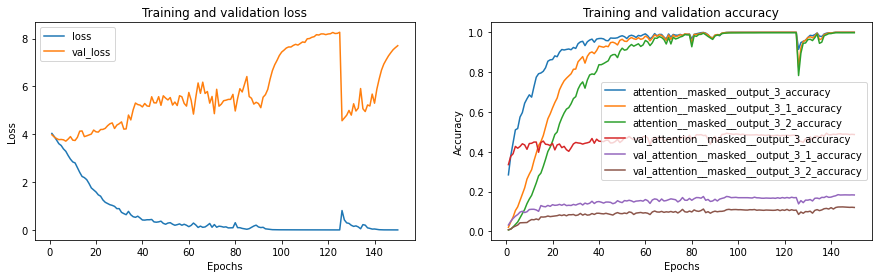

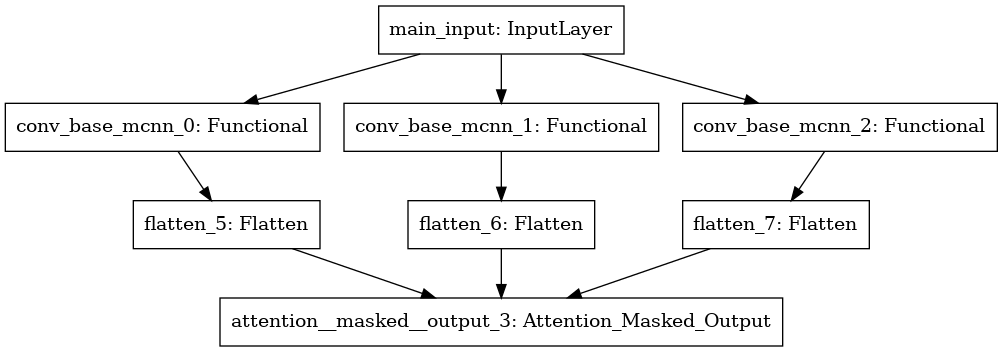

In [7]:
# Create the model
mcnn_attention_mnets_top_down_model = models.get_Masked_Output_Net(dataset.num_classes,
                                                                   dataset.image_size,
                                                                   dataset.taxonomy,
                                                                   architecture='top_down',
                                                                   conv_base=conv_base,
                                                                   learning_rate=learning_rate,
                                                                   mnets=True,
                                                                   attention=True)
mcnn_attention_mnets_top_down_model.summary(line_length=110)
#train model
history_mcnn_attention_mnets_top_down_model_model = mcnn_attention_mnets_top_down_model.fit(dataset.train_dataset,
                                                                        validation_data=dataset.val_dataset,
                                                                        epochs=epochs,
                                                                        callbacks=[performance_callback_val])
utils.learning_plots(history_mcnn_attention_mnets_top_down_model_model)
plot_model(mcnn_attention_mnets_top_down_model)


# This section is used for debugging

In [ ]:
# Create the model
i = 2
baseline_model = m.get_Classifier_model(num_classes[i],
                                        dataset.image_size,
                                        conv_base='vgg19',
                                        learning_rate=1e-5,
                                        lam=0.0001)
baseline_model.summary()
#train model
history_baseline_model = baseline_model.fit(dataset.X_train,
                                            dataset.y_train[i],
                                            validation_data=(dataset.X_val, dataset.y_val[i]),
                                            batch_size=batch,
                                            epochs=200,
                                            )
plot_model(baseline_model)


In [ ]:
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Activation, Lambda, Conv2D, MaxPool2D,
    GlobalAveragePooling2D, Multiply, Concatenate, experimental
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19, VGG16, ResNet50, Xception

i = 2
in_layer = Input(shape=dataset.image_size)
rescale = experimental.preprocessing.Rescaling(1. / 255)(in_layer)
conv_base = VGG19(include_top=False, weights="imagenet")(rescale)
conv_base = Flatten()(conv_base)
# create output layers
out_layer = Dense(num_classes[i], activation="softmax")(conv_base)
# Build the model
model = Model(inputs=in_layer,
              outputs=out_layer)
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.summary()

history_baseline_model = model.fit(dataset.X_val,
                                   dataset.y_val[i],
                                   validation_data=(dataset.X_val, dataset.y_val[i]),
                                   batch_size=batch,
                                   epochs=200,
                                   )
plot_model(baseline_model)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from tensorflow.keras import models, layers, optimizers
from tensorflow.python.keras.saving import hdf5_format
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py, itertools, collections
import itertools
from keras.applications.efficientnet import EfficientNetB0


In [ ]:
# Defining your model here:
i = 2
model = models.Sequential()
model.add(keras.Input(shape=dataset.image_size))
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(EfficientNetB0(weights='imagenet', include_top=False))
#Dense part
model.add(layers.Flatten())
model.add(layers.Dense(num_classes[i], activation='softmax'))
# Print a summary of the model
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

model.summary()

history_baseline_model = model.fit(dataset.X_train,
                                   dataset.y_train[i],
                                   validation_data=(dataset.X_val, dataset.y_val[i]),
                                   batch_size=batch,
                                   epochs=200,
                                   )
plot_model(baseline_model)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from tensorflow.keras import models, layers, optimizers
from tensorflow.python.keras.saving import hdf5_format
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py, itertools, collections
import itertools
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

##################
# Verifications:
#################
print('GPU is used.' if len(tf.config.list_physical_devices('GPU')) > 0 else 'GPU is NOT used.')
print("Tensorflow version: " + tf.__version__)

In [ ]:
'''
    Split train and validation.
'''
# We define the size of input images to 128x128 pixels.
image_size = (256, 256)
# We define the batch size
batch_size = 32

# Create an image generator with a fraction of images reserved for validation:
image_generator = ImageDataGenerator(
    validation_split=0.5)

# Now, we create a training data iterator by creating batchs of images of the same size as 
# defined previously, i.e., each image is resized in a 64x64 pixels format.
train_ds = DirectoryIterator(
    "dataset/",
    image_generator,
    class_mode='categorical',
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    subset='training',
)

# Similarly, we create a validation data iterator by creating batchs of images of the same size as 
# defined previously, i.e., each image is resized in a 64x64 pixels format.
val_ds = DirectoryIterator(
    "dataset/",
    image_generator,
    class_mode='categorical',
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation',
    shuffle=False
)

# We save the list of classes (labels).
class_names = list(train_ds.class_indices.keys())

# We also save the number of labels.
num_classes = train_ds.num_classes


In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=image_size + (3,),
                                            include_top=False,
                                            weights='imagenet')
# base_model.trainable = False


In [ ]:
# # Defining your model here:
model = models.Sequential()
# model.add(keras.Input(shape=image_size + (3,))) 
# model.add(layers.experimental.preprocessing.Rescaling(1./255))
# model.add(VGG19(input_shape=image_size + (3,), include_top=False, weights="imagenet"))

model.add(base_model)
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
# Print a summary of the model
model.summary()

base_learning_rate = 0.0001
model.compile(optimizers.Adam(learning_rate=base_learning_rate),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Start the trining by defining the number of epochs to train, the traing set and the validation set.
history = model.fit(train_ds, epochs=100,
                    validation_data=val_ds,
                    )


In [ ]:
performance_callback_val = models.performance_callback(dataset.X_val,
                                                       dataset.y_val,
                                                       dataset.get_tree(),
                                                       name='Validation set')

In [ ]:
mcnn_model_pred = mcnn_model.predict(dataset.X_test)


In [ ]:
mcnn_model_pred

In [ ]:
pred = []
pred.append(to_categorical(dataset.y_test[0], num_classes=2))
pred.append(to_categorical(dataset.y_test[1], num_classes=20))
pred.append(to_categorical(dataset.y_test[2], num_classes=100))


In [ ]:
metrics.performance_report(dataset.y_test, pred, dataset.get_tree())

# Debug

Model: "mcnn_top_down_attention_model"
______________________________________________________________________________________________________________
Layer (type)                                     Output Shape                                Param #          
main_input (InputLayer)                          [(None, 64, 64, 3)]                         0                
______________________________________________________________________________________________________________
vgg19 (Functional)                               (None, None, None, 512)                     20024384         
______________________________________________________________________________________________________________
flatten (Flatten)                                (None, 2048)                                0                
______________________________________________________________________________________________________________
attention__masked__output (Attention_Masked_Outp [(None, 13), (None, 113)

2021-10-09 19:18:12.745049: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-09 19:18:15.122692: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


64/64 [==============================] - 35s 448ms/step - loss: 4.2114 - attention__masked__output_loss: 2.2348 - attention__masked__output_1_loss: 4.8969 - attention__masked__output_2_loss: 5.5023 - attention__masked__output_accuracy: 0.2248 - attention__masked__output_1_accuracy: 0.0204 - attention__masked__output_2_accuracy: 0.0053 - val_loss: 4.1014 - val_attention__masked__output_loss: 2.1548 - val_attention__masked__output_1_loss: 4.7530 - val_attention__masked__output_2_loss: 5.3965 - val_attention__masked__output_accuracy: 0.2505 - val_attention__masked__output_1_accuracy: 0.0256 - val_attention__masked__output_2_accuracy: 0.0032
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

2021-10-09 19:20:46.770922: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/mcnn_top_down_attention_model_stanford_cars_vgg19/assets
Epoch 5/150
64/64 [==============================] - 26s 408ms/step - loss: 3.7048 - attention__masked__output_loss: 1.7259 - attention__masked__output_1_loss: 4.2549 - attention__masked__output_2_loss: 5.1335 - attention__masked__output_accuracy: 0.4074 - attention__masked__output_1_accuracy: 0.0729 - attention__masked__output_2_accuracy: 0.0187 - val_loss: 3.7397 - val_attention__masked__output_loss: 1.7755 - val_attention__masked__output_1_loss: 4.2795 - val_attention__masked__output_2_loss: 5.1639 - val_attention__masked__output_accuracy: 0.3861 - val_attention__masked__output_1_accuracy: 0.0659 - val_attention__masked__output_2_accuracy: 0.0159
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+----------------------

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0159 |       Consistency        | 0.0801 |            -             |   -    |
|       h-Precision        | 0.1836 |         h-Recall         | 0.2784 |        h-F1-Score        | 0.2190 |
|       Accuracy L_0       | 0.4495 |       Accuracy L_1       | 0.1197 |       Accuracy L_2       | 0.0552 |
|  HarmonicM Accuracy-k=1  | 0.1046 |  HarmonicM Accuracy-k=2  | 0.1679 |  HarmonicM Accuracy-k=5  | 0.2989 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_top_down_attention_model_stanford_cars_vgg19/assets
Epoch 18/150
64/64 [==============================] - 25s 398ms/step - loss: 2.3521 - attention__masked__output_loss: 0.9555 - attention__masked__output_1_loss: 2.6665 - attention__masked__output_2_loss: 3.4343 - attention__masked__output_accuracy: 0.6692 - attention__masked__output_1_accuracy: 0.3297 - attention__masked__output_2_accuracy: 0.2342 - val_loss: 3.4685 - val_attention__masked__output_loss: 1.7269 - val_attention__masked__output_1_loss: 3.8841 - val_attention__masked__output_2_loss: 4.7945 - val_attention__masked__output_accuracy: 0.4555 - val_attention__masked__output_1_accuracy: 0.1428 - val_attention__masked__output_2_accuracy: 0.0746
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+---------------------

64/64 [==============================] - 26s 413ms/step - loss: 1.7898 - attention__masked__output_loss: 0.7044 - attention__masked__output_1_loss: 2.0180 - attention__masked__output_2_loss: 2.6470 - attention__masked__output_accuracy: 0.7504 - attention__masked__output_1_accuracy: 0.4806 - attention__masked__output_2_accuracy: 0.3813 - val_loss: 3.7106 - val_attention__masked__output_loss: 1.9744 - val_attention__masked__output_1_loss: 4.0397 - val_attention__masked__output_2_loss: 5.1178 - val_attention__masked__output_accuracy: 0.4403 - val_attention__masked__output_1_accuracy: 0.1515 - val_attention__masked__output_2_accuracy: 0.0928
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 412ms/step - loss: 1.3291 - attention__masked__output_loss: 0.4727 - attention__masked__output_1_loss: 1.5128 - attention__masked__output_2_loss: 2.0018 - attention__masked__output_accuracy: 0.8396 - attention__masked__output_1_accuracy: 0.5963 - attention__masked__output_2_accuracy: 0.5171 - val_loss: 4.1513 - val_attention__masked__output_loss: 2.2276 - val_attention__masked__output_1_loss: 4.4752 - val_attention__masked__output_2_loss: 5.7510 - val_attention__masked__output_accuracy: 0.4221 - val_attention__masked__output_1_accuracy: 0.1540 - val_attention__masked__output_2_accuracy: 0.0851
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0376 |       Consistency        | 0.1378 |            -             |   -    |
|       h-Precision        | 0.2335 |         h-Recall         | 0.3315 |        h-F1-Score        | 0.2706 |
|       Accuracy L_0       | 0.4694 |       Accuracy L_1       | 0.1729 |       Accuracy L_2       | 0.0993 |
|  HarmonicM Accuracy-k=1  | 0.1668 |  HarmonicM Accuracy-k=2  | 0.2545 |  HarmonicM Accuracy-k=5  | 0.4042 |
| Arithmet

64/64 [==============================] - 26s 405ms/step - loss: 0.9984 - attention__masked__output_loss: 0.3560 - attention__masked__output_1_loss: 1.1278 - attention__masked__output_2_loss: 1.5115 - attention__masked__output_accuracy: 0.8797 - attention__masked__output_1_accuracy: 0.7030 - attention__masked__output_2_accuracy: 0.6338 - val_loss: 4.5283 - val_attention__masked__output_loss: 2.5395 - val_attention__masked__output_1_loss: 4.9665 - val_attention__masked__output_2_loss: 6.0789 - val_attention__masked__output_accuracy: 0.4520 - val_attention__masked__output_1_accuracy: 0.1507 - val_attention__masked__output_2_accuracy: 0.0886
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 410ms/step - loss: 1.0208 - attention__masked__output_loss: 0.4113 - attention__masked__output_1_loss: 1.1175 - attention__masked__output_2_loss: 1.5335 - attention__masked__output_accuracy: 0.8576 - attention__masked__output_1_accuracy: 0.7005 - attention__masked__output_2_accuracy: 0.6411 - val_loss: 4.4348 - val_attention__masked__output_loss: 2.5563 - val_attention__masked__output_1_loss: 4.8106 - val_attention__masked__output_2_loss: 5.9374 - val_attention__masked__output_accuracy: 0.4465 - val_attention__masked__output_1_accuracy: 0.1525 - val_attention__masked__output_2_accuracy: 0.0898
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0358 |       Consistency        | 0.1433 |            -             |   -    |
|       h-Precision        | 0.2306 |         h-Recall         | 0.3249 |        h-F1-Score        | 0.2665 |
|       Accuracy L_0       | 0.4744 |       Accuracy L_1       | 0.1572 |       Accuracy L_2       | 0.0973 |
|  HarmonicM Accuracy-k=1  | 0.1600 |  HarmonicM Accuracy-k=2  | 0.2499 |  HarmonicM Accuracy-k=5  | 0.4029 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_top_down_attention_model_stanford_cars_vgg19/assets
Epoch 55/150
64/64 [==============================] - 26s 405ms/step - loss: 0.6260 - attention__masked__output_loss: 0.2168 - attention__masked__output_1_loss: 0.6760 - attention__masked__output_2_loss: 0.9851 - attention__masked__output_accuracy: 0.9263 - attention__masked__output_1_accuracy: 0.8210 - attention__masked__output_2_accuracy: 0.7701 - val_loss: 4.8101 - val_attention__masked__output_loss: 2.7762 - val_attention__masked__output_1_loss: 5.2111 - val_attention__masked__output_2_loss: 6.4431 - val_attention__masked__output_accuracy: 0.4647 - val_attention__masked__output_1_accuracy: 0.1627 - val_attention__masked__output_2_accuracy: 0.0913
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+---------------------

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0398 |       Consistency        | 0.1517 |            -             |   -    |
|       h-Precision        | 0.2325 |         h-Recall         | 0.3281 |        h-F1-Score        | 0.2686 |
|       Accuracy L_0       | 0.4567 |       Accuracy L_1       | 0.1719 |       Accuracy L_2       | 0.0993 |
|  HarmonicM Accuracy-k=1  | 0.1659 |  HarmonicM Accuracy-k=2  | 0.2635 |  HarmonicM Accuracy-k=5  | 0.4107 |
| Arithmet

INFO:tensorflow:Assets written to: models/mcnn_top_down_attention_model_stanford_cars_vgg19/assets
Epoch 64/150
64/64 [==============================] - 26s 407ms/step - loss: 0.4450 - attention__masked__output_loss: 0.1859 - attention__masked__output_1_loss: 0.4666 - attention__masked__output_2_loss: 0.6826 - attention__masked__output_accuracy: 0.9332 - attention__masked__output_1_accuracy: 0.8836 - attention__masked__output_2_accuracy: 0.8503 - val_loss: 5.1843 - val_attention__masked__output_loss: 2.9735 - val_attention__masked__output_1_loss: 5.5140 - val_attention__masked__output_2_loss: 7.0656 - val_attention__masked__output_accuracy: 0.4682 - val_attention__masked__output_1_accuracy: 0.1734 - val_attention__masked__output_2_accuracy: 0.1035
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+---------------------

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0495 |       Consistency        | 0.1634 |            -             |   -    |
|       h-Precision        | 0.2422 |         h-Recall         | 0.3342 |        h-F1-Score        | 0.2772 |
|       Accuracy L_0       | 0.4766 |       Accuracy L_1       | 0.1786 |       Accuracy L_2       | 0.1065 |
|  HarmonicM Accuracy-k=1  | 0.1755 |  HarmonicM Accuracy-k=2  | 0.2709 |  HarmonicM Accuracy-k=5  | 0.4267 |
| Arithmet

64/64 [==============================] - 26s 406ms/step - loss: 0.2791 - attention__masked__output_loss: 0.1064 - attention__masked__output_1_loss: 0.2927 - attention__masked__output_2_loss: 0.4384 - attention__masked__output_accuracy: 0.9683 - attention__masked__output_1_accuracy: 0.9322 - attention__masked__output_2_accuracy: 0.9078 - val_loss: 5.5159 - val_attention__masked__output_loss: 3.2765 - val_attention__masked__output_1_loss: 5.9082 - val_attention__masked__output_2_loss: 7.3630 - val_attention__masked__output_accuracy: 0.4769 - val_attention__masked__output_1_accuracy: 0.1719 - val_attention__masked__output_2_accuracy: 0.1060
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 412ms/step - loss: 0.3824 - attention__masked__output_loss: 0.1325 - attention__masked__output_1_loss: 0.4050 - attention__masked__output_2_loss: 0.6099 - attention__masked__output_accuracy: 0.9559 - attention__masked__output_1_accuracy: 0.8965 - attention__masked__output_2_accuracy: 0.8719 - val_loss: 5.3060 - val_attention__masked__output_loss: 3.0984 - val_attention__masked__output_1_loss: 5.6975 - val_attention__masked__output_2_loss: 7.1220 - val_attention__masked__output_accuracy: 0.4706 - val_attention__masked__output_1_accuracy: 0.1706 - val_attention__masked__output_2_accuracy: 0.1055
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 405ms/step - loss: 0.2541 - attention__masked__output_loss: 0.0834 - attention__masked__output_1_loss: 0.2597 - attention__masked__output_2_loss: 0.4192 - attention__masked__output_accuracy: 0.9751 - attention__masked__output_1_accuracy: 0.9422 - attention__masked__output_2_accuracy: 0.9175 - val_loss: 5.6442 - val_attention__masked__output_loss: 3.3243 - val_attention__masked__output_1_loss: 6.0243 - val_attention__masked__output_2_loss: 7.5839 - val_attention__masked__output_accuracy: 0.4756 - val_attention__masked__output_1_accuracy: 0.1846 - val_attention__masked__output_2_accuracy: 0.1241
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0483 |       Consistency        | 0.1542 |            -             |   -    |
|       h-Precision        | 0.2427 |         h-Recall         | 0.3418 |        h-F1-Score        | 0.2800 |
|       Accuracy L_0       | 0.4612 |       Accuracy L_1       | 0.1706 |       Accuracy L_2       | 0.1167 |
|  HarmonicM Accuracy-k=1  | 0.1807 |  HarmonicM Accuracy-k=2  | 0.2737 |  HarmonicM Accuracy-k=5  | 0.4321 |
| Arithmet

64/64 [==============================] - 26s 407ms/step - loss: 0.1650 - attention__masked__output_loss: 0.0600 - attention__masked__output_1_loss: 0.2014 - attention__masked__output_2_loss: 0.2338 - attention__masked__output_accuracy: 0.9849 - attention__masked__output_1_accuracy: 0.9584 - attention__masked__output_2_accuracy: 0.9530 - val_loss: 6.2567 - val_attention__masked__output_loss: 3.7305 - val_attention__masked__output_1_loss: 6.7239 - val_attention__masked__output_2_loss: 8.3157 - val_attention__masked__output_accuracy: 0.4744 - val_attention__masked__output_1_accuracy: 0.1714 - val_attention__masked__output_2_accuracy: 0.1119
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 405ms/step - loss: 0.1893 - attention__masked__output_loss: 0.0651 - attention__masked__output_1_loss: 0.1884 - attention__masked__output_2_loss: 0.3143 - attention__masked__output_accuracy: 0.9804 - attention__masked__output_1_accuracy: 0.9569 - attention__masked__output_2_accuracy: 0.9463 - val_loss: 5.9243 - val_attention__masked__output_loss: 3.5703 - val_attention__masked__output_1_loss: 6.3436 - val_attention__masked__output_2_loss: 7.8590 - val_attention__masked__output_accuracy: 0.4624 - val_attention__masked__output_1_accuracy: 0.1706 - val_attention__masked__output_2_accuracy: 0.1149
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 405ms/step - loss: 0.1287 - attention__masked__output_loss: 0.0493 - attention__masked__output_1_loss: 0.1334 - attention__masked__output_2_loss: 0.2035 - attention__masked__output_accuracy: 0.9865 - attention__masked__output_1_accuracy: 0.9724 - attention__masked__output_2_accuracy: 0.9672 - val_loss: 6.3550 - val_attention__masked__output_loss: 3.8547 - val_attention__masked__output_1_loss: 6.8290 - val_attention__masked__output_2_loss: 8.3812 - val_attention__masked__output_accuracy: 0.4565 - val_attention__masked__output_1_accuracy: 0.1704 - val_attention__masked__output_2_accuracy: 0.1097
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 407ms/step - loss: 0.1710 - attention__masked__output_loss: 0.0637 - attention__masked__output_1_loss: 0.1641 - attention__masked__output_2_loss: 0.2852 - attention__masked__output_accuracy: 0.9810 - attention__masked__output_1_accuracy: 0.9637 - attention__masked__output_2_accuracy: 0.9492 - val_loss: 6.1502 - val_attention__masked__output_loss: 3.7374 - val_attention__masked__output_1_loss: 6.5864 - val_attention__masked__output_2_loss: 8.1268 - val_attention__masked__output_accuracy: 0.4813 - val_attention__masked__output_1_accuracy: 0.1741 - val_attention__masked__output_2_accuracy: 0.1114
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 406ms/step - loss: 0.1202 - attention__masked__output_loss: 0.0448 - attention__masked__output_1_loss: 0.1263 - attention__masked__output_2_loss: 0.1896 - attention__masked__output_accuracy: 0.9881 - attention__masked__output_1_accuracy: 0.9746 - attention__masked__output_2_accuracy: 0.9672 - val_loss: 6.3836 - val_attention__masked__output_loss: 3.8863 - val_attention__masked__output_1_loss: 6.8735 - val_attention__masked__output_2_loss: 8.3910 - val_attention__masked__output_accuracy: 0.4749 - val_attention__masked__output_1_accuracy: 0.1799 - val_attention__masked__output_2_accuracy: 0.1077
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 408ms/step - loss: 0.1148 - attention__masked__output_loss: 0.0347 - attention__masked__output_1_loss: 0.1215 - attention__masked__output_2_loss: 0.1882 - attention__masked__output_accuracy: 0.9917 - attention__masked__output_1_accuracy: 0.9762 - attention__masked__output_2_accuracy: 0.9691 - val_loss: 6.2320 - val_attention__masked__output_loss: 3.7375 - val_attention__masked__output_1_loss: 6.7012 - val_attention__masked__output_2_loss: 8.2573 - val_attention__masked__output_accuracy: 0.4851 - val_attention__masked__output_1_accuracy: 0.1754 - val_attention__masked__output_2_accuracy: 0.1199
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 409ms/step - loss: 0.1728 - attention__masked__output_loss: 0.0714 - attention__masked__output_1_loss: 0.2176 - attention__masked__output_2_loss: 0.2294 - attention__masked__output_accuracy: 0.9762 - attention__masked__output_1_accuracy: 0.9490 - attention__masked__output_2_accuracy: 0.9530 - val_loss: 6.1132 - val_attention__masked__output_loss: 3.6275 - val_attention__masked__output_1_loss: 6.7676 - val_attention__masked__output_2_loss: 7.9443 - val_attention__masked__output_accuracy: 0.4801 - val_attention__masked__output_1_accuracy: 0.1639 - val_attention__masked__output_2_accuracy: 0.1065
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

INFO:tensorflow:Assets written to: models/mcnn_top_down_attention_model_stanford_cars_vgg19/assets
Epoch 127/150
64/64 [==============================] - 26s 406ms/step - loss: 0.0719 - attention__masked__output_loss: 0.0248 - attention__masked__output_1_loss: 0.0948 - attention__masked__output_2_loss: 0.0960 - attention__masked__output_accuracy: 0.9944 - attention__masked__output_1_accuracy: 0.9837 - attention__masked__output_2_accuracy: 0.9835 - val_loss: 6.6971 - val_attention__masked__output_loss: 4.1676 - val_attention__masked__output_1_loss: 7.1777 - val_attention__masked__output_2_loss: 8.7461 - val_attention__masked__output_accuracy: 0.4786 - val_attention__masked__output_1_accuracy: 0.1746 - val_attention__masked__output_2_accuracy: 0.1104
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0535 |       Consistency        | 0.1811 |            -             |   -    |
|       h-Precision        | 0.2526 |         h-Recall         | 0.3469 |        h-F1-Score        | 0.2885 |
|       Accuracy L_0       | 0.4789 |       Accuracy L_1       | 0.1866 |       Accuracy L_2       | 0.1249 |
|  HarmonicM Accuracy-k=1  | 0.1941 |  HarmonicM Accuracy-k=2  | 0.2903 |  HarmonicM Accuracy-k=5  | 0.4408 |
| Arithmet

64/64 [==============================] - 26s 402ms/step - loss: 0.1164 - attention__masked__output_loss: 0.0390 - attention__masked__output_1_loss: 0.1038 - attention__masked__output_2_loss: 0.2063 - attention__masked__output_accuracy: 0.9888 - attention__masked__output_1_accuracy: 0.9790 - attention__masked__output_2_accuracy: 0.9667 - val_loss: 6.4257 - val_attention__masked__output_loss: 4.0925 - val_attention__masked__output_1_loss: 6.8398 - val_attention__masked__output_2_loss: 8.3448 - val_attention__masked__output_accuracy: 0.4789 - val_attention__masked__output_1_accuracy: 0.1836 - val_attention__masked__output_2_accuracy: 0.1172
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

64/64 [==============================] - 26s 405ms/step - loss: 0.1249 - attention__masked__output_loss: 0.0493 - attention__masked__output_1_loss: 0.1485 - attention__masked__output_2_loss: 0.1770 - attention__masked__output_accuracy: 0.9850 - attention__masked__output_1_accuracy: 0.9702 - attention__masked__output_2_accuracy: 0.9708 - val_loss: 6.1935 - val_attention__masked__output_loss: 3.8490 - val_attention__masked__output_1_loss: 6.6926 - val_attention__masked__output_2_loss: 8.0389 - val_attention__masked__output_accuracy: 0.4672 - val_attention__masked__output_1_accuracy: 0.1955 - val_attention__masked__output_2_accuracy: 0.1211
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1          | Value1 |         Metric2          | Value2 |         Metric3          | Value3 |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|       Exact Match        | 0.0555 |       Consistency        | 0.1786 |            -             |   -    |
|       h-Precision        | 0.2511 |         h-Recall         | 0.3438 |        h-F1-Score        | 0.2864 |
|       Accuracy L_0       | 0.4823 |       Accuracy L_1       | 0.1821 |       Accuracy L_2       | 0.1224 |
|  HarmonicM Accuracy-k=1  | 0.1906 |  HarmonicM Accuracy-k=2  | 0.2832 |  HarmonicM Accuracy-k=5  | 0.4374 |
| Arithmet

64/64 [==============================] - 26s 410ms/step - loss: 0.0477 - attention__masked__output_loss: 0.0195 - attention__masked__output_1_loss: 0.0536 - attention__masked__output_2_loss: 0.0701 - attention__masked__output_accuracy: 0.9953 - attention__masked__output_1_accuracy: 0.9919 - attention__masked__output_2_accuracy: 0.9883 - val_loss: 6.4305 - val_attention__masked__output_loss: 3.9952 - val_attention__masked__output_1_loss: 6.9288 - val_attention__masked__output_2_loss: 8.3674 - val_attention__masked__output_accuracy: 0.4963 - val_attention__masked__output_1_accuracy: 0.1910 - val_attention__masked__output_2_accuracy: 0.1266
+-----------------------------------------------------------------------------------------------------------+
|                                               Validation set                                              |
+--------------------------+--------+--------------------------+--------+--------------------------+--------+
|         Metric1       

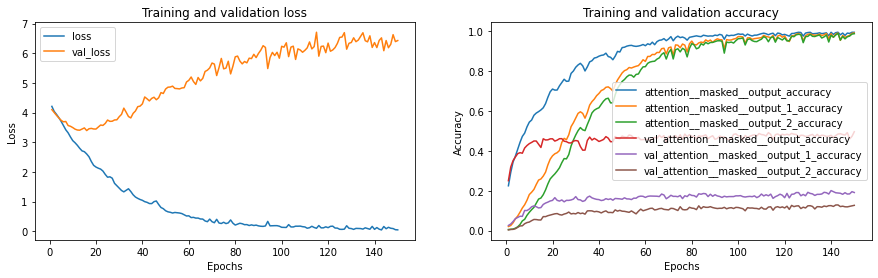

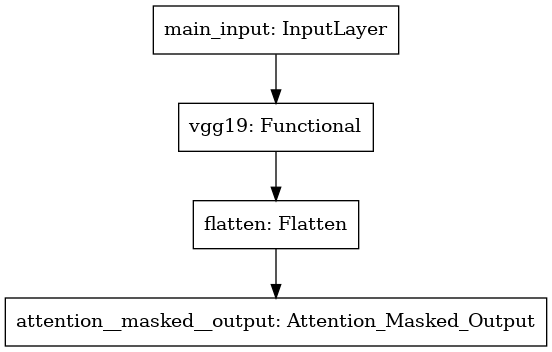

In [5]:
# Create the model
model = models.get_Masked_Output_Net(dataset.num_classes,
                                     dataset.image_size,
                                     dataset.taxonomy,
                                     architecture='top_down',
                                     conv_base=conv_base,
                                     learning_rate=learning_rate,
                                     mnets=False,
                                     attention=True)
model.summary(line_length=110)
#train model
history_model = model.fit(dataset.train_dataset,
                          validation_data=dataset.val_dataset,
                          epochs=epochs,
                          callbacks=[performance_callback_val])
utils.learning_plots(history_model)
plot_model(model)


In [132]:
import tensorflow as tf
from deakin.edu.au import models
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext tensorboard



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [193]:
input_shape_x = (1, 4)
input_shape_y = (3, 4)
x_tf = tf.random.normal(input_shape_x)
y = tf.random.normal(input_shape_y)
taxo = [[[1, 1, 0, 0, 0], [0, 0, 1, 1, 1]],
        [[1, 1, 0, 0, 0, 0, 0, 0, 0], 
         [0, 0, 1, 0, 0, 0, 0, 0, 0], 
         [0, 0, 0, 1, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0], 
         [0, 0, 0, 0, 0, 0, 0, 0, 1]]]


In [214]:
layer = models.Attention_Masked_Output(taxo, 4, 4, 4)
layer.build(input_shape)


In [218]:
out = layer(x_tf)

In [222]:
out[2]

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.11113906, 0.11108951, 0.11107881, 0.11119019, 0.11115794,
        0.11102777, 0.11110485, 0.1111203 , 0.11109158]], dtype=float32)>

In [176]:
x = x_tf.numpy()
W_q = layer.W_q.numpy()
W_k = layer.W_k.numpy()
W_v = layer.W_v.numpy()
W_q = layer.W_q.numpy()

Q = Q.numpy()
K = K.numpy()
V = V.numpy()


In [177]:
softmax(np.matmul(Q[0][0], np.transpose(K[0])) / np.sqrt(4))


array([0.33333325, 0.33333337, 0.33333337], dtype=float32)

In [178]:
R

<tf.Tensor: shape=(2, 3, 3), dtype=float32, numpy=
array([[[2.8243049e-08, 3.3161965e-07, 2.3204998e-07],
        [3.3161965e-07, 1.5259440e-05, 2.0157004e-05],
        [2.3204998e-07, 2.0157004e-05, 2.8709268e-05]],

       [[2.7148621e-05, 3.7386846e-05, 2.7781847e-05],
        [3.7386846e-05, 2.1940739e-04, 2.1368360e-04],
        [2.7781847e-05, 2.1368360e-04, 2.6052480e-04]]], dtype=float32)>

In [183]:
z = tf.nn.softmax(R, axis = -1).numpy()


In [184]:
z

array([[[0.33333328, 0.33333337, 0.33333334],
        [0.3333295 , 0.33333445, 0.33333609],
        [0.33332798, 0.3333346 , 0.33333746]],

       [[0.33333212, 0.33333552, 0.33333236],
        [0.33329353, 0.33335418, 0.33335227],
        [0.33328682, 0.33334878, 0.3333644 ]]], dtype=float32)

In [169]:
np.sum(z[0][2])

0.99999994

In [170]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

In [182]:
np.sum([0.3333295 , 0.33333445, 0.33333609])

1.00000004